# DATA PREPARATION

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder
from scipy.stats import skew
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
import scipy.stats as stats
import joblib
import warnings
warnings.filterwarnings("ignore")

## Data Exploration

In [ ]:
# Load the dataset
data = pd.read_csv("data/HeartAssign2.csv")

# Preview first 5 rows of data frame
data.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  52.0001    1   0       125  212.0  0.0      1.0    168.0      0      1.0   
1  53.0002    1   0       140  203.0  1.0      0.0    155.0      1      3.1   
2  70.0003    1   0       145  174.0  0.0      1.0    125.0      1      2.6   
3  61.0004    1   0       148  203.0  0.0      1.0    161.0      0      0.0   
4  62.0005    0   0       138  294.0  1.0      1.0    106.0      0      1.9   

   slope  ca  thal  target  
0      2   2     3     0.0  
1      0   0     3     0.0  
2      0   0     3     0.0  
3      2   1     3     0.0  
4      1   3     2     0.0

In [ ]:
data.shape

(1027, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1027 non-null   int64  
 2   cp        1027 non-null   int64  
 3   trestbps  1027 non-null   int64  
 4   chol      1026 non-null   float64
 5   fbs       1026 non-null   float64
 6   restecg   1026 non-null   float64
 7   thalach   1026 non-null   float64
 8   exang     1027 non-null   int64  
 9   oldpeak   1026 non-null   float64
 10  slope     1027 non-null   int64  
 11  ca        1027 non-null   int64  
 12  thal      1027 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(7), int64(7)
memory usage: 112.5 KB


In [ ]:
# Display the summary of data frame
data.describe().T

count        mean        std    min    25%       50%       75%  \
age       1025.0   54.468657   9.075495   29.0   48.0   56.0171   61.0521   
sex       1027.0    0.692308   0.461763    0.0    0.0    1.0000    1.0000   
cp        1027.0    0.942551   1.031478    0.0    0.0    1.0000    2.0000   
trestbps  1027.0  132.247322  27.240879   94.0  120.0  130.0000  140.0000   
chol      1026.0  245.877193  51.514152  126.0  211.0  240.0000  275.0000   
fbs       1026.0    0.149123   0.356383    0.0    0.0    0.0000    0.0000   
restecg   1026.0    0.531189   0.527767    0.0    0.0    1.0000    1.0000   
thalach   1026.0  149.798246  29.624565   71.0  132.0  152.0000  166.0000   
exang     1027.0    0.336904   0.472882    0.0    0.0    0.0000    1.0000   
oldpeak   1026.0    1.107797   1.781657    0.0    0.0    0.8000    1.8000   
slope     1027.0    1.388510   0.619678    0.0    1.0    1.0000    2.0000   
ca        1027.0    0.749757   1.026305    0.0    0.0    0.0000    1.0000   
thal      1027.0    2.319377   0.619095    0.0    2.0    2.0000    3.0000   
target    1025.0    0.513171   0.500070    0.0    0.0    1.0000    1.0000   

               max  
age        77.0385  
sex         1.0000  
cp          3.0000  
trestbps  800.0000  
chol      564.0000  
fbs         1.0000  
restecg     2.0000  
thalach   746.0000  
exang       1.0000  
oldpeak    44.0000  
slope       2.0000  
ca          4.0000  
thal        3.0000  
target      1.0000

In [ ]:
# Display columns of data frame
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# Check number of missing values per column in percetage (%)
round(data.isnull().sum() / data.shape[0] * 100, 2)

age         0.19
sex         0.00
cp          0.00
trestbps    0.00
chol        0.10
fbs         0.10
restecg     0.10
thalach     0.10
exang       0.00
oldpeak     0.10
slope       0.00
ca          0.00
thal        0.00
target      0.19
dtype: float64

In [ ]:
# Checking duplicate values for each field
data.duplicated().sum()

np.int64(10)

In [ ]:
data.dtypes

age         float64
sex           int64
cp            int64
trestbps      int64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target      float64
dtype: object

In [ ]:
# Define categorical columns and numerical columns
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
num_cols = [col for col in data.columns if col not in cat_cols]

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [ ]:
print("Unique values of categorical columns")
print("------------------------------------")
for col in cat_cols:
    print(f"{col}: {sorted(data[col].unique().tolist())}")

Unique values of categorical columns
------------------------------------
sex: [0, 1]
cp: [0, 1, 2, 3]
fbs: [0.0, 1.0, nan]
restecg: [0.0, 1.0, 2.0, nan]
exang: [0, 1]
slope: [0, 1, 2]
ca: [0, 1, 2, 3, 4]
thal: [0, 1, 2, 3]
target: [0.0, 1.0, nan]


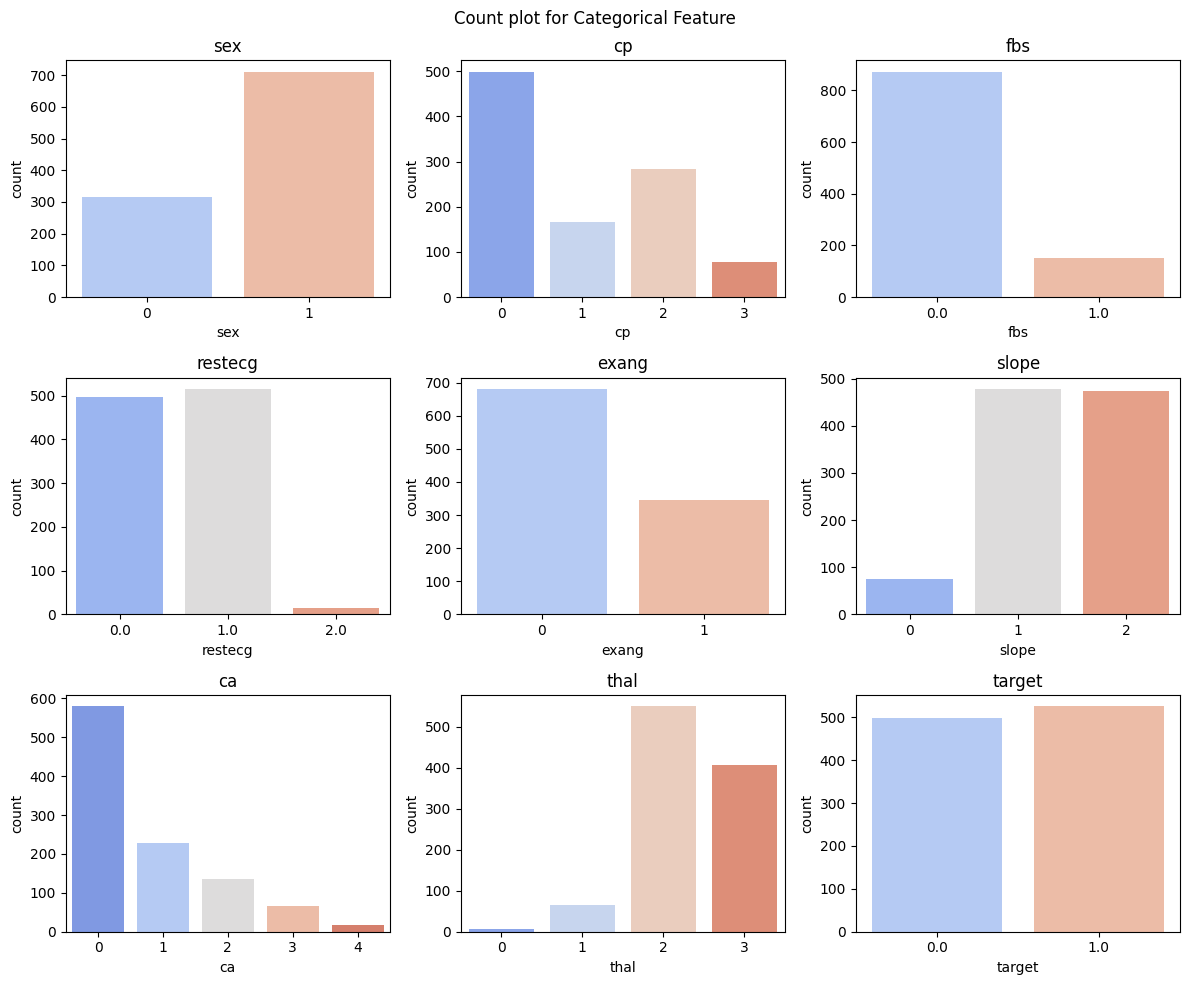

In [ ]:
# Proportion for categorical feature
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle("Count plot for Categorical Feature")
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=data[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"{col}")

plt.tight_layout()
plt.show()

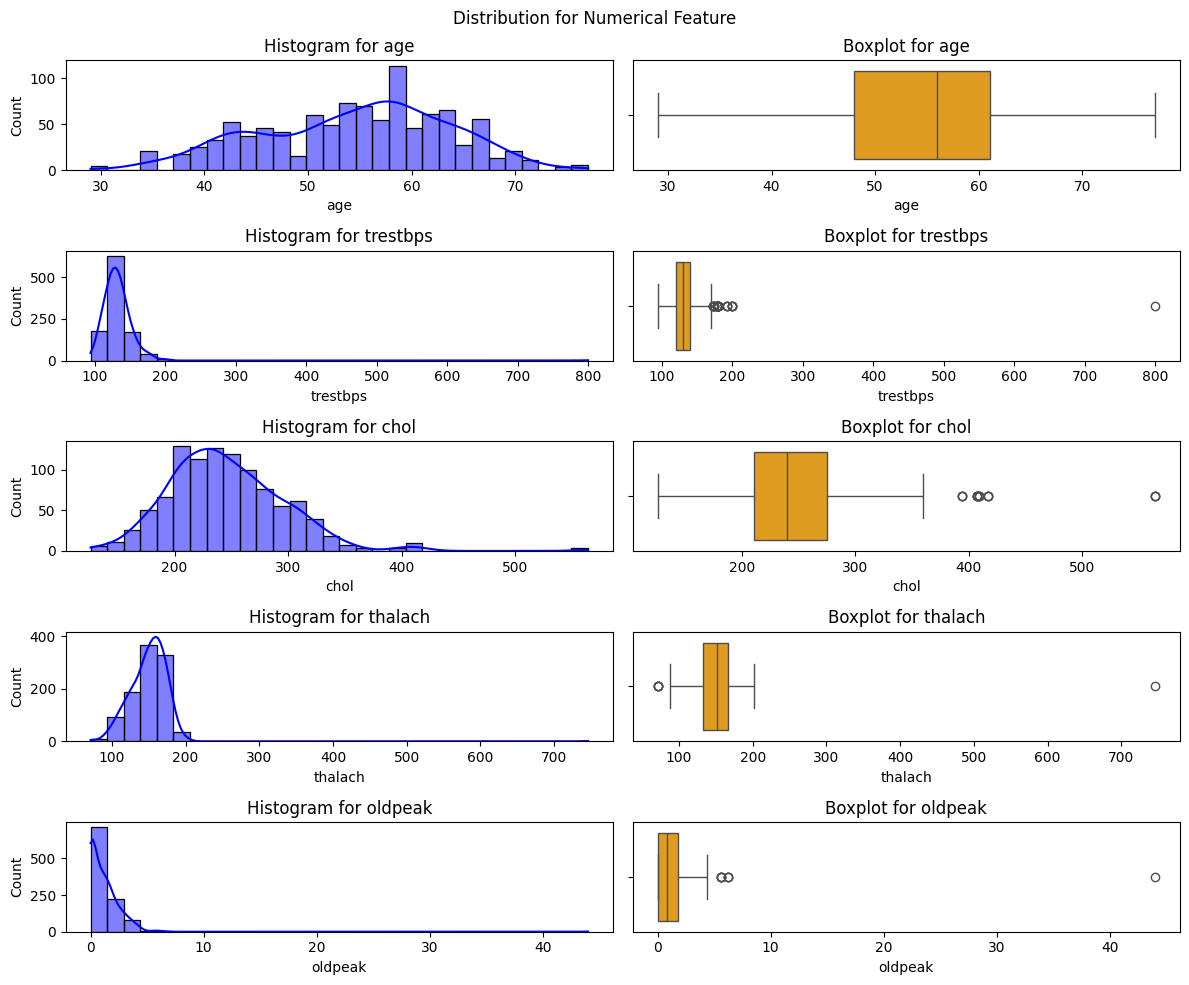

In [ ]:
# Visualize for numerical feature
fig, axes = plt.subplots(5, 2, figsize=(12, 10))
fig.suptitle("Distribution for Numerical Feature")

for i, col in enumerate(num_cols):
    # First column: Histogram
    sns.histplot(data[col], ax=axes[i, 0], bins= 30, kde=True, color="blue")
    axes[i, 0].set_title(f"Histogram for {col}")

    # Second column: Boxplot
    sns.boxplot(x=data[col], ax=axes[i, 1], color="orange")
    axes[i, 1].set_title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()

## Data Splitting

In [ ]:
# Separate features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Perform train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the test set into 15% validate 15% test
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Display the shapes of the split datasets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (718, 13) (718,)
Validation set: (155, 13) (155,)
Test set: (154, 13) (154,)


In [ ]:
# Combine X and y for data preprocessing
train_df = X_train.copy()
train_df['target'] = y_train

test_df = X_test.copy()
test_df['target'] = y_test

val_df = X_val.copy()
val_df['target'] = y_val

#### ====== Training Set ======

In [ ]:
train_df.duplicated().sum()

np.int64(4)

In [ ]:
train_df.isnull().sum()

age         2
sex         0
cp          0
trestbps    0
chol        1
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     1
slope       0
ca          0
thal        0
target      0
dtype: int64

#### ====== Validation Set ======

In [ ]:
val_df.duplicated().sum()

np.int64(0)

In [ ]:
val_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### ====== Testing Set ======

In [ ]:
test_df.duplicated().sum()

np.int64(0)

In [ ]:
test_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         1
restecg     1
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      2
dtype: int64

## Data Preprocessing

#### Remove Duplicate Values
- on the previous stage, we only found that __training set__ have duplicated values

In [ ]:
# shape before removing duplicates
print("Shape before: ", train_df.shape)

train_df.drop_duplicates(inplace=True)
print("Shape after: ", train_df.shape) # shape before removing duplicates

Shape before:  (718, 14)
Shape after:  (714, 14)


#### Remove row where target variable contain NaN
- target variable is what we trying to predict, there no point for us to impute the missing values of it
- avoid biases and inconsistent values
- from the previous step we found there __exists some NaN in the target column__

In [ ]:
test_df[test_df['target'].isnull()]

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
548  41.0000    0   2       112  268.0  NaN      NaN    172.0      1      0.0   
990  48.0991    1   0       122  222.0  0.0      0.0    186.0      0      0.0   

     slope  ca  thal  target  
548      2   0     2     NaN  
990      2   0     2     NaN

In [ ]:
#remove the null values of Target Variable
test_df = test_df.dropna(subset=['target'])

#### Replace Faulty Data with NaN
Since we observed some faulty data from the description, we will replaced it by NaN values and perform imputation.\
What is faulty data?\
-> not an outliers\
-> values that are impossible or logically incorrect

In [ ]:
# Function use to replace faulty data with null values
def replace_faulty_data(df):
    df.loc[~df['ca'].isin([0, 1, 2, 3]), 'ca'] = np.nan  # 'ca' should be 0, 1, 2 or 3
    df.loc[(df['thalach'] <= 0) | (df['thalach'] > 220), 'thalach'] = np.nan  # 'thalach' range (1, 220]
    df.loc[(df['oldpeak'] < 0) | (df['oldpeak'] > 6.2), 'oldpeak'] = np.nan  # 'oldpeak' range [0, 6.2]
    df.loc[(df['trestbps'] < 94) | (df['trestbps'] > 200), 'trestbps'] = np.nan  # 'trestbps' range [94, 200]
    df.loc[~df['thal'].isin([1, 2, 3]), 'thal'] = np.nan # 'thal' should be 1,2 or 3 only

    return df

#### ====== Training Set ======

In [ ]:
# Replace faulty data with null values
train_df = replace_faulty_data(train_df)

# Check how many null values now we have
train_df.isnull().sum()

age          2
sex          0
cp           0
trestbps     1
chol         1
fbs          0
restecg      0
thalach      2
exang        0
oldpeak      2
slope        0
ca          12
thal         6
target       0
dtype: int64

#### ====== Validation Set ======

In [ ]:
val_df = replace_faulty_data(val_df)
val_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        1
target      0
dtype: int64

In [ ]:
val_df.dropna(inplace=True)
val_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### ====== Testing Set ======

In [ ]:
test_df = replace_faulty_data(test_df)
test_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        0
target      0
dtype: int64

In [ ]:
test_df.dropna(inplace=True)
test_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Imputation of Missing Values
- overhere we impute missing values using random forest model

In [ ]:
# Imputation using Random Forest

def impute_numerical_with_rf(df, target_column):
    df_train = df[df[target_column].notnull()]  # Rows with valid data (training)
    df_test = df[df[target_column].isnull()]  # Rows with missing values (prediction)

    # Separate features and target
    X_train = df_train.drop(columns=[target_column])
    y_train = df_train[target_column]

    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict missing values
    X_test = df_test.drop(columns=[target_column])
    y_pred = model.predict(X_test)

    # Impute missing values
    df.loc[df[target_column].isnull(), target_column] = y_pred
    return df

# Function to impute categorical missing values using Random Forest
def impute_cat_with_rf(df, target_column):
    # Separate rows with and without missing values
    df_train = df[df[target_column].notnull()]
    df_test = df[df[target_column].isnull()]

    # Separate features and target
    X_train = df_train.drop(columns=[target_column])
    y_train = df_train[target_column]

    # Train Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict missing values
    X_test = df_test.drop(columns=[target_column])
    y_pred = model.predict(X_test)

    # Impute missing values
    df.loc[df[target_column].isnull(), target_column] = y_pred
    return df

#### ====== Training Set ======

In [ ]:
print("Single Rows containing one null value: ")
train_df[train_df.isnull().sum(axis=1) == 1]

Single Rows containing one null value: 


age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
534  62.0535    1   2     130.0  231.0  0.0      1.0      NaN      0      1.8   
346  43.0347    1   0     132.0  247.0  1.0      0.0    143.0      1      0.1   
685  52.0686    1   0     128.0  204.0  1.0      1.0    156.0      1      1.0   
830  58.0831    1   1     125.0  220.0  0.0      1.0    144.0      0      0.4   
338  38.1139    1   2     138.0  175.0  0.0      1.0    173.0      0      0.0   
395      NaN    1   0     110.0  197.0  0.0      0.0    177.0      0      0.0   
894  52.0895    1   0     128.0  204.0  1.0      1.0    156.0      1      1.0   
426  43.0427    1   0     132.0  247.0  1.0      0.0    143.0      1      0.1   
356  53.0357    0   2     128.0  216.0  0.0      0.0    115.0      0      0.0   
287  52.0288    1   2     138.0  223.0  0.0      1.0    169.0      0      0.0   
127  52.0128    1   2     138.0  223.0  0.0      1.0    169.0      0      0.0   
415  52.0416    1   2     138.0  223.0  0.0      1.0    169.0      0      0.0   
317  53.0318    0   2     128.0  216.0  0.0      0.0    115.0      0      0.0   
733  52.0734    1   0     128.0  204.0  1.0      1.0    156.0      1      1.0   
240  38.0941    1   2     138.0  175.0  0.0      1.0    173.0      0      0.0   
742  58.0743    1   1     125.0  220.0  0.0      1.0    144.0      0      0.4   
206  38.0807    1   2     138.0  175.0  0.0      1.0    173.0      0      0.0   
14   52.0015    1   0     128.0  204.0  1.0      1.0    156.0      1      1.0   
52   38.0453    1   2     138.0  175.0  0.0      1.0    173.0      0      0.0   
295  43.0296    0   2     122.0    NaN  0.0      1.0    165.0      0      0.2   
747  58.0748    1   1     125.0  220.0  0.0      1.0    144.0      0      0.4   

     slope   ca  thal  target  
534      1  3.0   3.0     1.0  
346      1  NaN   3.0     0.0  
685      1  0.0   NaN     0.0  
830      1  NaN   3.0     1.0  
338      2  NaN   2.0     1.0  
395      2  1.0   2.0     0.0  
894      1  0.0   NaN     0.0  
426      1  NaN   3.0     0.0  
356      2  0.0   NaN     1.0  
287      2  NaN   2.0     1.0  
127      2  NaN   2.0     1.0  
415      2  NaN   2.0     1.0  
317      2  0.0   NaN     1.0  
733      1  0.0   NaN     0.0  
240      2  NaN   2.0     1.0  
742      1  NaN   3.0     1.0  
206      2  NaN   2.0     1.0  
14       1  0.0   NaN     0.0  
52       2  NaN   2.0     1.0  
295      1  0.0   2.0     1.0  
747      1  NaN   3.0     1.0

In [ ]:
print("Single Rows containing two null values and above:")
train_df[train_df.isnull().sum(axis=1) >= 2]

Single Rows containing two null values and above:


age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
846      NaN    1   0     150.0  247.0  0.0      1.0      NaN      0      NaN   
767  56.0768    0   0       NaN  288.0  1.0      0.0    133.0      1      NaN   

     slope   ca  thal  target  
846      2  0.0   2.0     1.0  
767      0  2.0   3.0     0.0

In [ ]:
# Function to impute missing values
def impute_missing_values(df, num_cols, cat_cols):

    # Create a mask for NaN values before imputation
    nan_mask_before = df.isnull()

    for col in df.columns:
        if col in num_cols and df[col].isnull().sum() > 0:
            print(f"Imputing numerical column: {col}")
            df = impute_numerical_with_rf(df, col)

        elif col in cat_cols and df[col].isnull().sum() > 0:
            print(f"Imputing categorical column: {col}")
            df = impute_cat_with_rf(df, col)

    # Create a mask for NaN values after imputation
    nan_mask_after = df.isnull()
    imputed_rows = (nan_mask_before & ~nan_mask_after).any(axis=1)

    return df, df[imputed_rows]  # Returns the full DataFrame and imputed rows

# Usage
imputed_train_df, imputed_train_rows = impute_missing_values(train_df.copy(), num_cols, cat_cols)

Imputing numerical column: age
Imputing numerical column: trestbps
Imputing numerical column: chol
Imputing numerical column: thalach
Imputing numerical column: oldpeak
Imputing categorical column: ca
Imputing categorical column: thal


In [ ]:
imputed_train_rows

age  sex  cp  trestbps    chol  fbs  restecg  thalach  exang  \
534  62.053500    1   2    130.00  231.00  0.0      1.0   141.73      0   
346  43.034700    1   0    132.00  247.00  1.0      0.0   143.00      1   
846  61.210302    1   0    150.00  247.00  0.0      1.0   156.23      0   
685  52.068600    1   0    128.00  204.00  1.0      1.0   156.00      1   
830  58.083100    1   1    125.00  220.00  0.0      1.0   144.00      0   
338  38.113900    1   2    138.00  175.00  0.0      1.0   173.00      0   
395  46.180650    1   0    110.00  197.00  0.0      0.0   177.00      0   
894  52.089500    1   0    128.00  204.00  1.0      1.0   156.00      1   
426  43.042700    1   0    132.00  247.00  1.0      0.0   143.00      1   
356  53.035700    0   2    128.00  216.00  0.0      0.0   115.00      0   
287  52.028800    1   2    138.00  223.00  0.0      1.0   169.00      0   
127  52.012800    1   2    138.00  223.00  0.0      1.0   169.00      0   
767  56.076800    0   0    165.27  288.00  1.0      0.0   133.00      1   
415  52.041600    1   2    138.00  223.00  0.0      1.0   169.00      0   
317  53.031800    0   2    128.00  216.00  0.0      0.0   115.00      0   
733  52.073400    1   0    128.00  204.00  1.0      1.0   156.00      1   
240  38.094100    1   2    138.00  175.00  0.0      1.0   173.00      0   
742  58.074300    1   1    125.00  220.00  0.0      1.0   144.00      0   
206  38.080700    1   2    138.00  175.00  0.0      1.0   173.00      0   
14   52.001500    1   0    128.00  204.00  1.0      1.0   156.00      1   
52   38.045300    1   2    138.00  175.00  0.0      1.0   173.00      0   
295  43.029600    0   2    122.00  222.47  0.0      1.0   165.00      0   
747  58.074800    1   1    125.00  220.00  0.0      1.0   144.00      0   

     oldpeak  slope   ca  thal  target  
534    1.800      1  3.0   3.0     1.0  
346    0.100      1  0.0   3.0     0.0  
846    1.025      2  0.0   2.0     1.0  
685    1.000      1  0.0   3.0     0.0  
830    0.400      1  0.0   3.0     1.0  
338    0.000      2  0.0   2.0     1.0  
395    0.000      2  1.0   2.0     0.0  
894    1.000      1  0.0   3.0     0.0  
426    0.100      1  0.0   3.0     0.0  
356    0.000      2  0.0   2.0     1.0  
287    0.000      2  0.0   2.0     1.0  
127    0.000      2  0.0   2.0     1.0  
767    3.752      0  2.0   3.0     0.0  
415    0.000      2  0.0   2.0     1.0  
317    0.000      2  0.0   2.0     1.0  
733    1.000      1  0.0   3.0     0.0  
240    0.000      2  0.0   2.0     1.0  
742    0.400      1  0.0   3.0     1.0  
206    0.000      2  0.0   2.0     1.0  
14     1.000      1  0.0   3.0     0.0  
52     0.000      2  0.0   2.0     1.0  
295    0.200      1  0.0   2.0     1.0  
747    0.400      1  0.0   3.0     1.0

In [ ]:
imputed_train_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Data Type Conversion
- after the data are cleanned we can perfrom data type conversion

In [ ]:
# Convert categorical variable in float format to categorical format
def convert_to_categorical(df, cat_cols):
    for col in cat_cols:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('int64')  # Convert to integer first to remove decimals
        df[col] = df[col].astype('category')  # Convert to categorical
    return df

In [ ]:
imputed_train_df = convert_to_categorical(imputed_train_df, cat_cols)
imputed_train_df.dtypes

age          float64
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

In [ ]:
clean_val_df = convert_to_categorical(val_df, cat_cols)
clean_test_df = convert_to_categorical(test_df, cat_cols)

## Data Analysis before Scaling
- view the distribution on the __imputed data (training set)__ before perform any scaling
- in this point the distribution and visualization of dataset is most meaningful

### Univariate Analysis

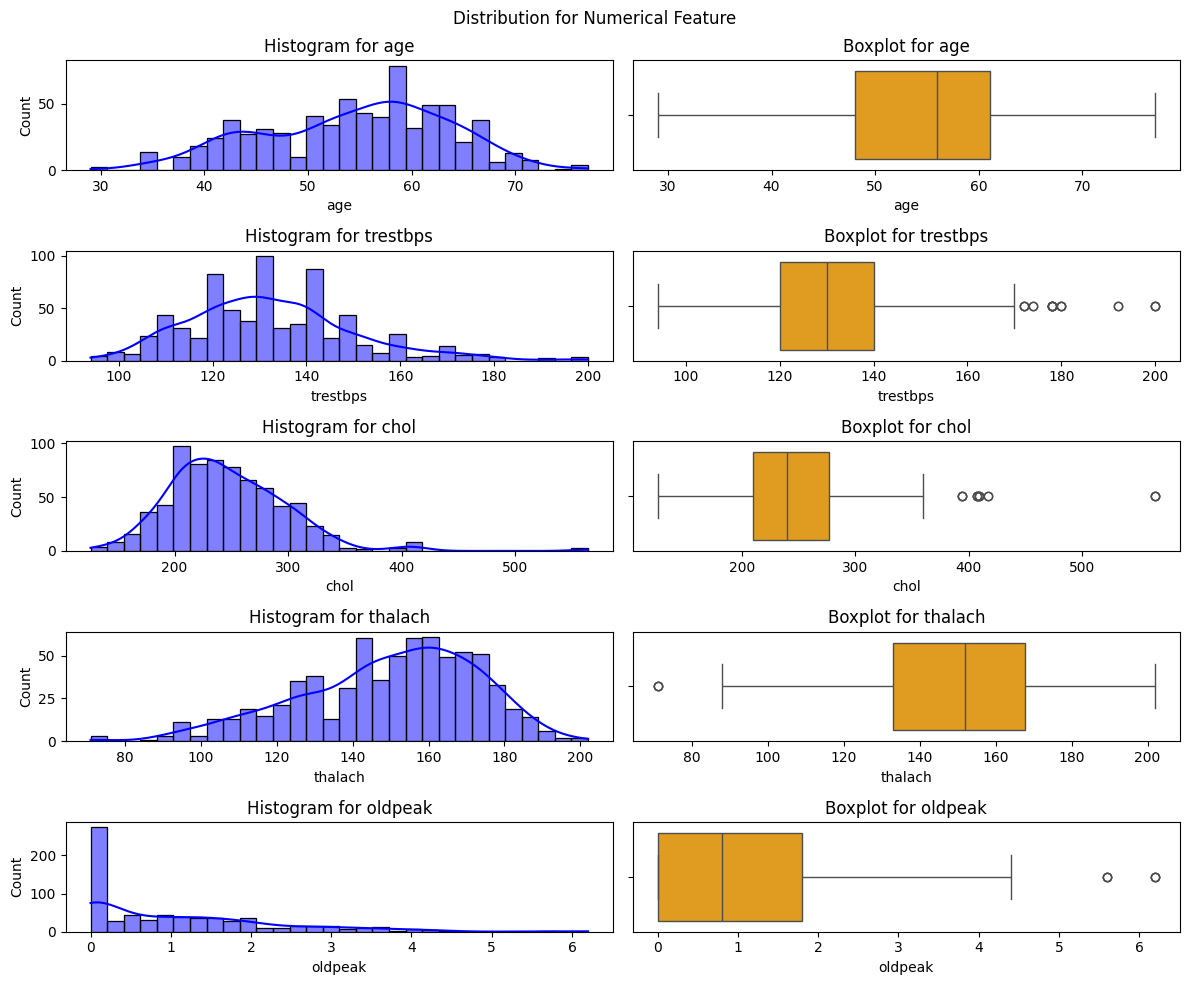

In [ ]:
# Visualize for numerical feature
fig, axes = plt.subplots(5, 2, figsize=(12, 10))
fig.suptitle("Distribution for Numerical Feature")

for i, col in enumerate(num_cols):
    # First column: Histogram
    sns.histplot(imputed_train_df[col], ax=axes[i, 0], bins= 30, kde=True, color="blue")
    axes[i, 0].set_title(f"Histogram for {col}")

    # Second column: Boxplot
    sns.boxplot(x=imputed_train_df[col], ax=axes[i, 1], color="orange")
    axes[i, 1].set_title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()


### Bivariate Analysis

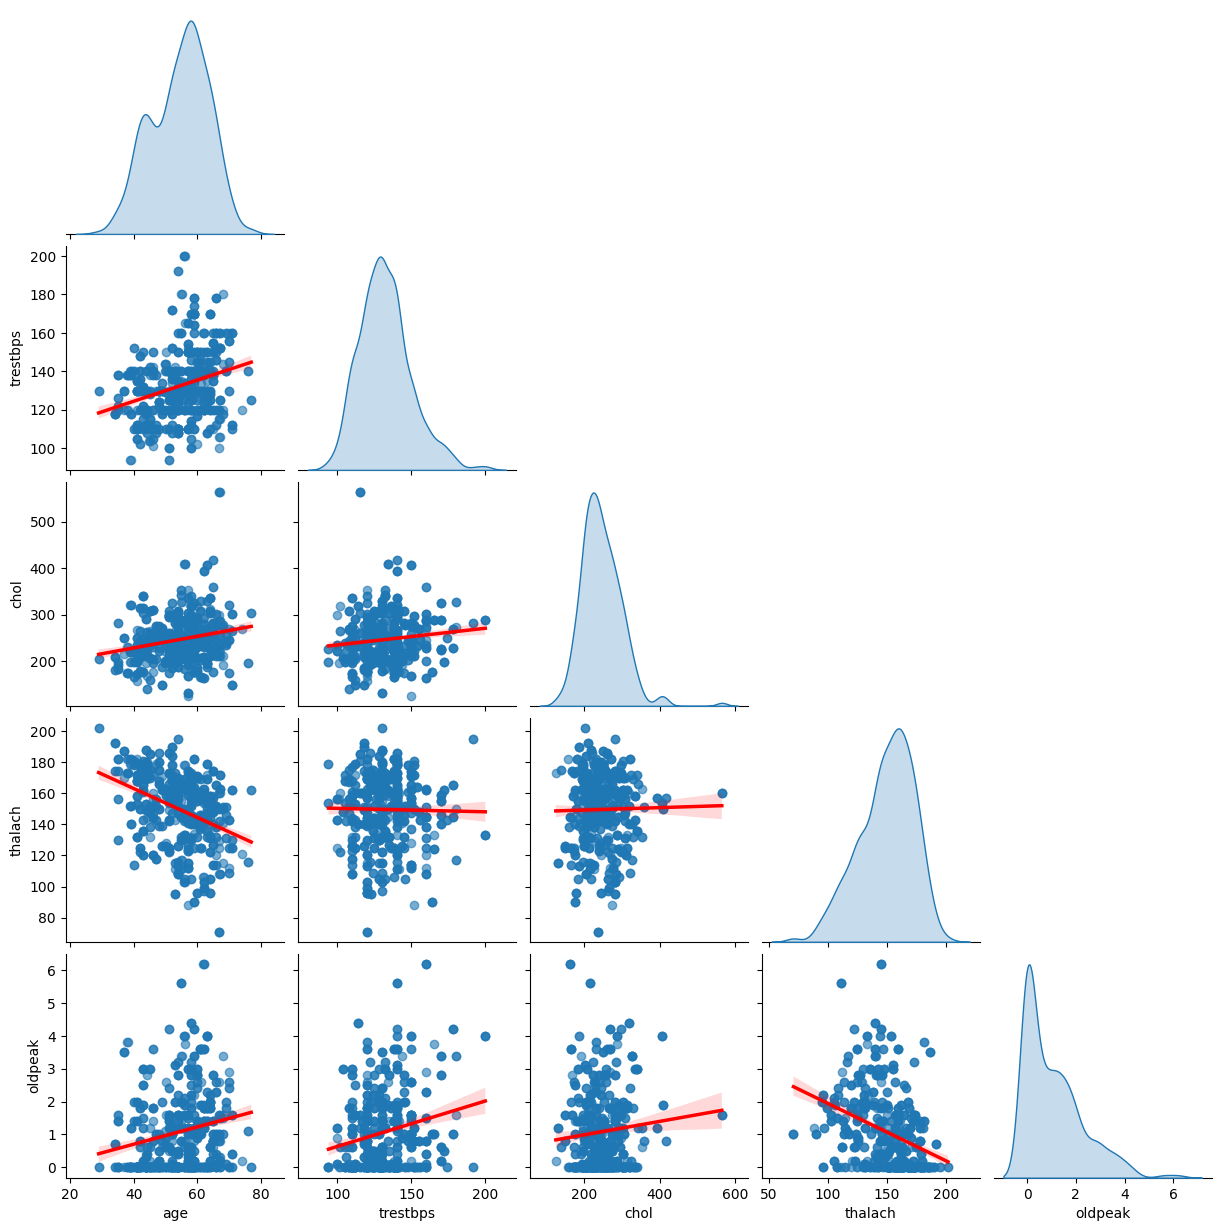

In [ ]:
# Visualize relationship between two numerical features

sns.pairplot(imputed_train_df[num_cols], diag_kind="kde", kind='reg', corner=True,
             plot_kws={'scatter_kws': {'alpha': 0.6},  # Adjust scatter transparency
                       'line_kws': {'color': 'red', 'linewidth': 2.5}})  # Bold regression line)
plt.show()

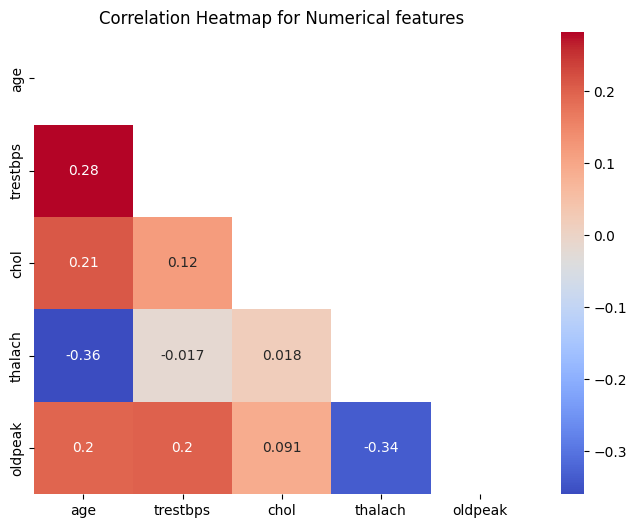

In [ ]:
# Visualize correlations between numerical variable
numerical_corr = imputed_train_df[num_cols].corr()
mask = np.triu(np.ones_like(numerical_corr, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_corr, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical features')
plt.show()

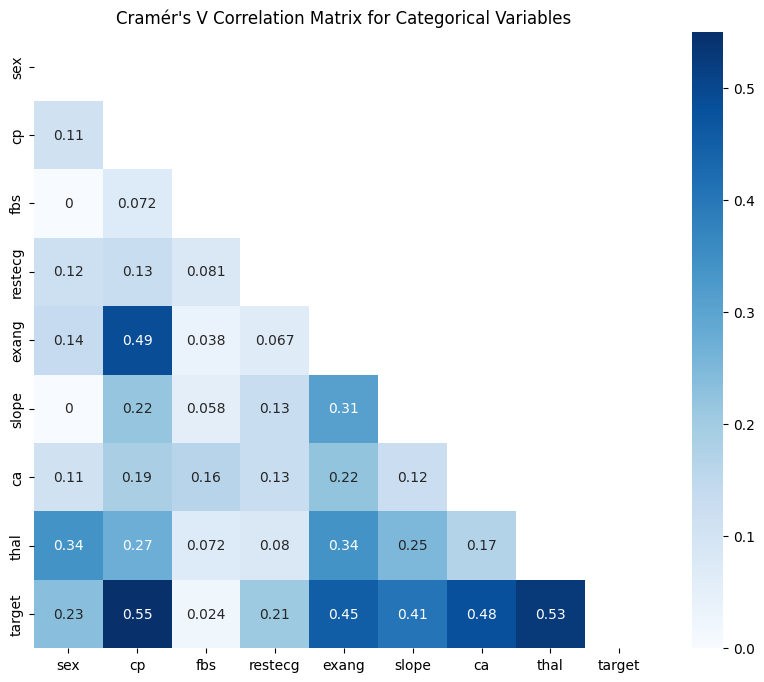

In [ ]:
# Function to calculate Cramer's V statistic
def cramers_v(x, y):
    """Calculate Cramér’s V statistic with bias correction for two categorical variables."""
    contingency_table = pd.crosstab(x, y)  # Create contingency table
    chi2, _, _, _ = chi2_contingency(contingency_table)  # Chi-square test

    n = contingency_table.sum().sum()  # Total observations
    r, c = contingency_table.shape

    # Apply bias correction
    phi2 = chi2/n
    phi2_corr = max(0, phi2 - ((r - 1) * (c - 1)) / (n - 1))

    r_corr = r - ((r - 1) ** 2) / (n - 1)
    c_corr = c - ((c - 1) ** 2) / (n - 1)

    if min(r_corr - 1, c_corr - 1) == 0:
        return 0  # Avoid division by zero

    return np.sqrt(phi2_corr / min(r_corr - 1, c_corr - 1))

cramers_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))),
                              index=cat_cols, columns=cat_cols)

mask = np.triu(np.ones_like(cramers_matrix, dtype=bool))

for col1 in cat_cols:
    for col2 in cat_cols:
            cramers_matrix.loc[col1, col2] =cramers_v(imputed_train_df[col1], imputed_train_df[col2])

plt.figure(figsize=(10,8))
sns.heatmap(cramers_matrix, mask=mask, annot=True, cmap='Blues')
plt.title("Cramér's V Correlation Matrix for Categorical Variables")
plt.show()

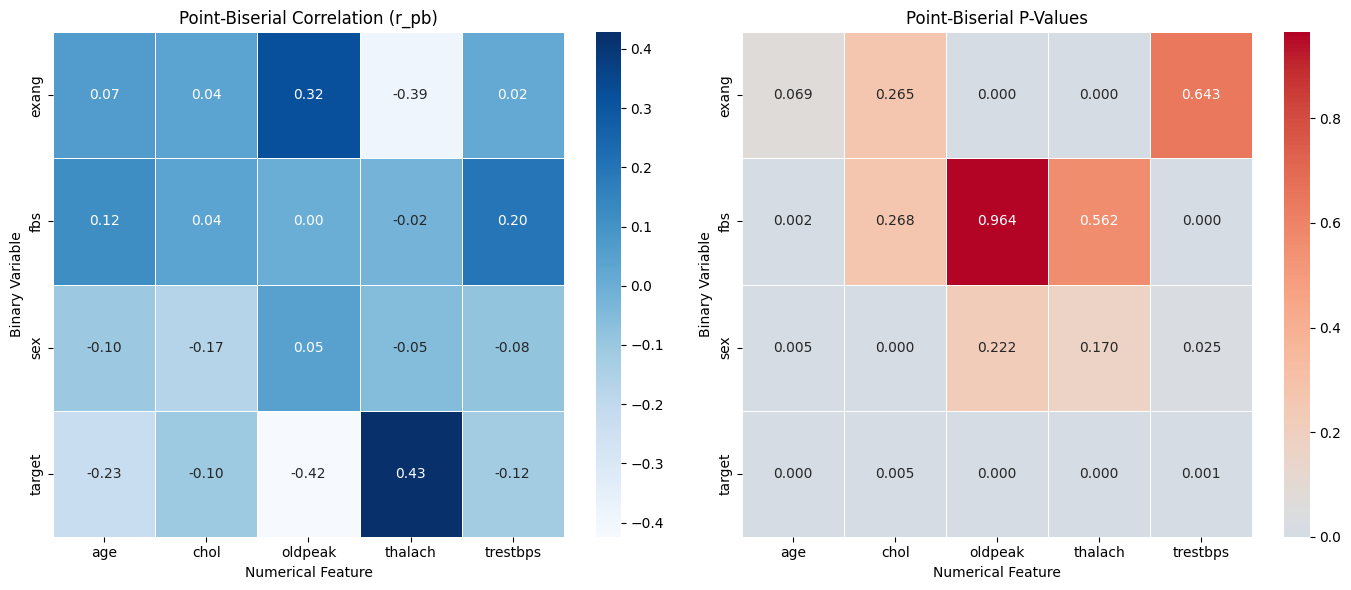

In [ ]:
# Compute point-biserial correlation and p-values
# Point Biserial Correlation
'''
measure strength and direction of 1 continuous variable with 1 dichotomous variable
note : dichotomous means one variable only have 2 option : Eg. Male and Female represent by 0 and 1'
'''
binary_cols = ["sex", "target", "exang", "fbs"]
correlation_results = []

for binary_var in binary_cols:
    for num_var in num_cols:
        corr, p_value = pointbiserialr(imputed_train_df[num_var], imputed_train_df[binary_var])
        correlation_results.append((binary_var, num_var, corr, p_value))

# Convert results to DataFrame
correlation_df = pd.DataFrame(correlation_results, columns=["Binary Variable", "Numerical Feature", "Correlation", "P-value"])

# Pivot tables for heatmap
corr_matrix = correlation_df.pivot(index="Binary Variable", columns="Numerical Feature", values="Correlation")
pval_matrix = correlation_df.pivot(index="Binary Variable", columns="Numerical Feature", values="P-value")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot Point-Biserial Correlation Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5, center=0, ax=axes[0])
axes[0].set_title("Point-Biserial Correlation (r_pb)")

# Plot P-value Heatmap
sns.heatmap(pval_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5, center=0.05, ax=axes[1])
axes[1].set_title("Point-Biserial P-Values")

# Adjust layout and show
plt.tight_layout()
plt.show()

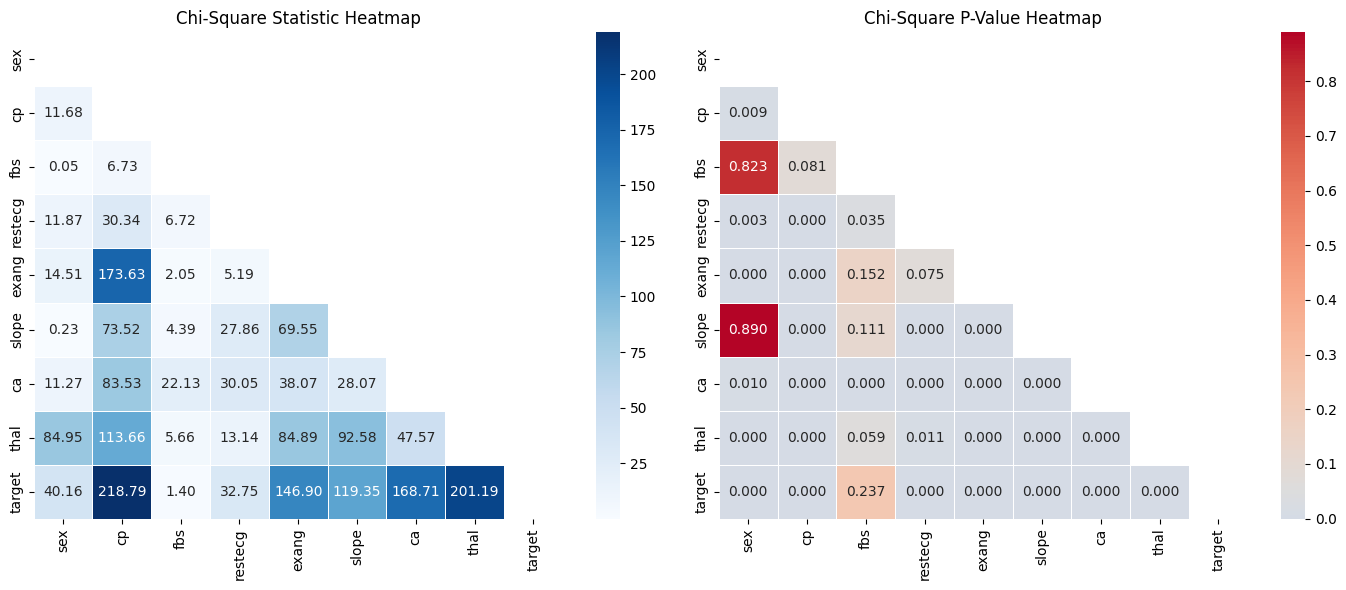

In [ ]:
# Function to compute Chi-Square test for all categorical variable pairs
def chi_square_test_all(df):
    cat_vars = df.select_dtypes(exclude=[np.number])  # Select only categorical variables
    cat_cols = cat_vars.columns

    chi2_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)
    pval_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

    for col1 in cat_cols:
        for col2 in cat_cols:
            if col1 == col2:
                chi2_matrix.loc[col1, col2] = np.nan  # No need for self-comparison
                pval_matrix.loc[col1, col2] = np.nan
            else:
                table = pd.crosstab(df[col1], df[col2])
                chi2_stat, p, dof, expected = stats.chi2_contingency(table)

                chi2_matrix.loc[col1, col2] = chi2_stat
                pval_matrix.loc[col1, col2] = p

    return chi2_matrix.astype(float), pval_matrix.astype(float)

# Compute Chi-Square test results
chi2_matrix, pval_matrix = chi_square_test_all(imputed_train_df)

# Create a mask for the upper triangle
chi2_mask = np.triu(np.ones_like(chi2_matrix, dtype=bool))  # Upper triangle mask
pval_mask = np.triu(np.ones_like(pval_matrix, dtype=bool))

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot Chi-Square Statistic Heatmap
sns.heatmap(chi2_matrix, mask=chi2_mask, annot=True, cmap="Blues", linewidths=0.5, fmt=".2f", ax=axes[0])
axes[0].set_title("Chi-Square Statistic Heatmap")

# Plot P-value Heatmap
sns.heatmap(pval_matrix, mask=pval_mask, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".3f", center=0.05, ax=axes[1])
axes[1].set_title("Chi-Square P-Value Heatmap")

# Show the plots
plt.tight_layout()
plt.show()

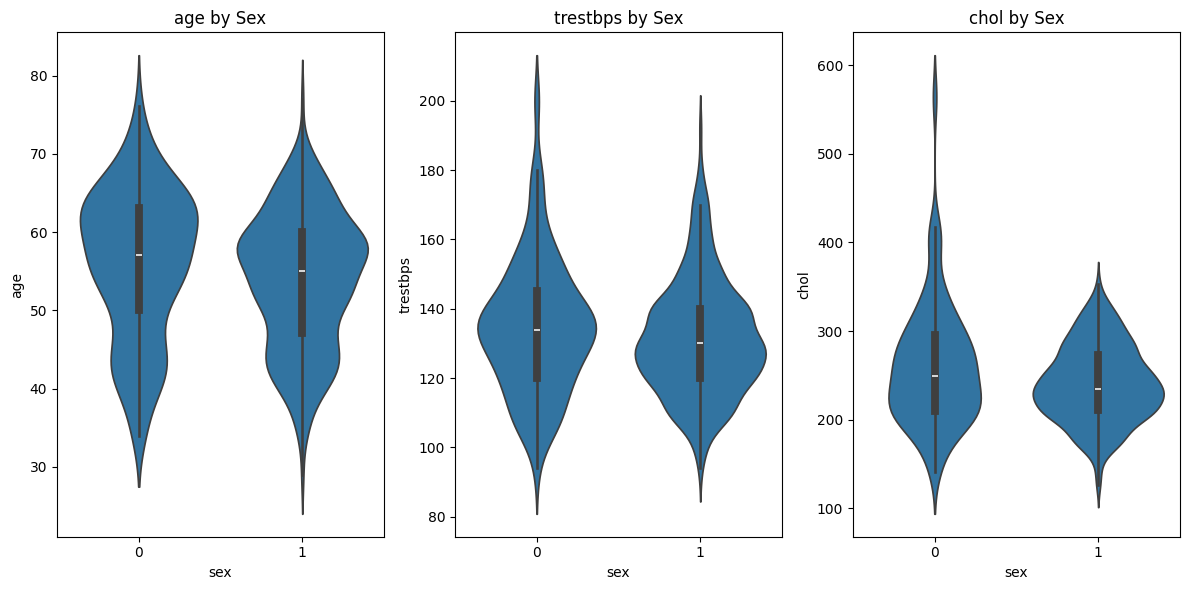

In [ ]:
plt.figure(figsize=(12, 6))
for i, num_col in enumerate(num_cols[:3]):  # Limit to 3 for clarity
    plt.subplot(1, 3, i+1)
    sns.violinplot(x="sex", y=num_col, data=imputed_train_df, inner="box")  # Violin plot
    plt.title(f"{num_col} by Sex")
plt.tight_layout()
plt.show()


### Multivariate Analysis

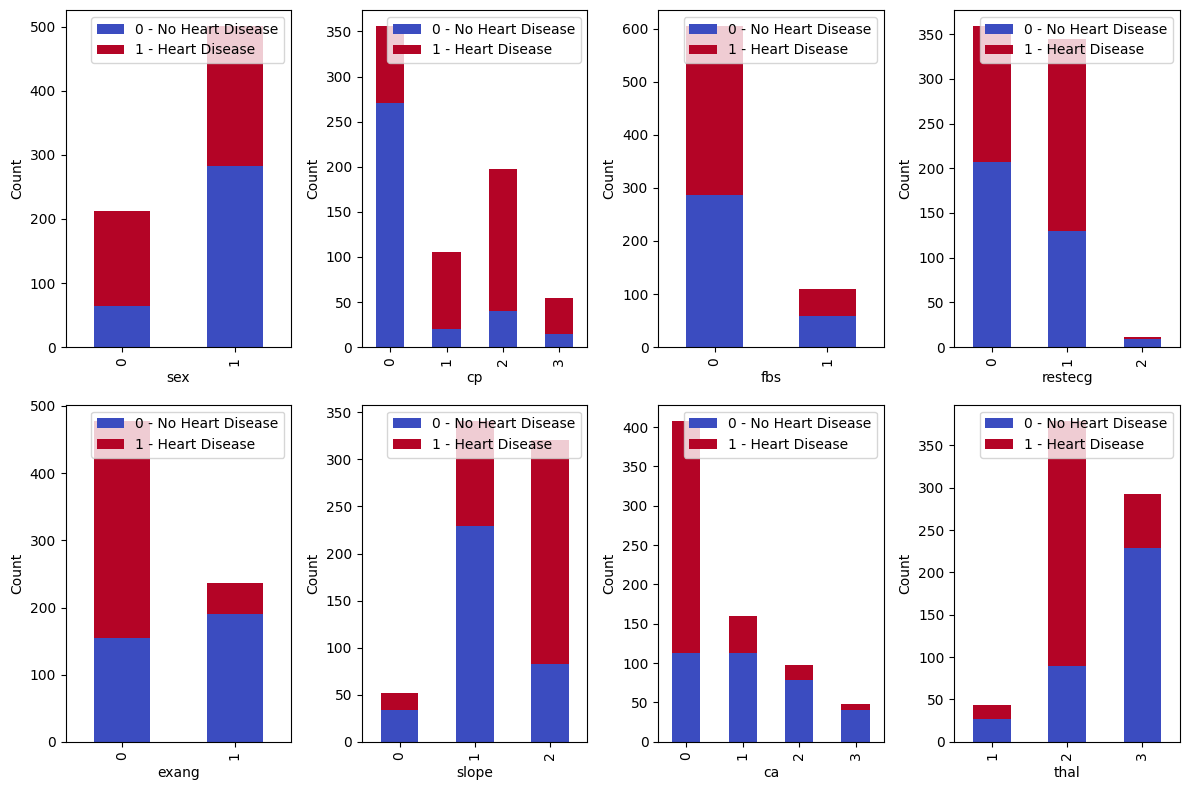

In [ ]:
# Set up figure and axes
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))

# Flatten axes for easy looping
axes = axes.flatten()

# Loop through categorical features and plot stacked bar charts
for i, col in enumerate(cat_cols[:-1]):  # Exclude 'target' from the loop
    # Get counts for each category split by target
    category_counts = imputed_train_df.groupby([col, 'target']).size().unstack()

    # Plot stacked bar chart
    category_counts.plot(kind='bar', stacked=True, ax=axes[i], colormap='coolwarm')

    # Titles and labels
    axes[i].set_ylabel('Count')
    axes[i].legend(["0 - No Heart Disease", "1 - Heart Disease"])
# Adjust layout
plt.tight_layout()
plt.show()


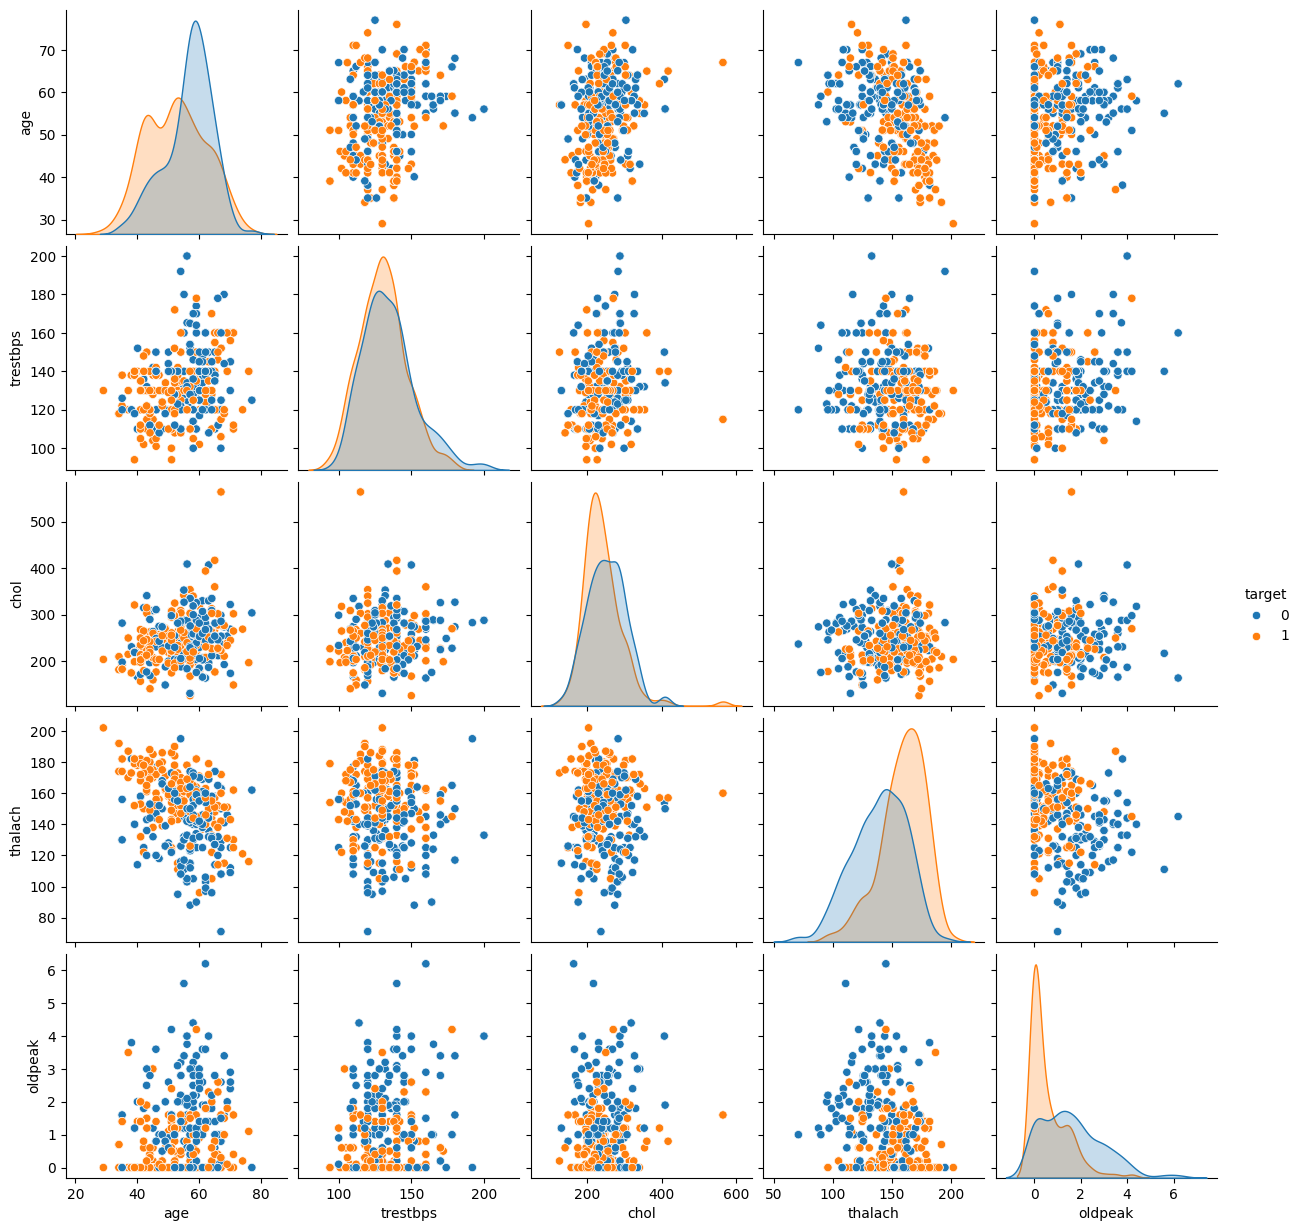

In [ ]:
# Visualize relationship between numerical variables colored by target
sns.pairplot(imputed_train_df, diag_kind="kde", hue="target", vars=num_cols)
plt.show()

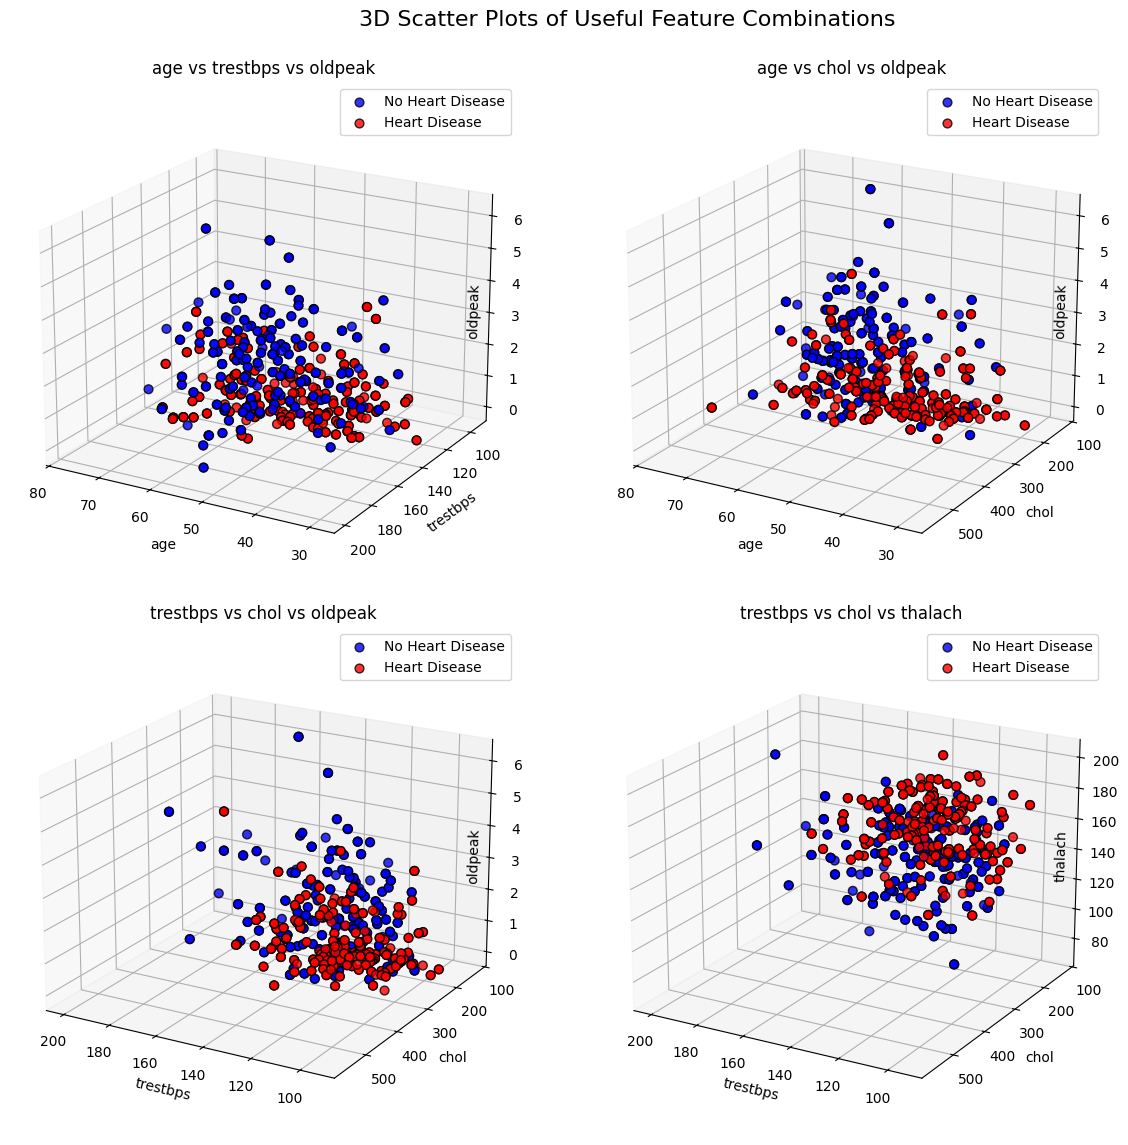

In [ ]:
# Define the useful feature combinations
useful_combinations = [
    ('age', 'trestbps', 'oldpeak'),
    ('age', 'chol', 'oldpeak'),
    ('trestbps', 'chol', 'oldpeak'),
    ('trestbps', 'chol', 'thalach')
]

# Define colors for the target variable
colors = {0: "blue", 1: "red"}
labels = {0: "No Heart Disease", 1: "Heart Disease"}

# Define subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 12), subplot_kw={'projection': '3d'})
fig.suptitle("3D Scatter Plots of Useful Feature Combinations", fontsize=16, y=0.95)

# Loop through the feature combinations and create subplots
for i, (x_col, y_col, z_col) in enumerate(useful_combinations):
    ax = axes[i // 2, i % 2]  # Access subplots in a 2x2 layout

    # Scatter plot for each target class
    for target_value in [0, 1]:
        subset = imputed_train_df[imputed_train_df["target"] == target_value]
        ax.scatter(
            subset[x_col], subset[y_col], subset[z_col],
            c=colors[target_value], label=labels[target_value],
            alpha=0.8, edgecolors='k', s=40
        )


    # Labels
    ax.set_xlabel(x_col, fontsize=10)
    ax.set_ylabel(y_col, fontsize=10)
    ax.set_zlabel(z_col, fontsize=10, labelpad=-28)
    ax.set_title(f'{x_col} vs {y_col} vs {z_col}', fontsize=12)

    # Set view angle for better visualization
    ax.view_init(elev=20, azim=120)

    # Add legend
    ax.legend()

# Adjust layout
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Leave space for the suptitle
plt.show()

### Skewness Analysis
- before transformation we will visualize the skewness of Training set
- helps in deciding whether further transformations are needed

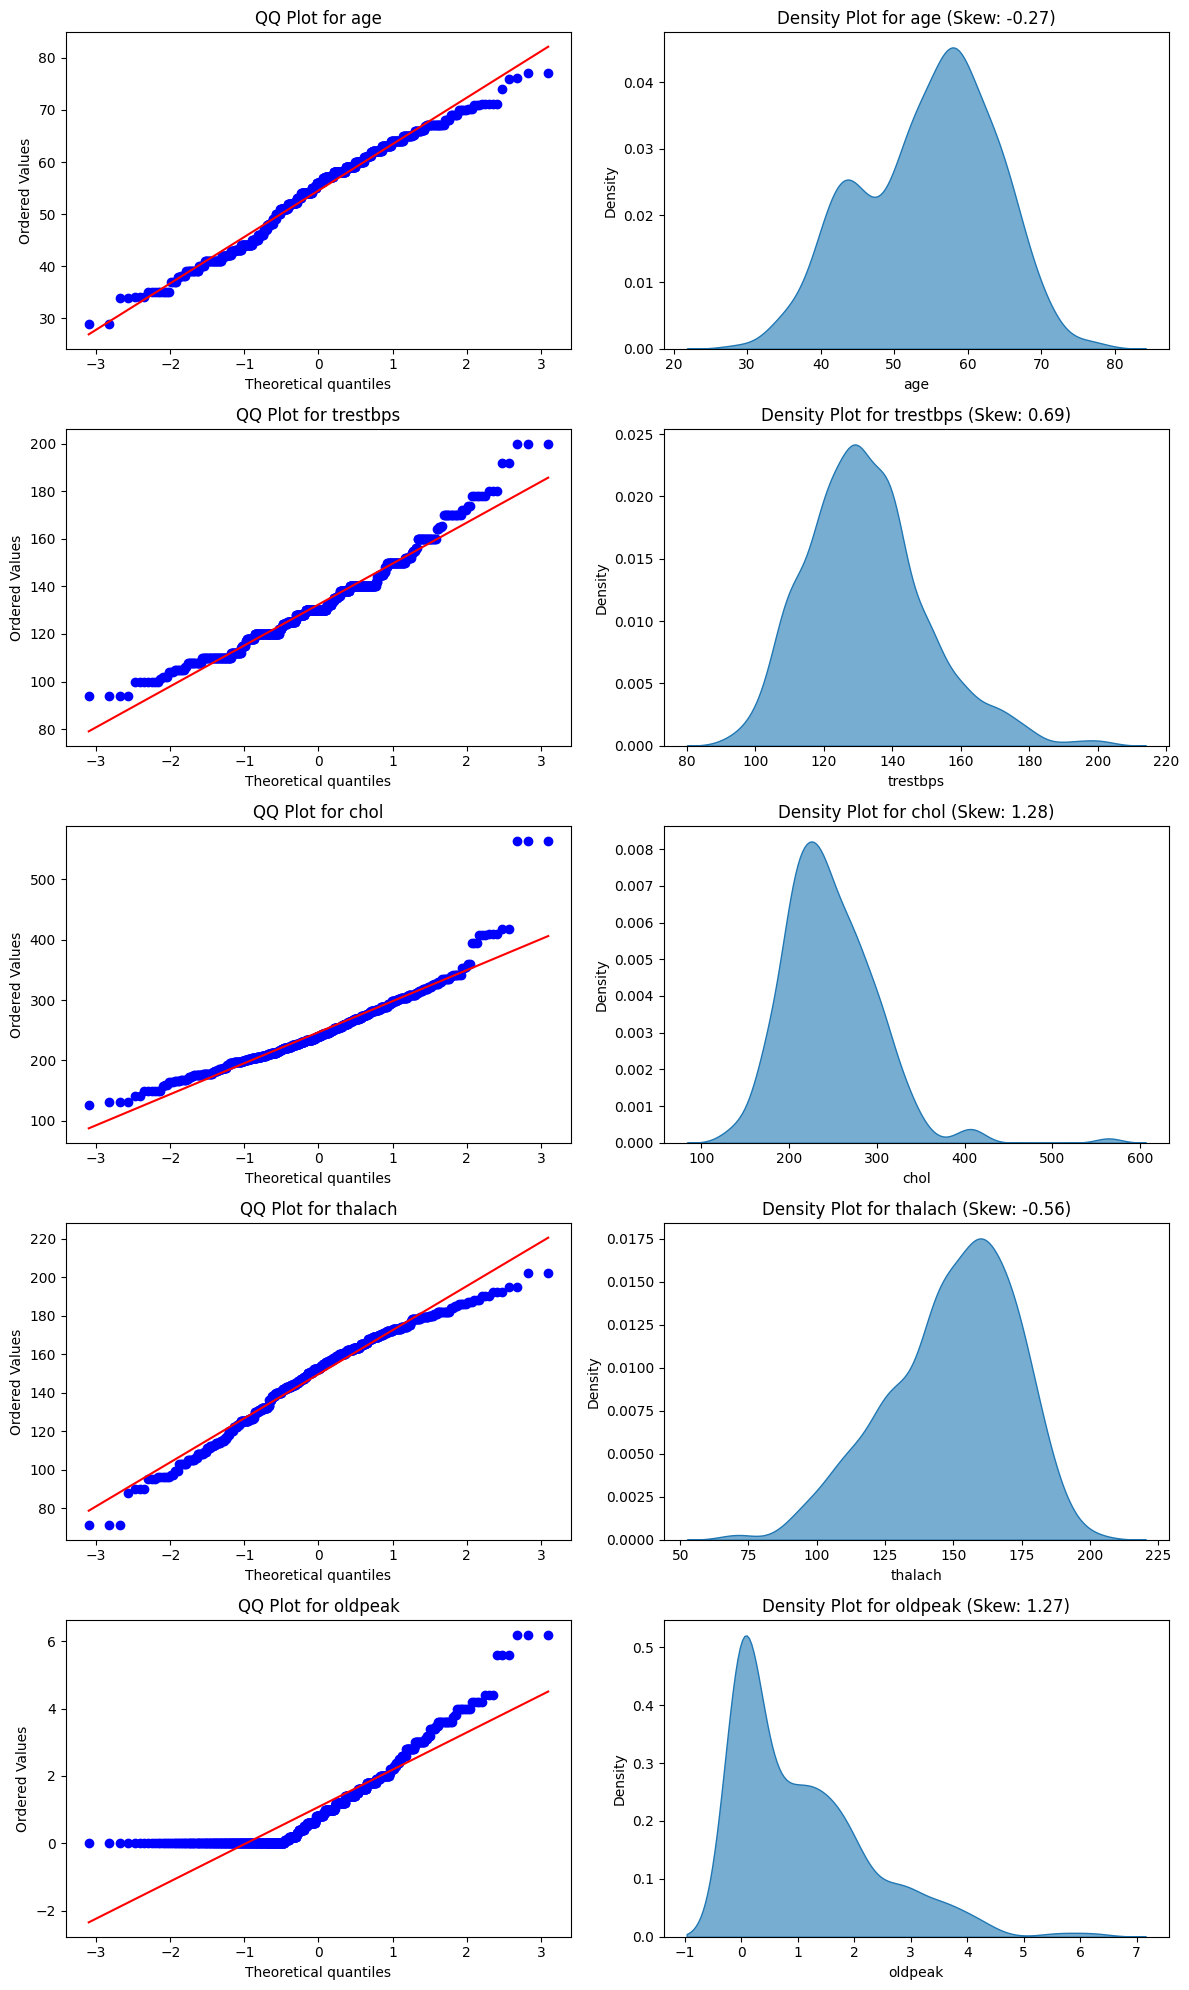

In [ ]:
# Create a 5x2 grid layout
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

# Loop through the first 5 numerical features (adjust if needed)
for i, col in enumerate(num_cols):
    # QQ Plot (Left)
    stats.probplot(imputed_train_df[col], dist="norm", plot=axes[i, 0])
    axes[i, 0].set_title(f'QQ Plot for {col}')

    # Density Plot (Right) with Skewness
    sns.kdeplot(imputed_train_df[col], fill=True, ax=axes[i, 1], alpha=0.6)
    skewness = imputed_train_df[col].skew()
    axes[i, 1].set_title(f'Density Plot for {col} (Skew: {skewness:.2f})')

# Adjust layout
plt.tight_layout()
plt.show()

## Transformation
- transformation are applied on highly skewed features
- yeo-johnson are used as it can handle both positive and negative values

### ==== Training Set ====

Applied Yeo-Johnson to ['chol', 'oldpeak']


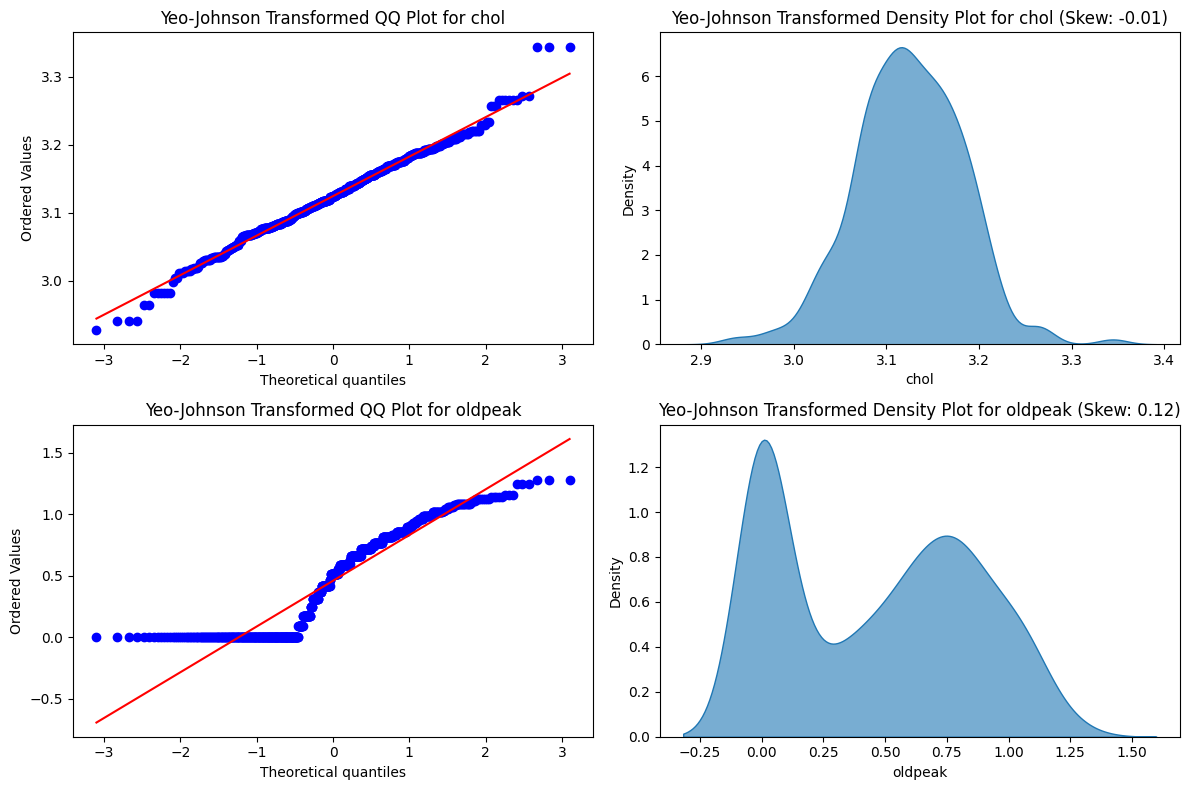

In [ ]:
# Identify highly skewed columns in the training set
skew_vals = imputed_train_df[num_cols].apply(skew)
high_skew_cols = skew_vals[abs(skew_vals) > 1].index  # Selecting features with |skew| > 1

# Initialize PowerTransformer
pt = PowerTransformer(method="yeo-johnson", standardize=False)

# Fit and transform on the training set
transform_train_df = imputed_train_df.copy()
transform_train_df[high_skew_cols] = pt.fit_transform(transform_train_df[high_skew_cols])

# Step 3: Save the transformer and skewed column names
joblib.dump((pt, high_skew_cols), 'yeo_johnson_transformer.pkl')

print(f"Applied Yeo-Johnson to {list(high_skew_cols)}")

fig, axes = plt.subplots(len(high_skew_cols), 2, figsize=(12, 8))

# Loop through the first 5 numerical features (adjust if needed)
for i, col in enumerate(high_skew_cols):

    # QQ Plot (Left)
    stats.probplot(transform_train_df[col], dist="norm", plot=axes[i, 0])
    axes[i, 0].set_title(f'Yeo-Johnson Transformed QQ Plot for {col}')

    # Density Plot (Right) with Skewness
    sns.kdeplot(transform_train_df[col], fill=True, ax=axes[i, 1], alpha=0.6)
    skewness = transform_train_df[col].skew()
    axes[i, 1].set_title(f'Yeo-Johnson Transformed Density Plot for {col} (Skew: {skewness:.2f})')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Apply the same transformation to the validation set and testing set
transform_val_df = clean_val_df.copy()
transform_val_df[high_skew_cols] = pt.transform(transform_val_df[high_skew_cols])

transform_test_df = clean_test_df.copy()
transform_test_df[high_skew_cols] = pt.transform(transform_test_df[high_skew_cols])

### Standardization

#### ==== Training Set ====

In [ ]:
# Perform standardizatio on numerical features
standard_train_df = transform_train_df.copy()
scaler = StandardScaler()
standard_train_df[num_cols] = scaler.fit_transform(standard_train_df[num_cols])

# Step 3: Save the transformer and skewed column names
joblib.dump((scaler, num_cols), 'standard_scaler.pkl')

standard_train_df[num_cols].skew()

age        -0.272732
trestbps    0.690009
chol       -0.011952
thalach    -0.561469
oldpeak     0.118358
dtype: float64

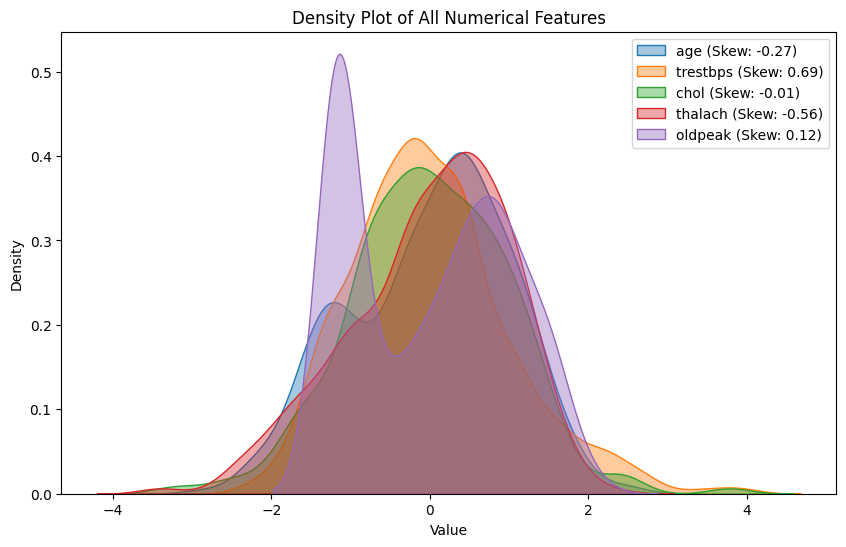

In [ ]:
# After imputation, we will view the skewness of numerical features
plt.figure(figsize=(10, 6))

# Loop through all numerical features and plot their density on the same graph
for col in num_cols:
    sns.kdeplot(standard_train_df[col], fill=True, label=f"{col} (Skew: {standard_train_df[col].skew():.2f})", alpha=0.4)

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Density Plot of All Numerical Features")
plt.legend()
plt.show()

In [ ]:
# Identify outliers beyond ±3 standard deviations
outlier_mask = (standard_train_df[num_cols] < -3) | (standard_train_df[num_cols] > 3)

# Get the indices and values of outliers
outliers = standard_train_df[num_cols][outlier_mask].stack().reset_index()
outliers.columns = ["Index", "Feature", "Z-Score"]

# Display the outliers
outliers

Index   Feature   Z-Score
0     291  trestbps  3.878434
1     173  trestbps  3.878434
2     264   thalach -3.400281
3     375   thalach -3.400281
4     324  trestbps  3.419470
5     190      chol  3.784210
6     150  trestbps  3.419470
7     882      chol -3.168548
8     293   thalach -3.400281
9     472      chol -3.386583
10    505  trestbps  3.878434
11    926      chol -3.168548
12     32      chol -3.168548
13    156      chol  3.784210
14    461      chol  3.784210

#### ==== Validation Set ====

In [ ]:
# Perform standardizatio on numerical features
standard_val_df = transform_val_df.copy()

standard_val_df[num_cols] = scaler.transform(standard_val_df[num_cols])

In [ ]:
# Identify outliers beyond ±3 standard deviations
outlier_mask = (standard_val_df[num_cols] < -3) | (standard_val_df[num_cols] > 3)

# Get the indices and values of outliers
outliers = standard_val_df[num_cols][outlier_mask].stack().reset_index()
outliers.columns = ["Index", "Feature", "Z-Score"]

# Display the outliers
outliers

Index   Feature   Z-Score
0    557   thalach -3.400281
1    687  trestbps  3.878434
2    244  trestbps  3.419470
3    334      chol -3.386583

#### ==== Testing Set ====

In [ ]:
# Perform standardizatio on numerical features
standard_test_df = transform_test_df.copy()

standard_test_df[num_cols] = scaler.transform(standard_test_df[num_cols])

In [ ]:
# Identify outliers beyond ±3 standard deviations
outlier_mask = (standard_test_df[num_cols] < -3) | (standard_test_df[num_cols] > 3)

# Get the indices and values of outliers
outliers = standard_test_df[num_cols][outlier_mask].stack().reset_index()
outliers.columns = ["Index", "Feature", "Z-Score"]

# Display the outliers
outliers

Index Feature   Z-Score
0    100    chol -3.386583

#### Categorical Features Encoding
- Categorical Variable need to be label encoded

In [ ]:
label_encoders = {}
encoded_train_df = standard_train_df.copy()
encoded_test_df = standard_test_df.copy()
encoded_val_df = standard_val_df.copy()

categorical_cols = standard_train_df.select_dtypes(include='category').columns

# Encode all categorical columns
for col in categorical_cols:
    le = LabelEncoder()

    # Fit on training data and transform
    encoded_train_df[col] = le.fit_transform(encoded_train_df[col])

    # Save the fitted encoder immediately after fitting
    label_encoders[col] = le

    # Transform val and test using the same encoder
    encoded_val_df[col] = le.transform(encoded_val_df[col])
    encoded_test_df[col] = le.transform(encoded_test_df[col])

# Save all label encoders to a file
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [ ]:
encoded_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 534 to 860
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       714 non-null    float64
 1   sex       714 non-null    int64  
 2   cp        714 non-null    int64  
 3   trestbps  714 non-null    float64
 4   chol      714 non-null    float64
 5   fbs       714 non-null    int64  
 6   restecg   714 non-null    int64  
 7   thalach   714 non-null    float64
 8   exang     714 non-null    int64  
 9   oldpeak   714 non-null    float64
 10  slope     714 non-null    int64  
 11  ca        714 non-null    int64  
 12  thal      714 non-null    int64  
 13  target    714 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 99.8 KB


### Save preprocessed train, test and validate set into CSV

In [ ]:
encoded_train_df.to_csv("train_preprocessed.csv", index=False)
encoded_test_df.to_csv("test_preprocessed.csv", index=False)
encoded_val_df.to_csv("val_preprocessed.csv", index=False)

# MODEL CREATION

## Importing Libraries

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform

## Importing datasets

In [ ]:
train_set = pd.read_csv("train_preprocessed.csv")
val_set = pd.read_csv("val_preprocessed.csv")
test_set = pd.read_csv("test_preprocessed.csv")

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       714 non-null    float64
 1   sex       714 non-null    int64  
 2   cp        714 non-null    int64  
 3   trestbps  714 non-null    float64
 4   chol      714 non-null    float64
 5   fbs       714 non-null    int64  
 6   restecg   714 non-null    int64  
 7   thalach   714 non-null    float64
 8   exang     714 non-null    int64  
 9   oldpeak   714 non-null    float64
 10  slope     714 non-null    int64  
 11  ca        714 non-null    int64  
 12  thal      714 non-null    int64  
 13  target    714 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 78.2 KB


In [ ]:
# Separate features (X) and target (y) for each set
target_col = "target"
X_train, y_train = train_set.drop(columns=[target_col]), train_set[target_col]
X_val, y_val = val_set.drop(columns=[target_col]), val_set[target_col]
X_test, y_test = test_set.drop(columns=[target_col]), test_set[target_col]

In [ ]:
def plot_roc_curves(model, X_train, y_train, X_val, y_val, X_test, y_test, title='ROC Curve', ax=None):
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_val_prob = model.predict_proba(X_val)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

    train_auc = roc_auc_score(y_train, y_train_prob)
    val_auc = roc_auc_score(y_val, y_val_prob)
    test_auc = roc_auc_score(y_test, y_test_prob)

    if ax is None:
        ax = plt.gca()

    ax.plot(fpr_train, tpr_train, label=f'Train AUC = {train_auc:.4f}')
    ax.plot(fpr_val, tpr_val, label=f'Validation AUC = {val_auc:.4f}')
    ax.plot(fpr_test, tpr_test, label=f'Test AUC = {test_auc:.4f}')
    ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc='lower right')


In [ ]:
def plot_feature_importance(model, feature_names, top_n, ax=None):
    importances = model.feature_importances_
    feature_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    if ax is None:
        ax = plt.gca()

    top_features = feature_df.head(top_n).iloc[::-1]  # Reverse for horizontal plot
    bars = ax.barh(top_features['Feature'], top_features['Importance'])

    ax.set_xlabel("Importance")
    ax.set_title(f"Top {top_n} Feature Importances")

    # Add text annotations to each bar
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.005, bar.get_y() + bar.get_height() / 2,
                f"{width:.4f}", va='center', fontsize=10, fontweight='bold')

In [ ]:
def plot_classification_reports(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Get classification reports as dictionaries
    report_train = classification_report(y_train, model.predict(X_train), output_dict=True)
    report_val = classification_report(y_val, model.predict(X_val), output_dict=True)
    report_test = classification_report(y_test, model.predict(X_test), output_dict=True)

    # Convert to DataFrames for heatmap
    df_train = pd.DataFrame(report_train).iloc[:-1, :].T  # Exclude 'accuracy' row
    df_val = pd.DataFrame(report_val).iloc[:-1, :].T
    df_test = pd.DataFrame(report_test).iloc[:-1, :].T

    # Plot heatmaps
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle("Classification Reports", fontsize=16)

    sns.heatmap(df_train, annot=True, fmt=".2f", cmap="Blues", ax=axes[0], vmin=0, vmax=1, annot_kws={"size": 14})
    axes[0].set_title("Train Set", fontsize=14)
    axes[0].tick_params(axis='both', labelsize=10)

    sns.heatmap(df_val, annot=True, fmt=".2f", cmap="Oranges", ax=axes[1], vmin=0, vmax=1, annot_kws={"size": 14})
    axes[1].set_title("Validation Set", fontsize=14)
    axes[1].tick_params(axis='both', labelsize=10)

    sns.heatmap(df_test, annot=True, fmt=".2f", cmap="Greens", ax=axes[2], vmin=0, vmax=1, annot_kws={"size": 14})
    axes[2].set_title("Test Set", fontsize=14)
    axes[2].tick_params(axis='both', labelsize=10)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_confusion_matrices(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Get confusion matrices
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_val = confusion_matrix(y_val, y_val_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Set up the figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns
    fig.suptitle("Confusion Matrix", fontsize=16)

    # Plot confusion matrices
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[0], annot_kws={"size": 14})
    axes[0].set_title('Train Set', fontsize=14)
    axes[0].set_xlabel('Predicted', fontsize=14)
    axes[0].set_ylabel('True', fontsize=14)
    axes[0].tick_params(axis='both', labelsize=12)

    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Oranges', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[1], annot_kws={"size": 14})
    axes[1].set_title('Validation Set', fontsize=14)
    axes[1].set_xlabel('Predicted', fontsize=14)
    axes[1].set_ylabel('True', fontsize=14)
    axes[1].tick_params(axis='both', labelsize=12)

    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[2], annot_kws={"size": 14})
    axes[2].set_title('Test Set', fontsize=14)
    axes[2].set_xlabel('Predicted', fontsize=14)
    axes[2].set_ylabel('True', fontsize=14)
    axes[2].tick_params(axis='both', labelsize=12)

    # Title for the entire figure
    # plt.suptitle('Confusion Matrices', fontsize=16)
    plt.tight_layout()
    plt.show()


## K-Nearest Neighbors

### Finding Best K


The best value of k based on accuracy is: 3


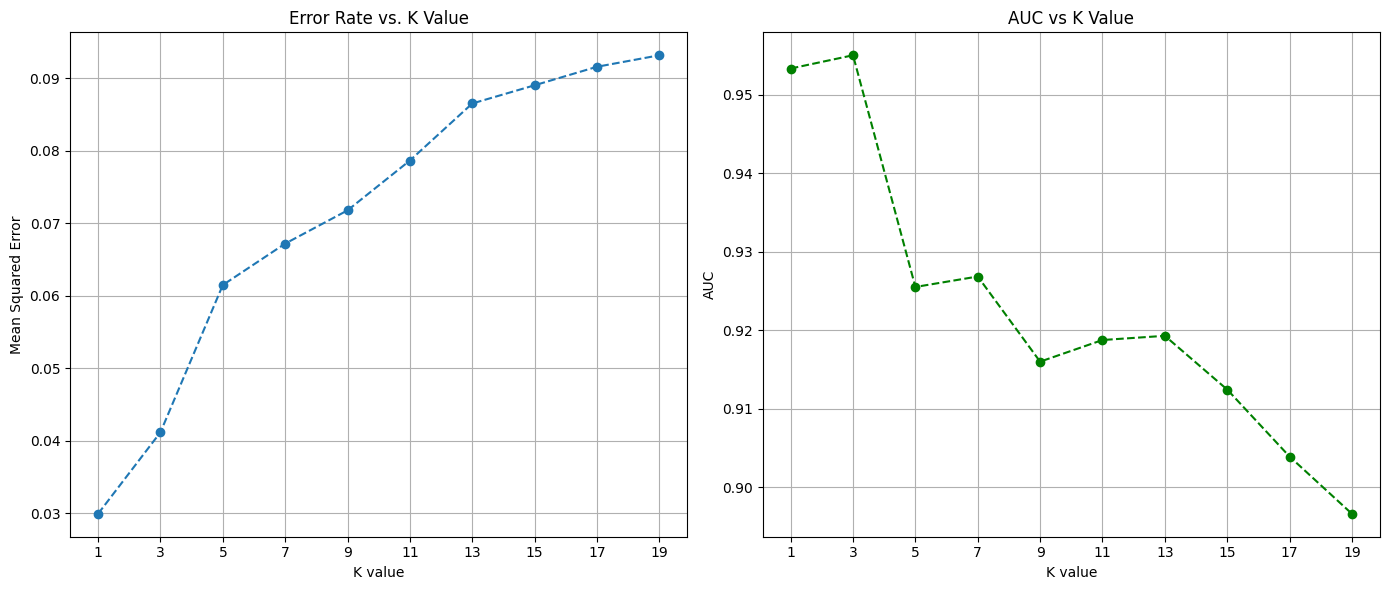

In [ ]:
# Find best K-value based on AUC
neighbors = [i for i in range(1, 21, 2)]
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc')
    cv_scores.append(scores.mean())

mse = [1 - x for x in cv_scores]
# Exclude the first element (k=1) from mse for finding the best k
best_k = neighbors[mse.index(min(mse[1:]))]

print(f"\nThe best value of k based on accuracy is: {best_k}")

# Compute AUC values for each k
auc_values = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)  # Train on the training set

    # Predict on the test set
    y_test_pred = knn.predict(X_test)
    y_test_proba = knn.predict_proba(X_test)[:, 1]

    # Evaluate performance
    auc = roc_auc_score(y_test, y_test_proba)
    auc_values.append(auc)

# Creating a subplot with two plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Error Rate vs. K Value
axes[0].plot(neighbors, mse, marker='o', linestyle='dashed')
axes[0].set_xlabel('K value')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_title('Error Rate vs. K Value')
axes[0].grid(True)
axes[0].set_xticks([i for i in range(1, 21, 2)], minor=False)

# Plot the AUC vs. K Value
axes[1].plot(neighbors, auc_values, marker='o', color='g', linestyle='dashed', label='AUC Value')
axes[1].set_xlabel('K value')
axes[1].set_ylabel('AUC')
axes[1].set_title('AUC vs K Value')
axes[1].grid(True)
axes[1].set_xticks([i for i in range(1, 21, 2)], minor=False)

plt.tight_layout()
plt.show()

In [ ]:
# base model
knn = KNeighborsClassifier(n_neighbors=best_k)

# Define parameter distribution
param_rand_knn = {
    'n_neighbors': np.arange(1, 21, 2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2]
}

rand_model_knn = RandomizedSearchCV(
    knn,
    param_rand_knn,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1,
    random_state=42)

### - Base Model -


KNN Model without Randomized SearchCV


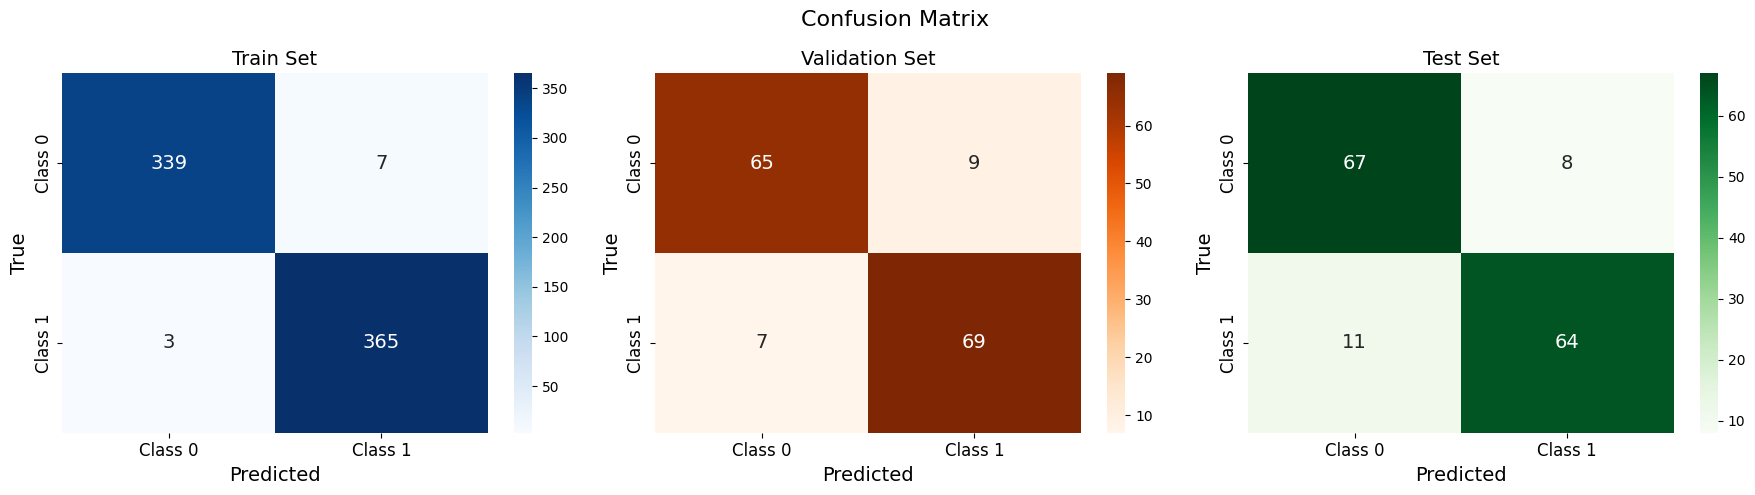

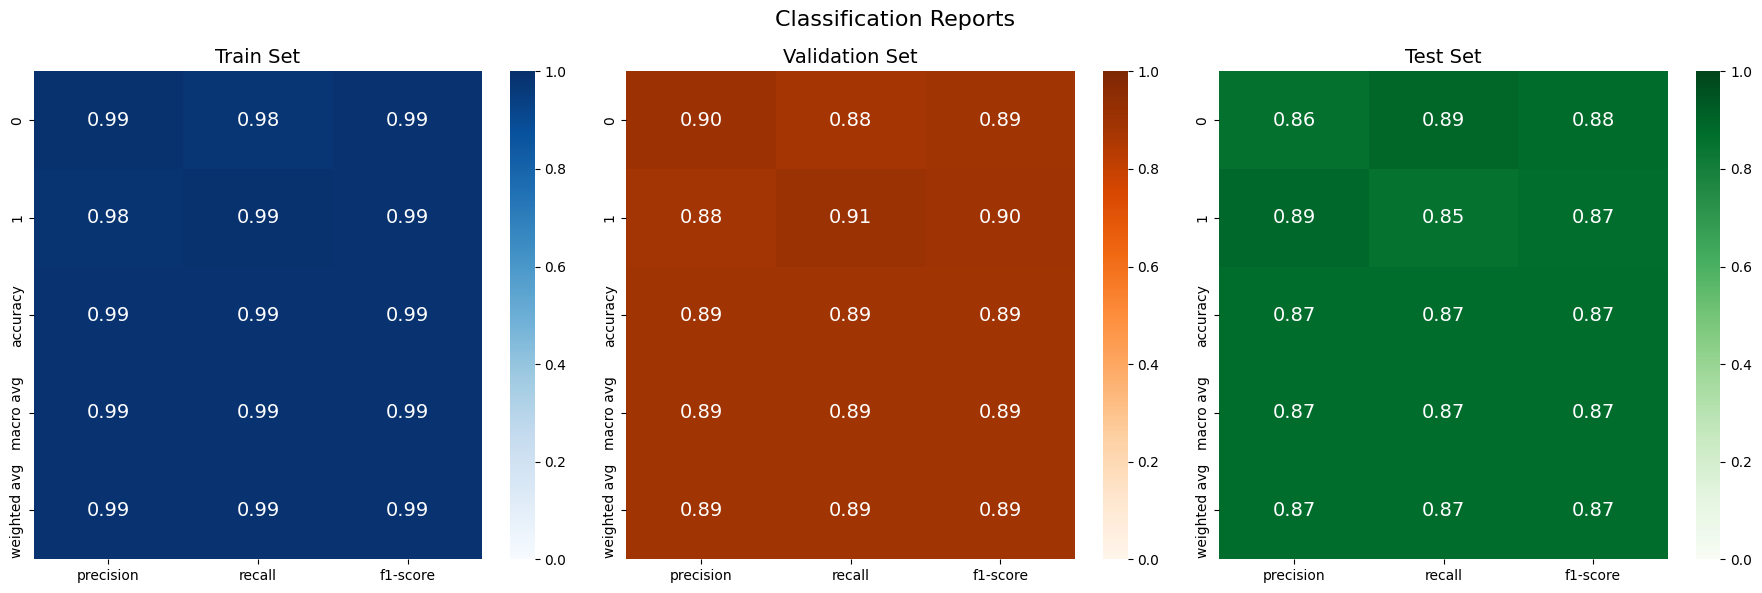

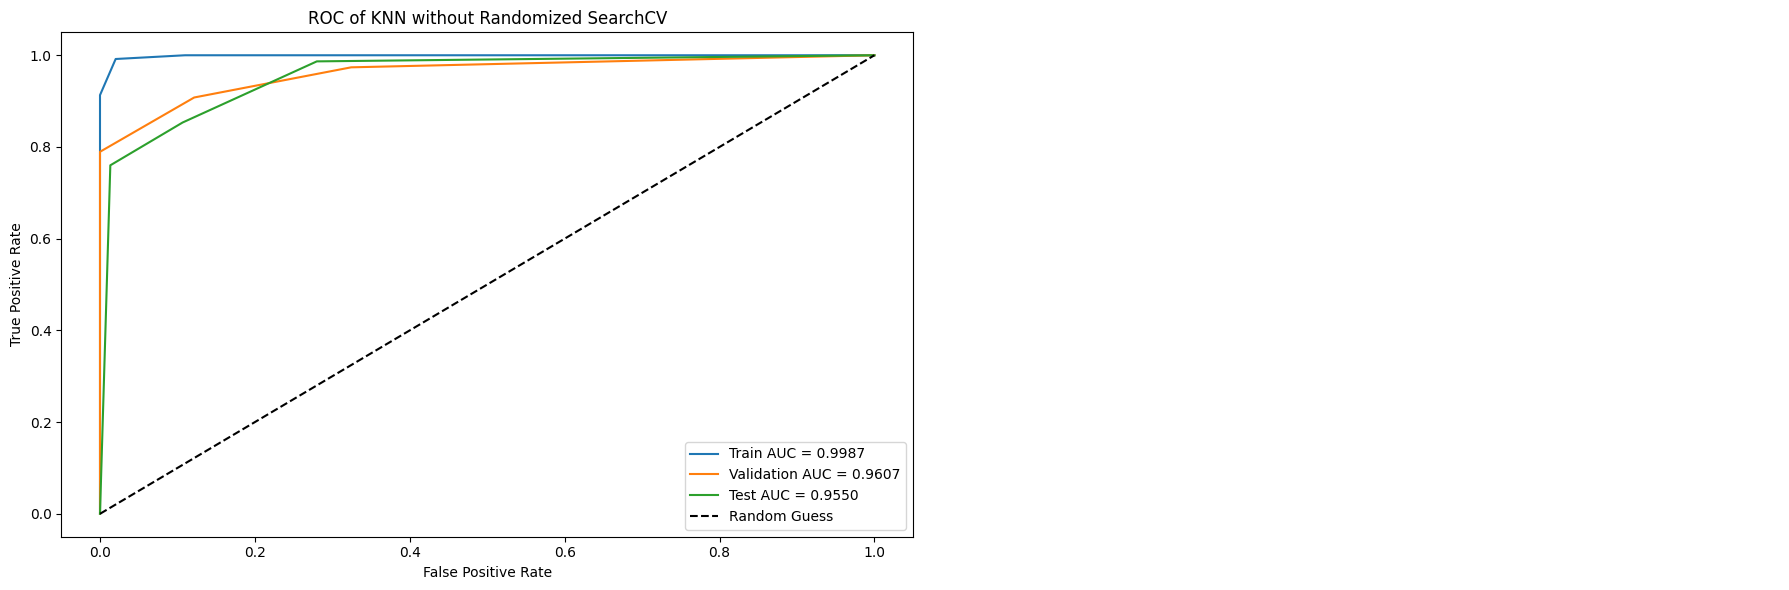

In [ ]:
print("\nKNN Model without Randomized SearchCV")
knn.fit(X_train, y_train)  # Train on the training set

plot_confusion_matrices(knn, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(knn, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(knn, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of KNN without Randomized SearchCV", ax=axes[0])
axes[1].axis('off')

plt.tight_layout()
plt.show()

#### - Hyperparameter Tuning with Randomized SearchCV -


KNN Model with Randomized SearchCV
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters after tuning:  {'weights': 'distance', 'p': 1, 'n_neighbors': np.int64(13), 'metric': 'manhattan', 'algorithm': 'brute'}
Best cross-validation score:  0.9943207139752703


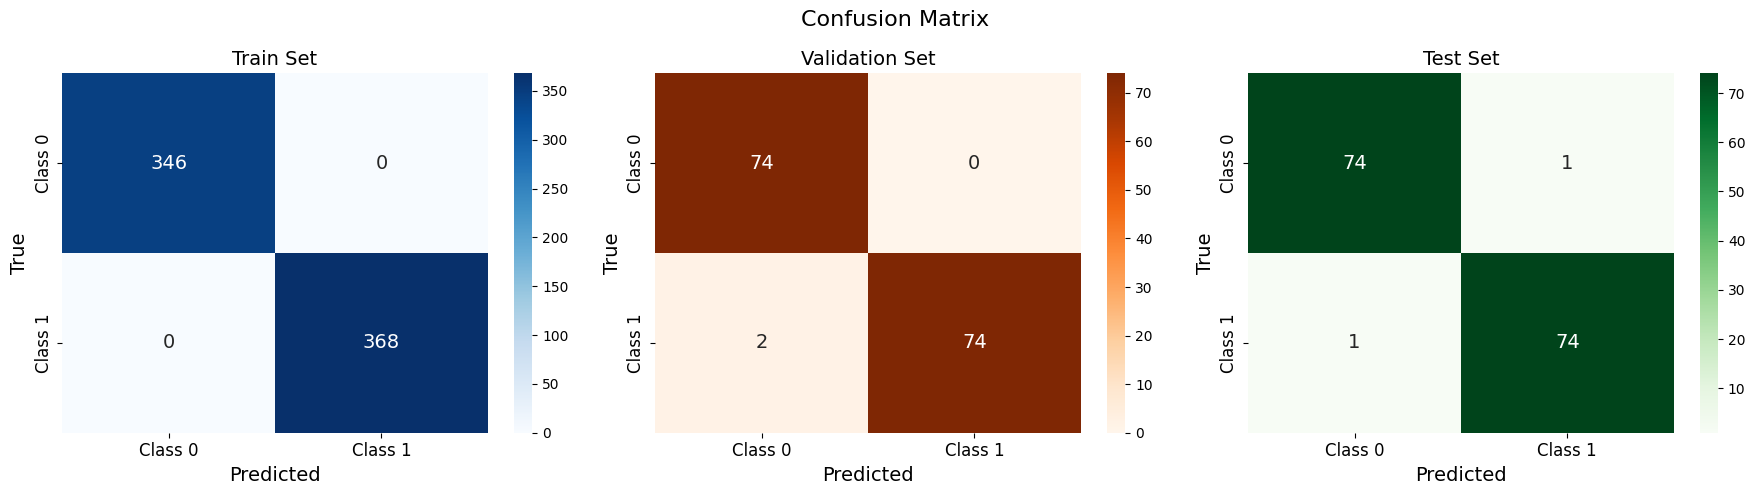

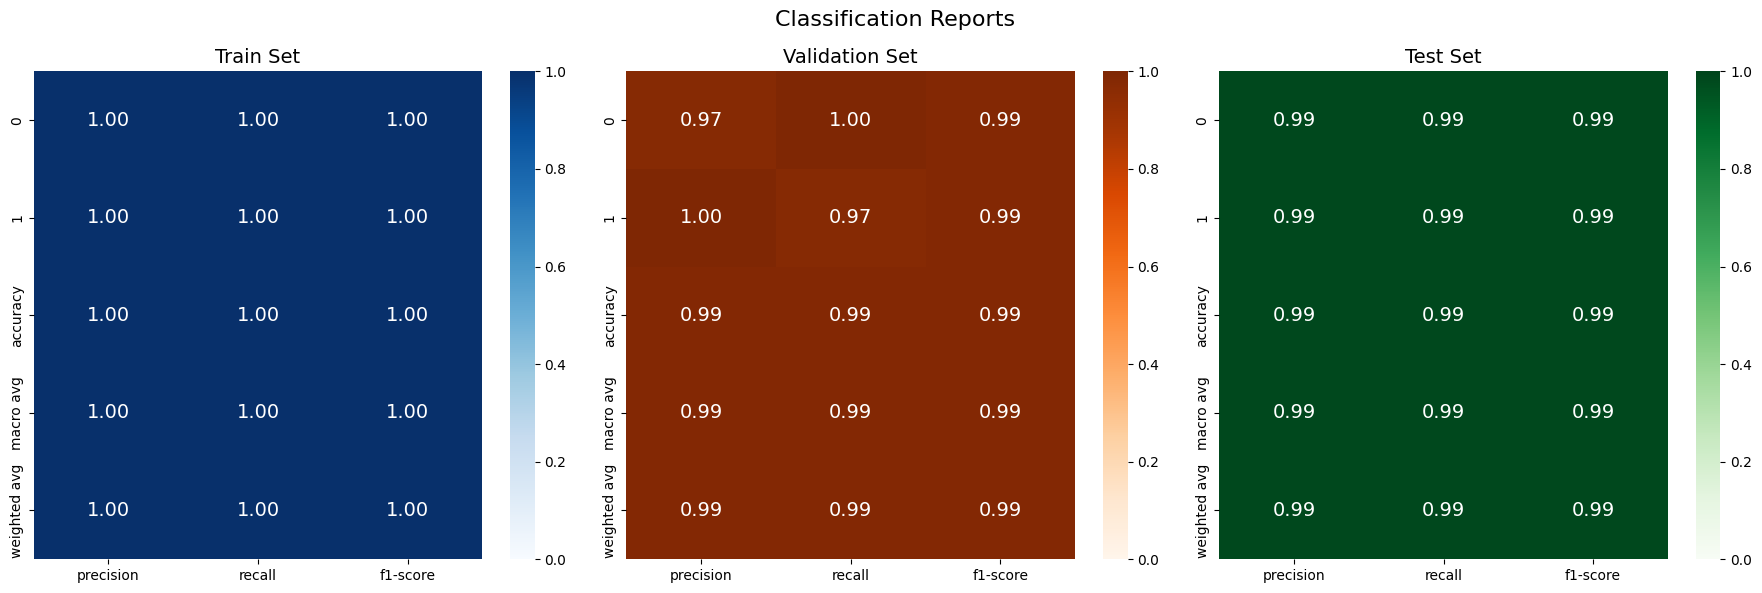

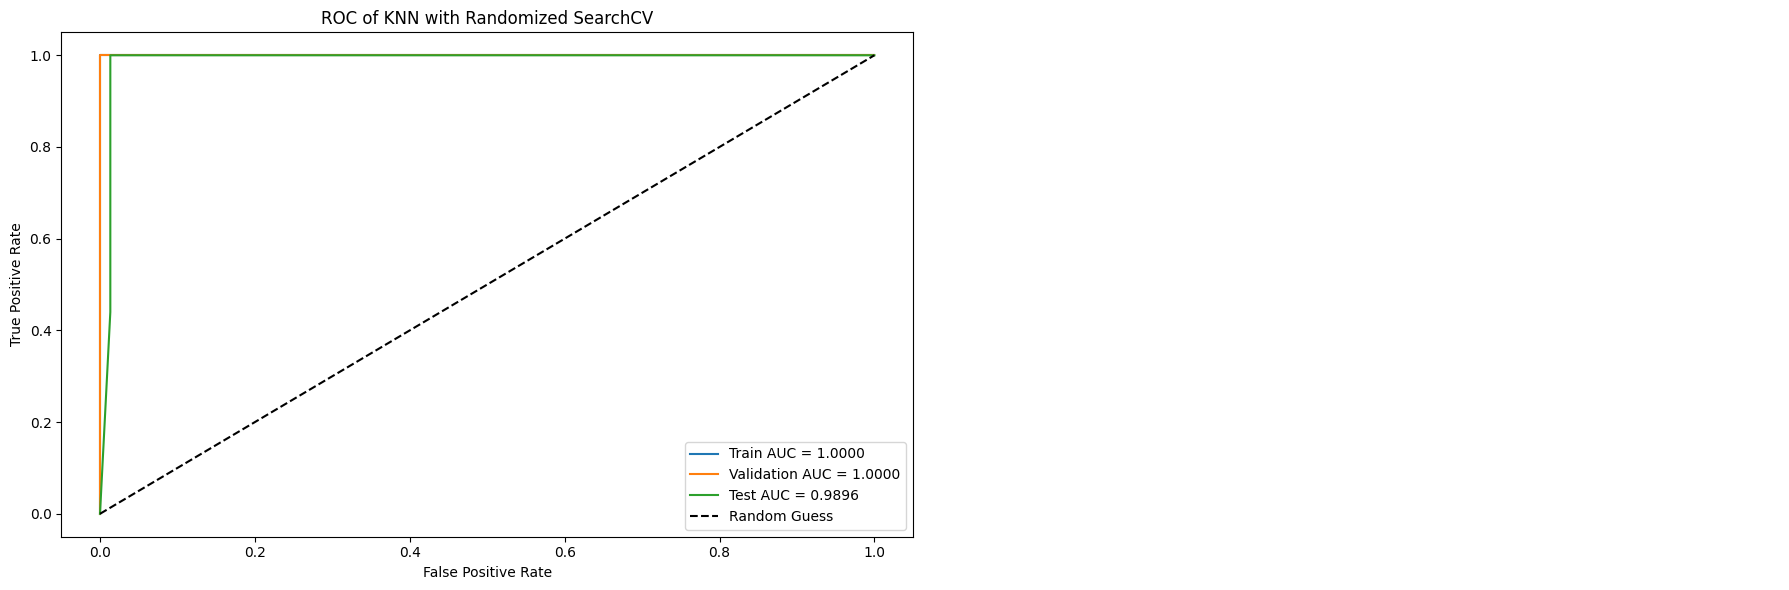

In [ ]:
# Predictions of Logistic Regression on test set with Randomized SearchCV
print("\nKNN Model with Randomized SearchCV")
rand_model_knn.fit(X_train, y_train)

# Best parameters and cross-validation score
print("\nBest parameters after tuning: ", rand_model_knn.best_params_)
print("Best cross-validation score: ", rand_model_knn.best_score_)

# Use the best estimator to make predictions
best_knn_model = rand_model_knn.best_estimator_

plot_confusion_matrices(best_knn_model, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(best_knn_model, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Use axes directly
plot_roc_curves(best_knn_model, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of KNN with Randomized SearchCV", ax=axes[0])
axes[1].axis('off')  # KNN does not have feature importances

plt.tight_layout()
plt.show()

## SVM

In [ ]:
# Define the base model
svc = SVC(probability=True, random_state=42)

# Define parameter grid
param_rand_svc = {
    'C': [0.1, 1, 10], # Regularization strength
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Type of kernel
    'degree': [2, 3, 4], # For poly kernel only
    'gamma': ['scale', 'auto', 0.01, 0.1]  # Kernel coefficient
}

# Create RandomizedSearchCV
rand_model_svc = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_rand_svc,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

### - Base Model -


SVM Model without Randomized SearchCV


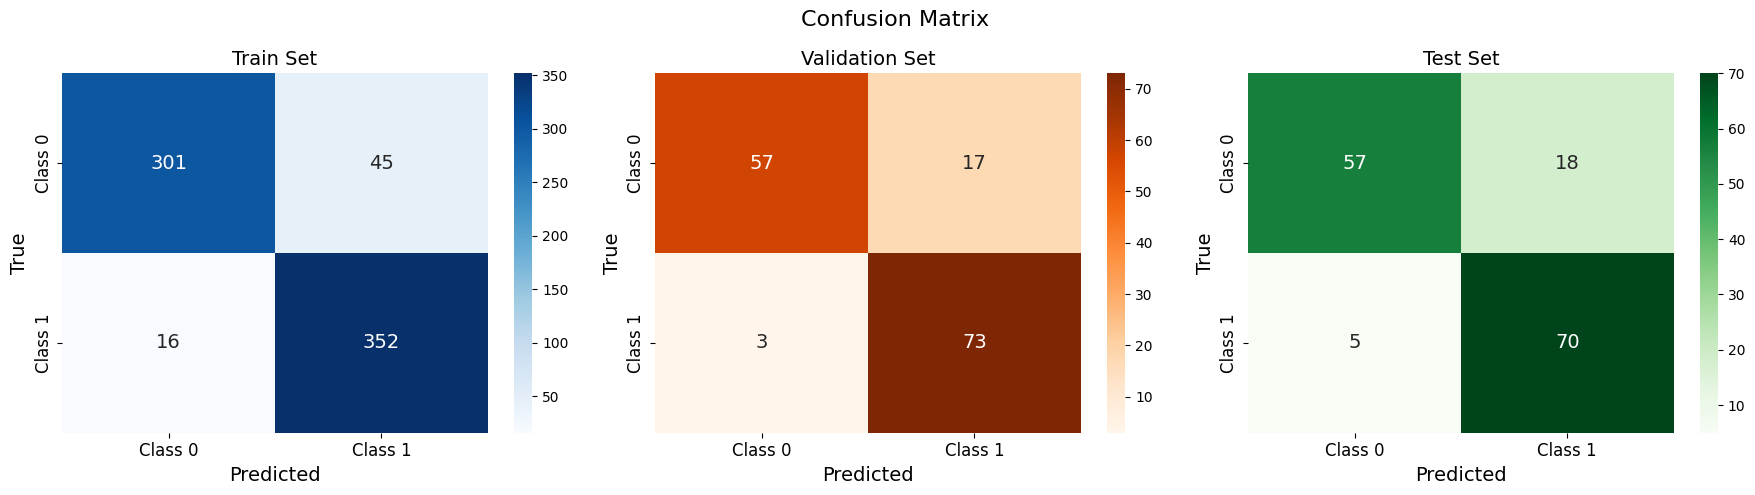

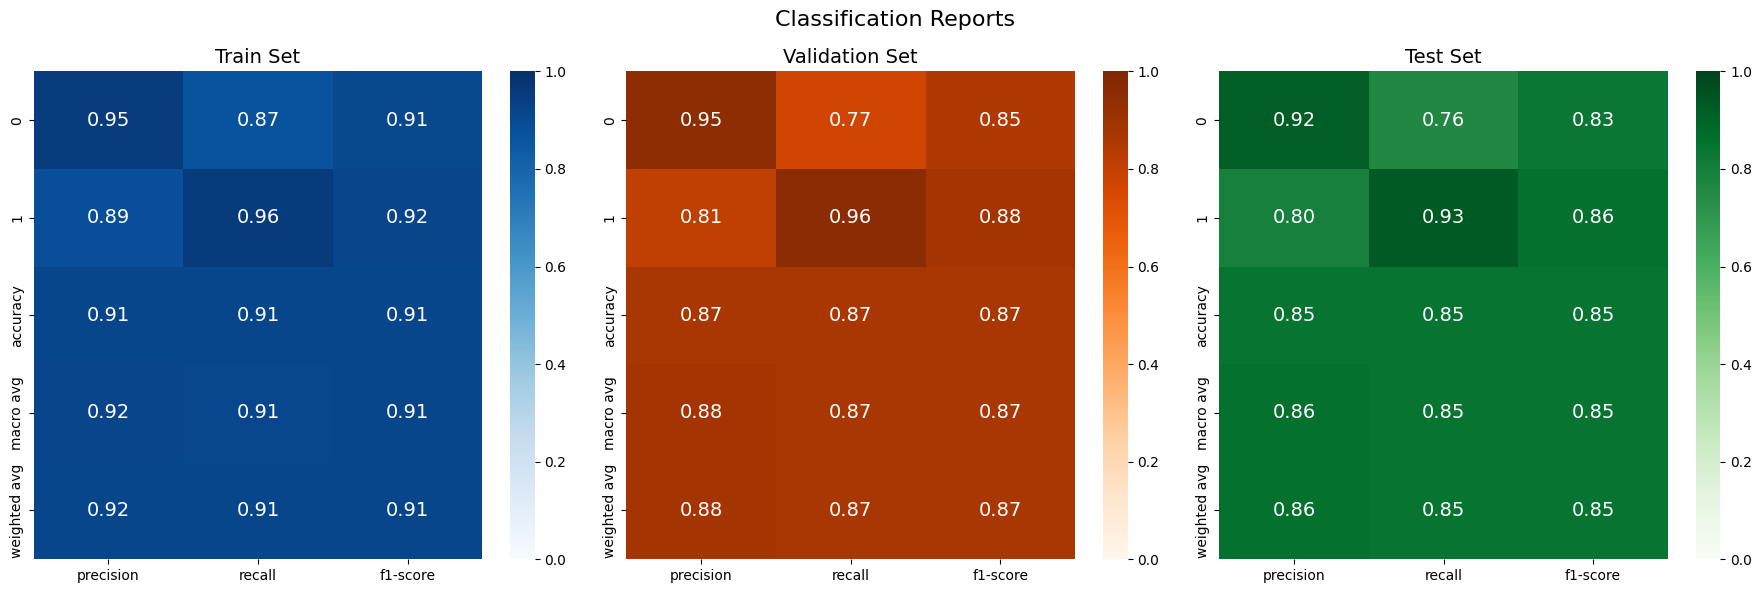

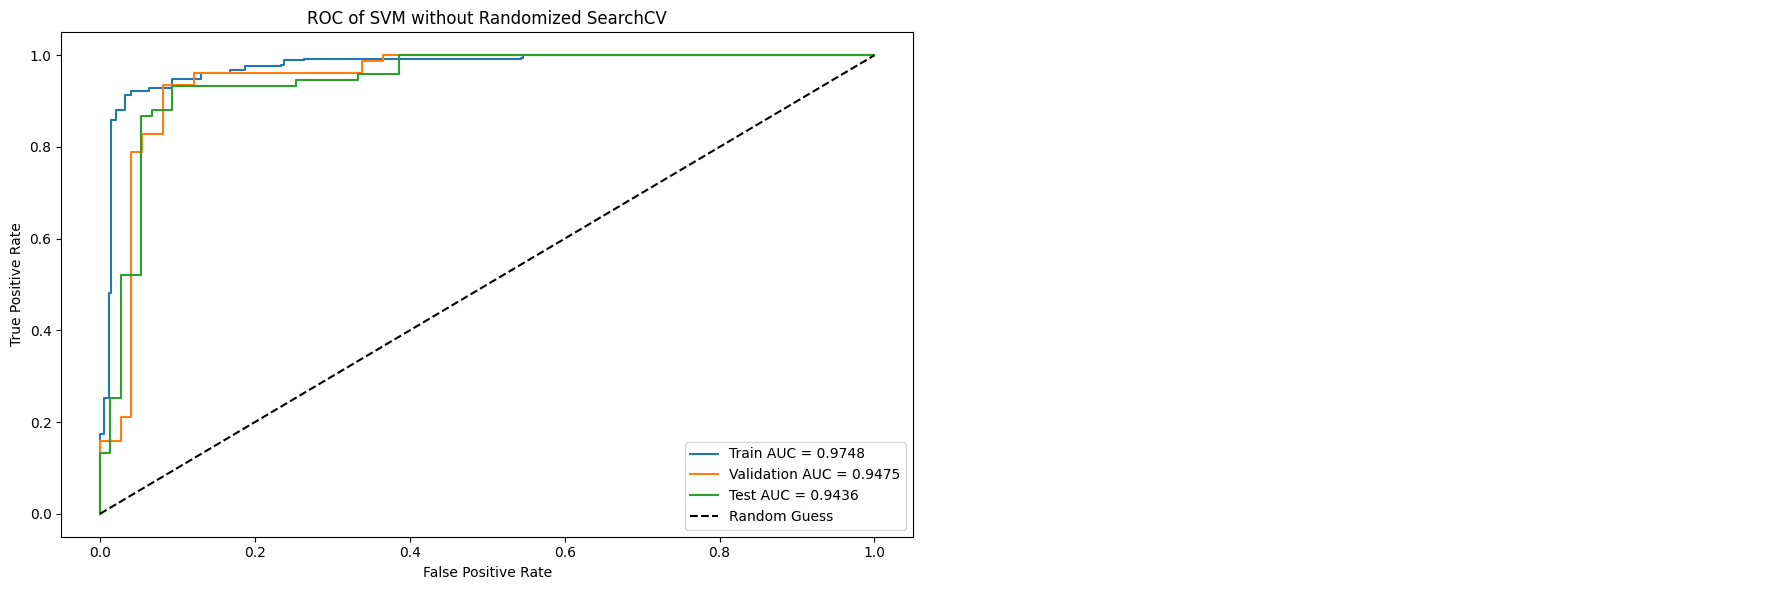

In [ ]:
print("\nSVM Model without Randomized SearchCV")
svc.fit(X_train, y_train)  # Train on the training set

plot_confusion_matrices(svc, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(svc, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(svc, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of SVM without Randomized SearchCV", ax=axes[0])
axes[1].axis('off')

plt.tight_layout()
plt.show()

#### - Hyperparameter Tuning with Randomized SearchCV -


SVM Model with Randomized SearchCV
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters after tuning:  {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 10}
Best cross-validation score:  0.9818677539106366


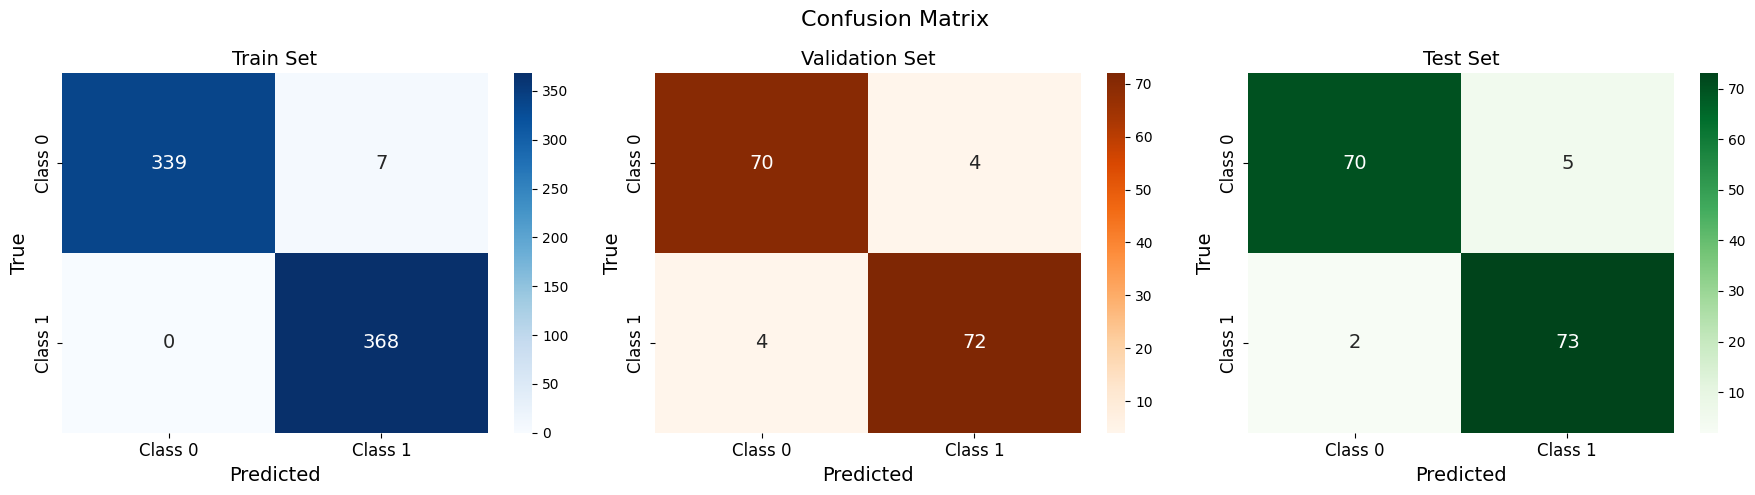

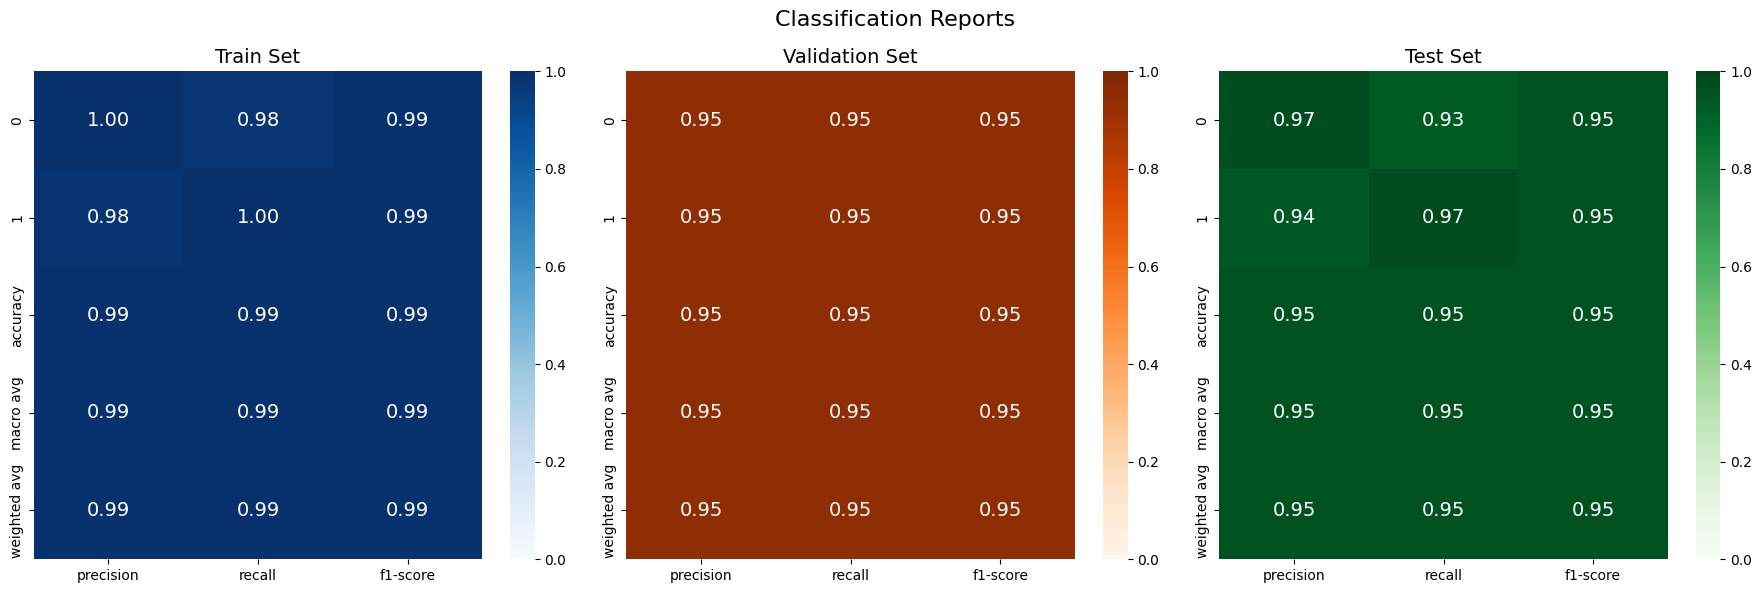

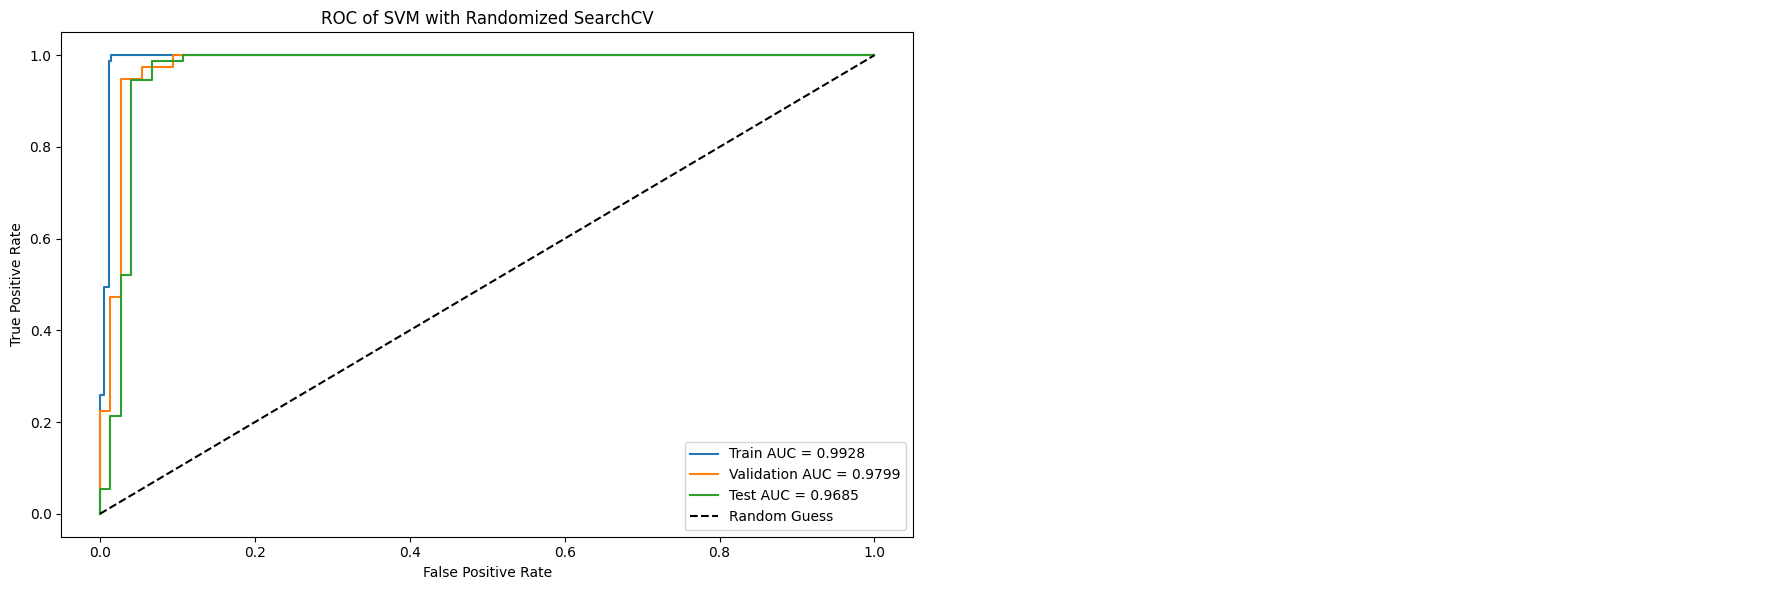

In [ ]:
# Predictions of SVM on test set with Randomized SearchCV
print("\nSVM Model with Randomized SearchCV")
rand_model_svc.fit(X_train, y_train)

# Best parameters and cross-validation score
print("\nBest parameters after tuning: ", rand_model_svc.best_params_)
print("Best cross-validation score: ", rand_model_svc.best_score_)

# Use the best estimator to make predictions
best_svc_model = rand_model_svc.best_estimator_

plot_confusion_matrices(best_svc_model, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(best_svc_model, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(best_svc_model, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of SVM with Randomized SearchCV", ax=axes[0])
axes[1].axis('off')  # SVM does not have feature importances

plt.tight_layout()
plt.show()

## Logistic Regression

In [ ]:
# Initialize Logistic Regression
lg = LogisticRegression(random_state=42)

# Defining the parameter grid
param_rand_lg = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': uniform(0.01, 10),  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers that support l1 and elasticnet
    'max_iter': [100, 500, 1000]
}

# Setting up the RandomizedSearchCV
rand_model_lg = RandomizedSearchCV(
    estimator=lg,
    param_distributions=param_rand_lg,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    verbose=2,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

#### - Base Model -


Logistic Regression Model without Randomized SearchCV


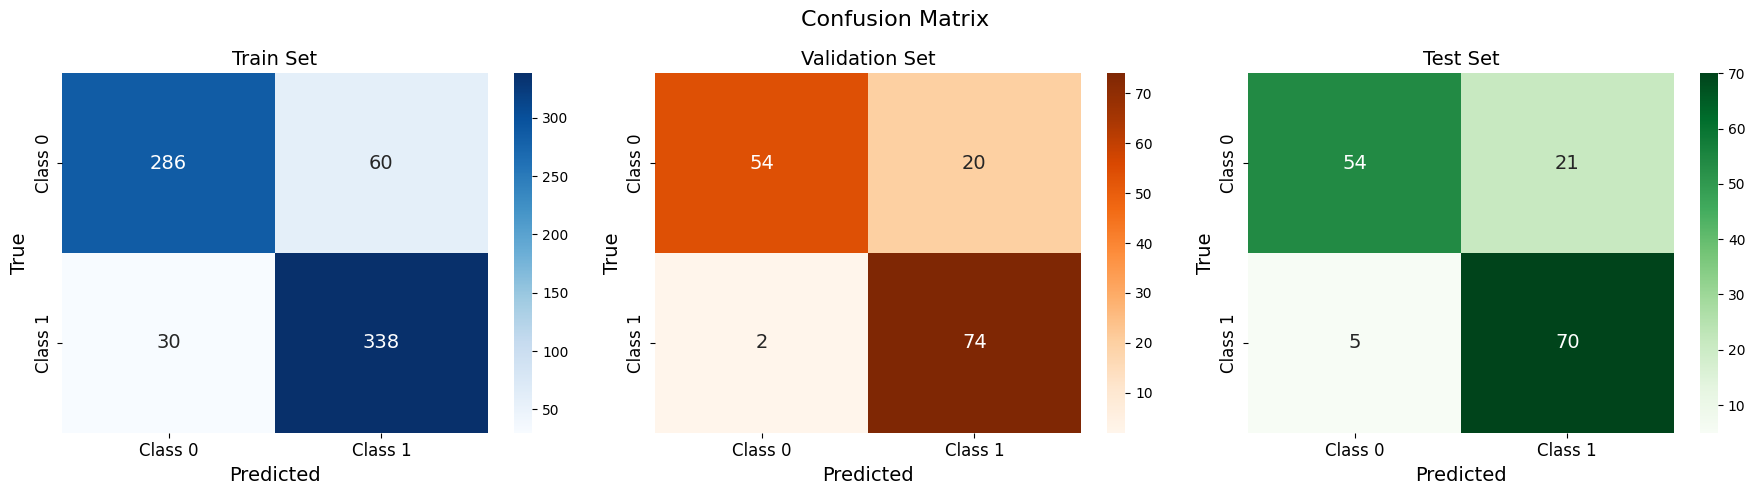

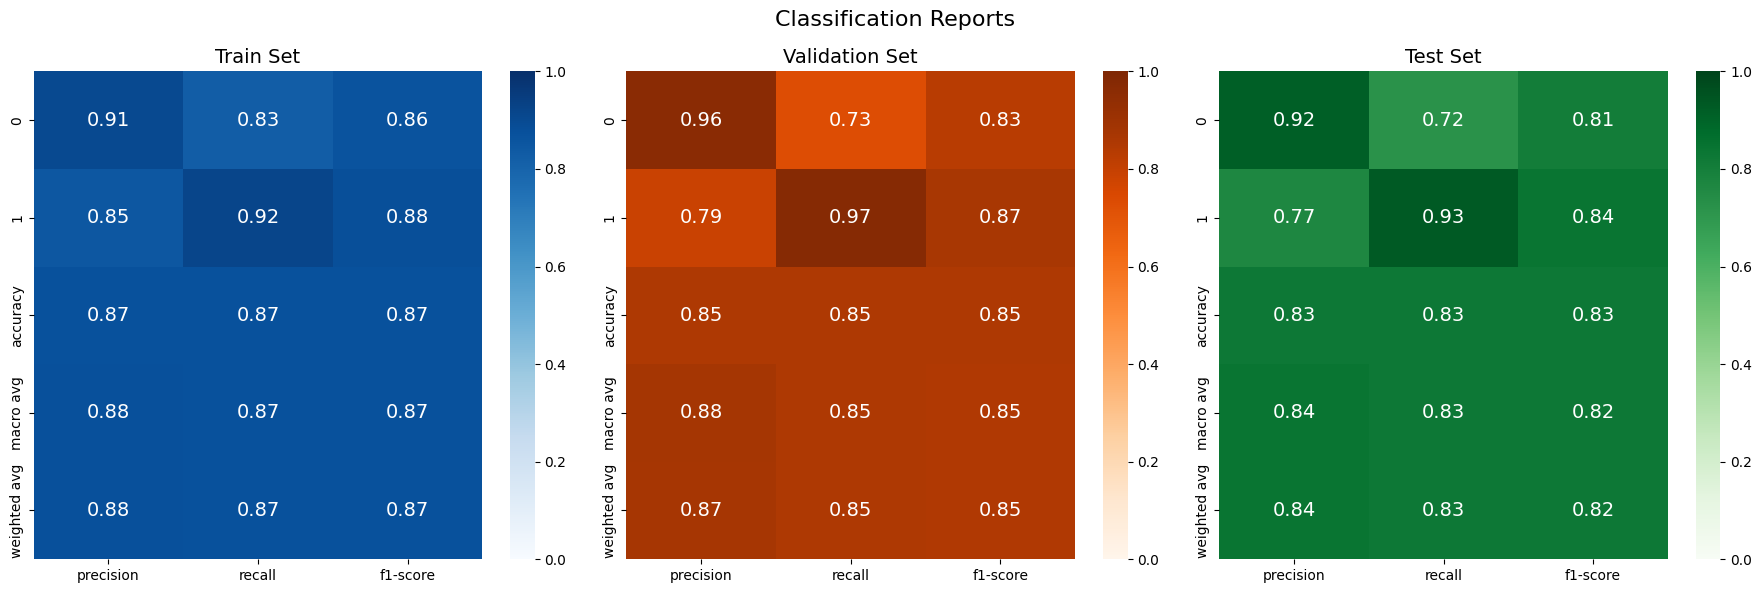

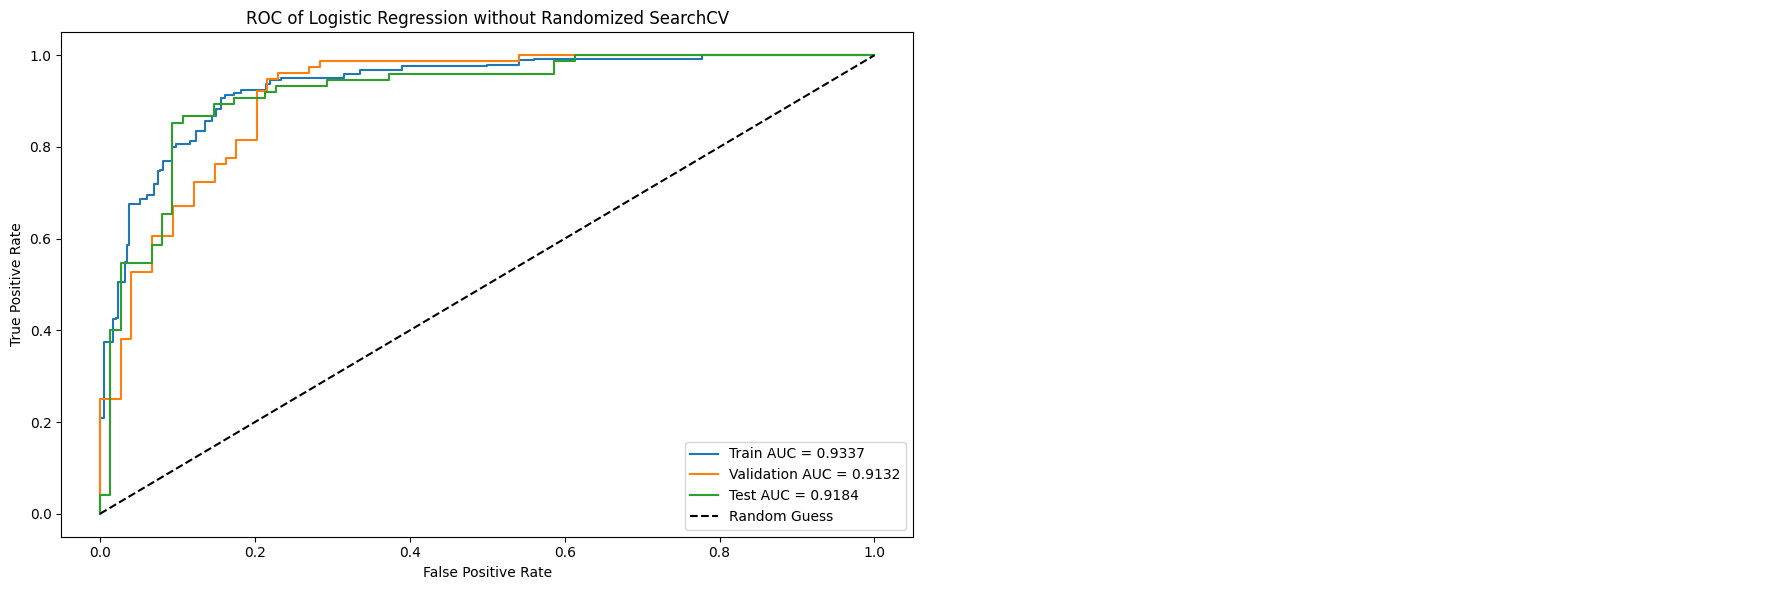

In [ ]:
# Fit the Logistic Regression model
print("\nLogistic Regression Model without Randomized SearchCV")
lg.fit(X_train, y_train)

# Confusion Matrix for validation set
plot_confusion_matrices(lg, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(lg, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(lg, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of Logistic Regression without Randomized SearchCV", ax=axes[0])
# Logistic Regression does not have feature importances, so skip the feature importance plot
axes[1].axis('off')  # Disable the second subplot

plt.tight_layout()
plt.show()

#### - Hyperparameter Tuning with Randomized SearchCV -


Logistic Regression Model with Randomized SearchCV
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters after tuning:  {'C': np.float64(1.8282496720710062), 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score:  0.9281628075791268


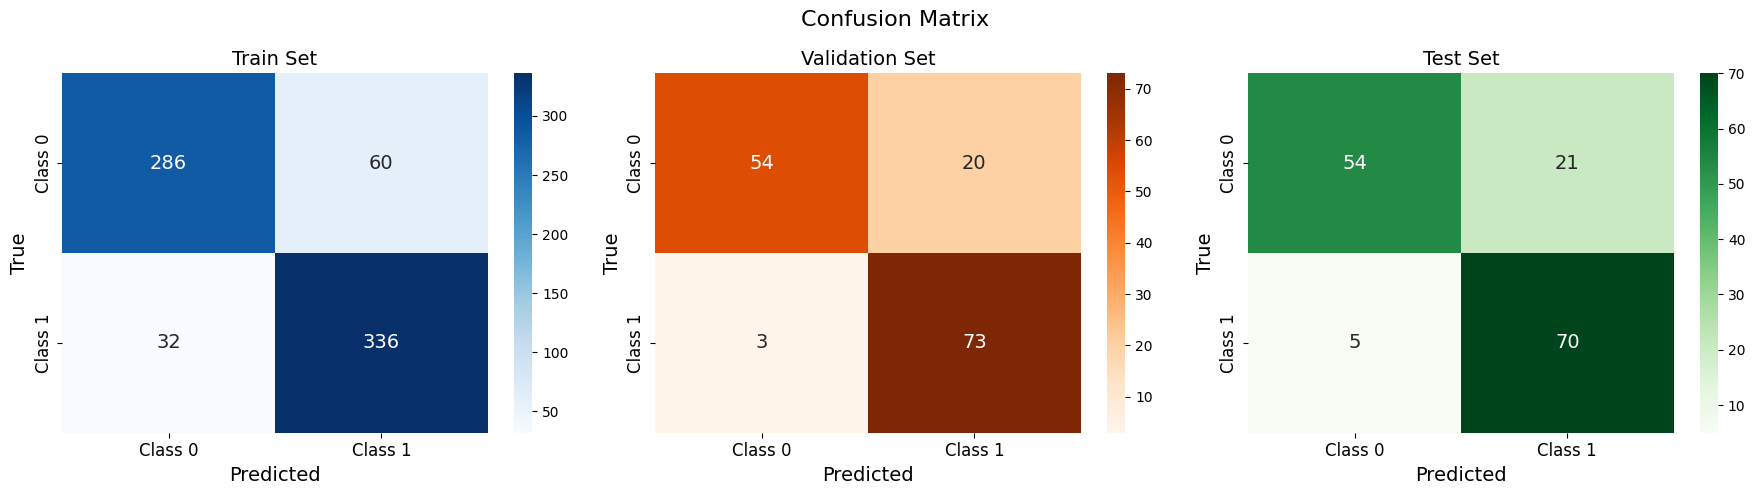

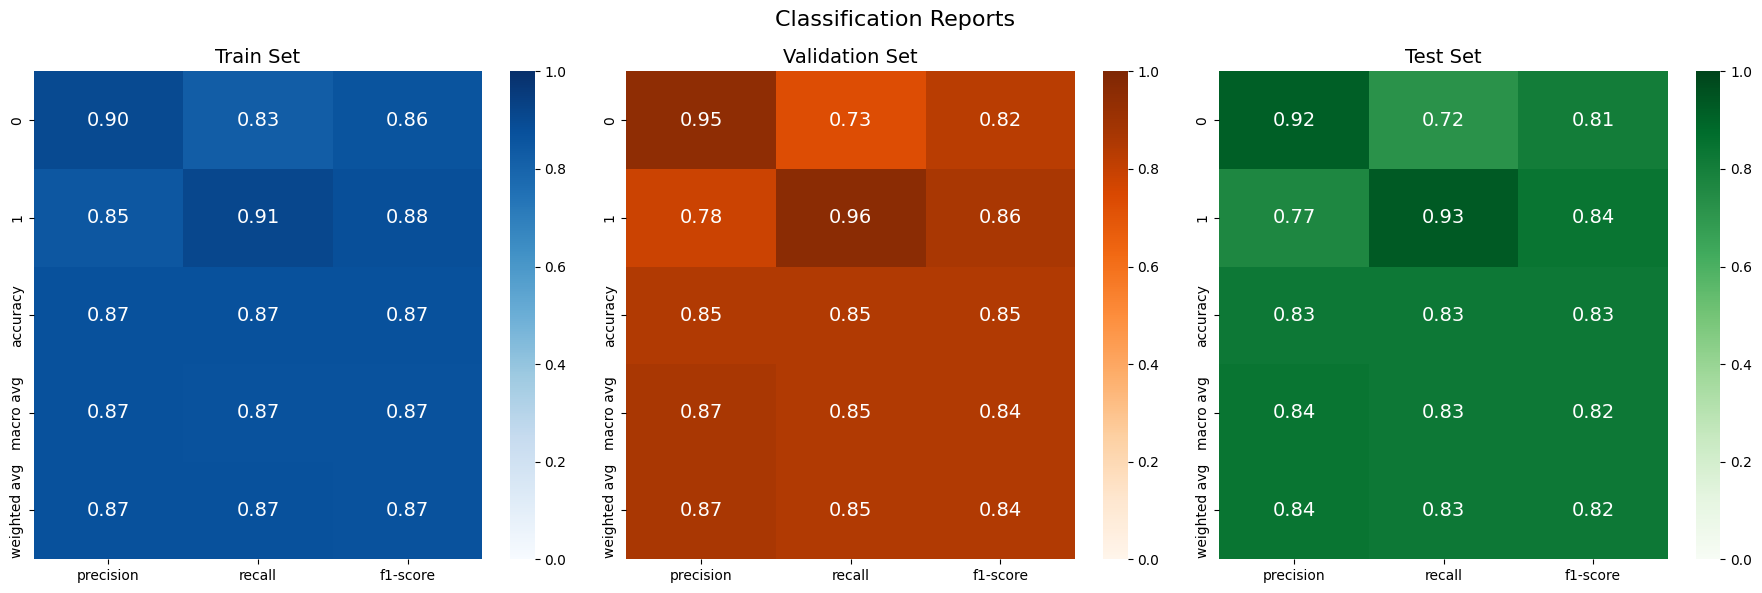

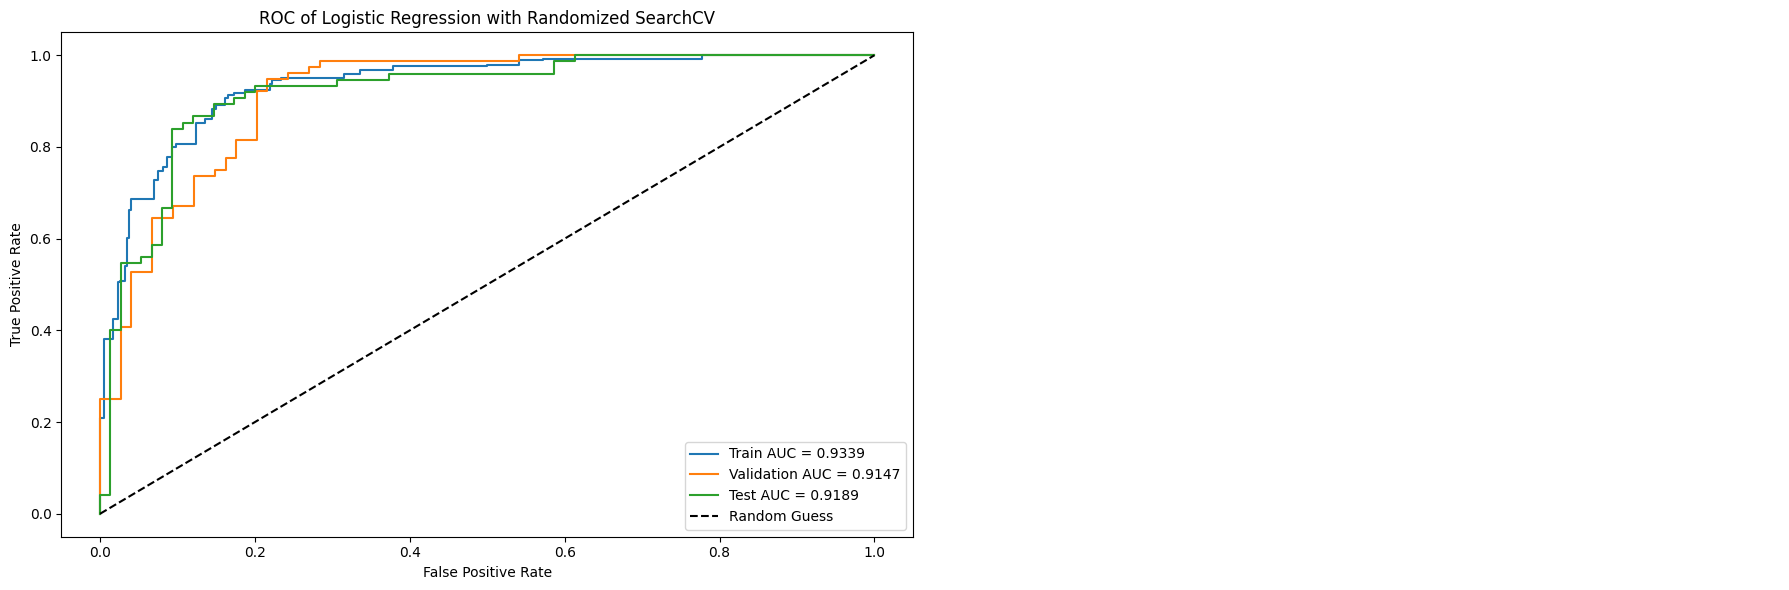

In [ ]:
# Predictions of Logistic Regression on test set with Randomized SearchCV
print("\nLogistic Regression Model with Randomized SearchCV")
rand_model_lg.fit(X_train, y_train)

# Best parameters and cross-validation score
print("\nBest parameters after tuning: ", rand_model_lg.best_params_)
print("Best cross-validation score: ", rand_model_lg.best_score_)

# Use the best estimator to make predictions
best_lg_model = rand_model_lg.best_estimator_

plot_confusion_matrices(best_lg_model, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(best_lg_model, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(best_lg_model, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of Logistic Regression with Randomized SearchCV", ax=axes[0])
axes[1].axis('off')  # Logistic Regression does not have feature importances

plt.tight_layout()
plt.show()

## Naive Bayes

In [ ]:
# Initialize Gaussian Naive Bayes
nb = GaussianNB()

# Defining the parameter grid for Naive Bayes (note that Naive Bayes has fewer hyperparameters)
param_rand_nb = {
    'var_smoothing': uniform(1e-9, 1e-7)  # The only parameter for GaussianNB
}

# Setting up the RandomizedSearchCV
rand_model_nb = RandomizedSearchCV(
    estimator=nb,
    param_distributions=param_rand_nb,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    verbose=2,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

#### - Base Model -

Naive Bayes Model without Randomized SearchCV


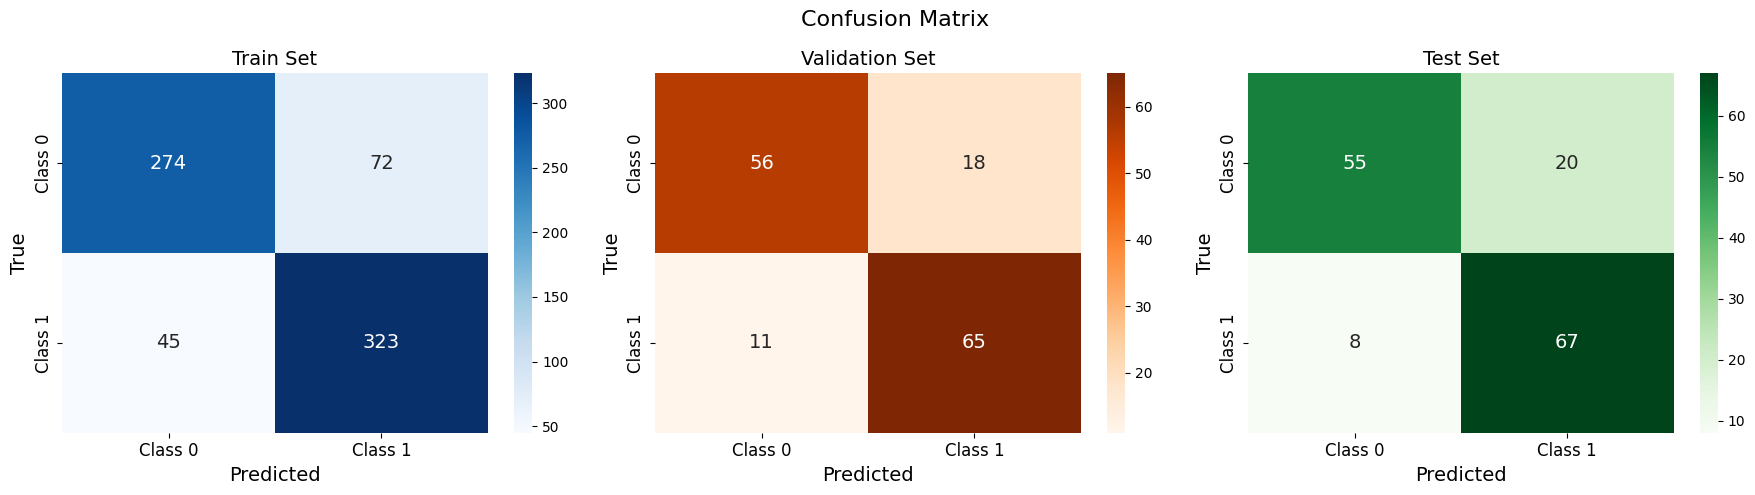

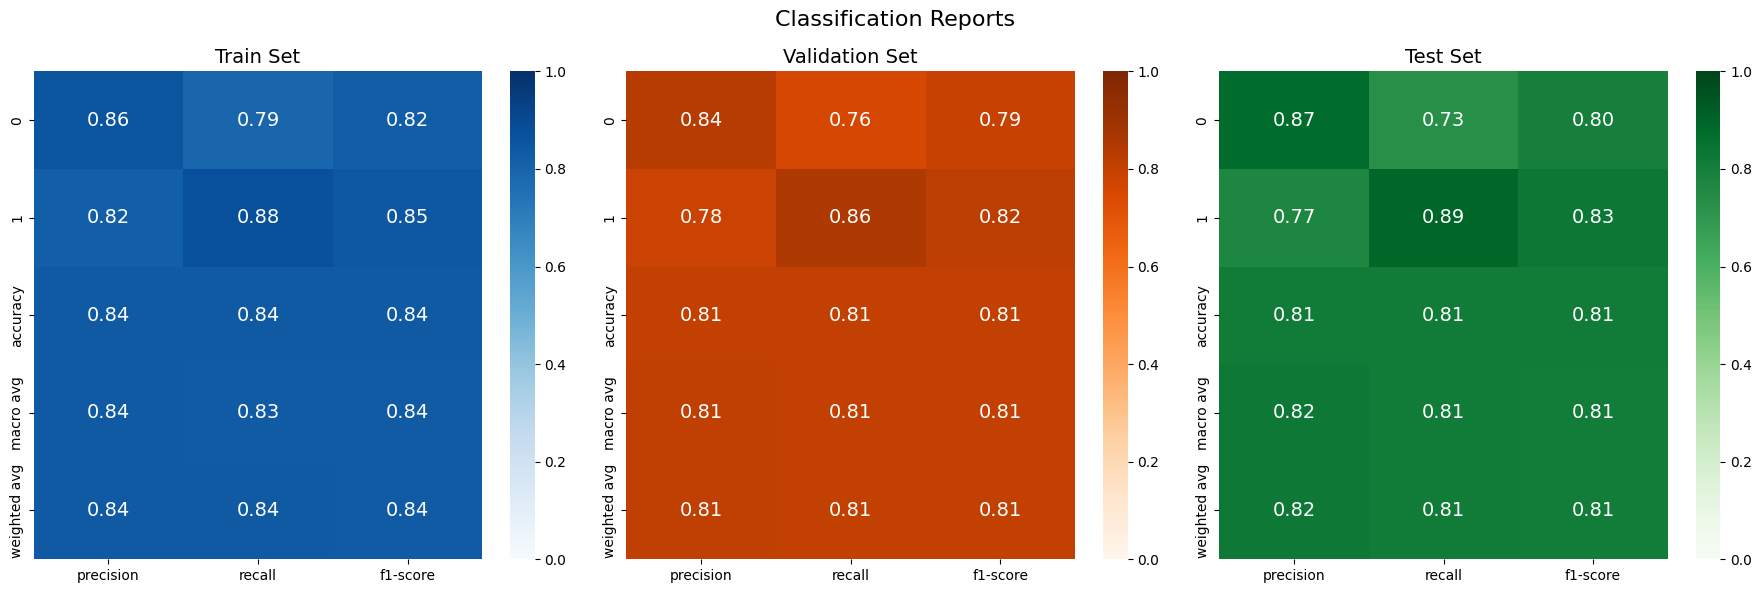

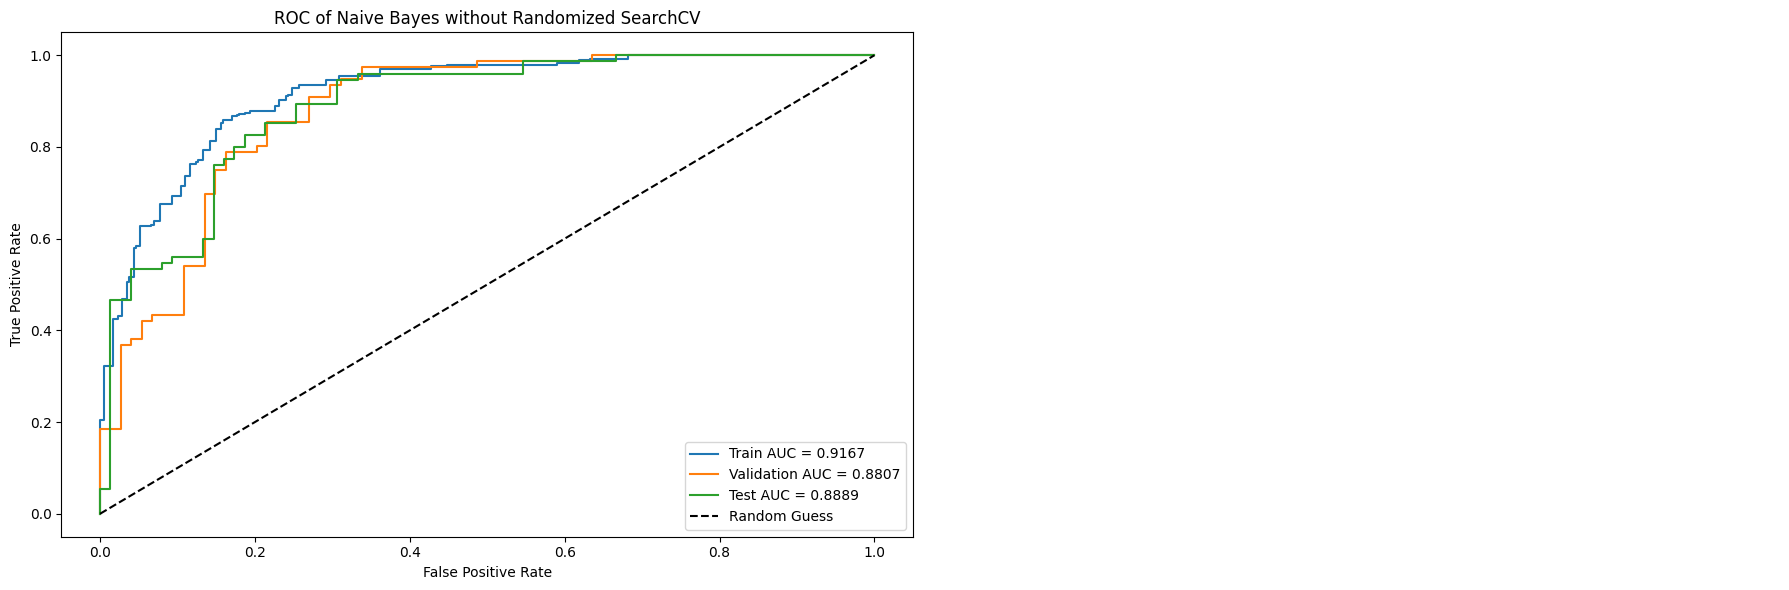

In [ ]:
# Fit the Naive Bayes model without Randomized SearchCV
print("Naive Bayes Model without Randomized SearchCV")
nb.fit(X_train, y_train)

# Confusion Matrix for validation set
plot_confusion_matrices(nb, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(nb, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(nb, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of Naive Bayes without Randomized SearchCV", ax=axes[0])
# Logistic Regression does not have feature importances, so skip the feature importance plot
axes[1].axis('off')  # Disable the second subplot

plt.tight_layout()
plt.show()

#### - Hyperparameter Tuning with Randomized SearchCV -


Naive Bayes Model with Randomized SearchCV
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters after tuning:  {'var_smoothing': np.float64(3.845401188473625e-08)}
Best cross-validation score:  0.9128275625238104


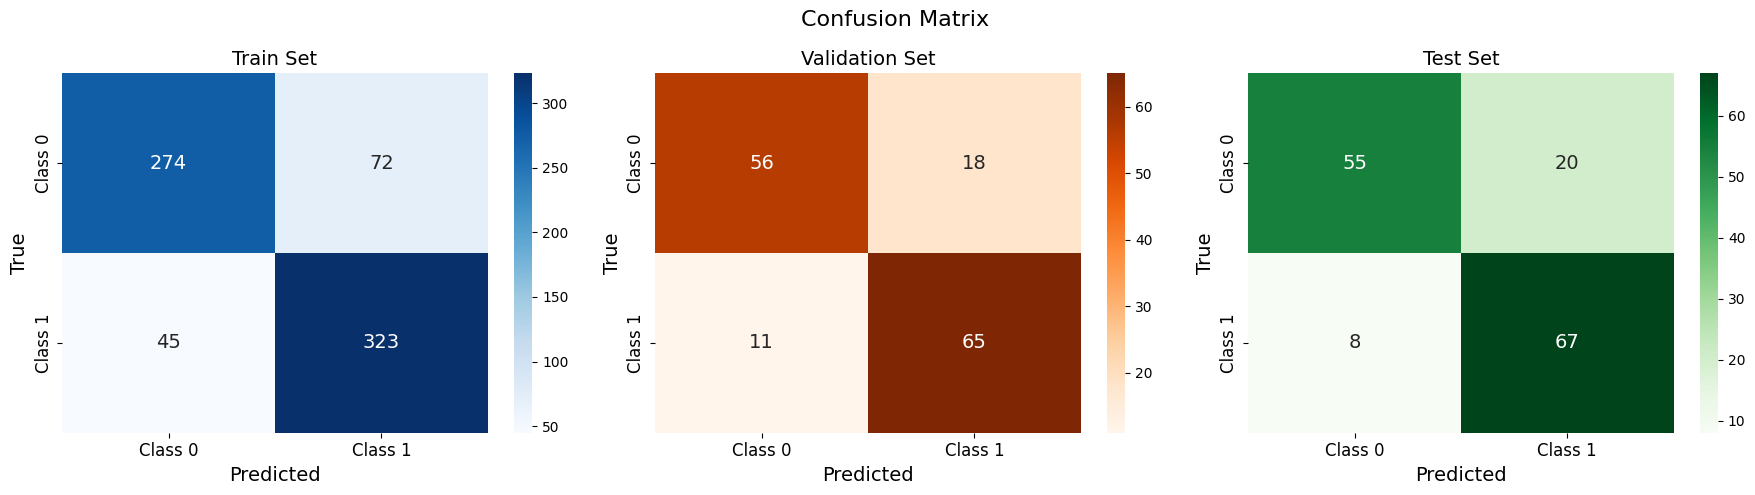

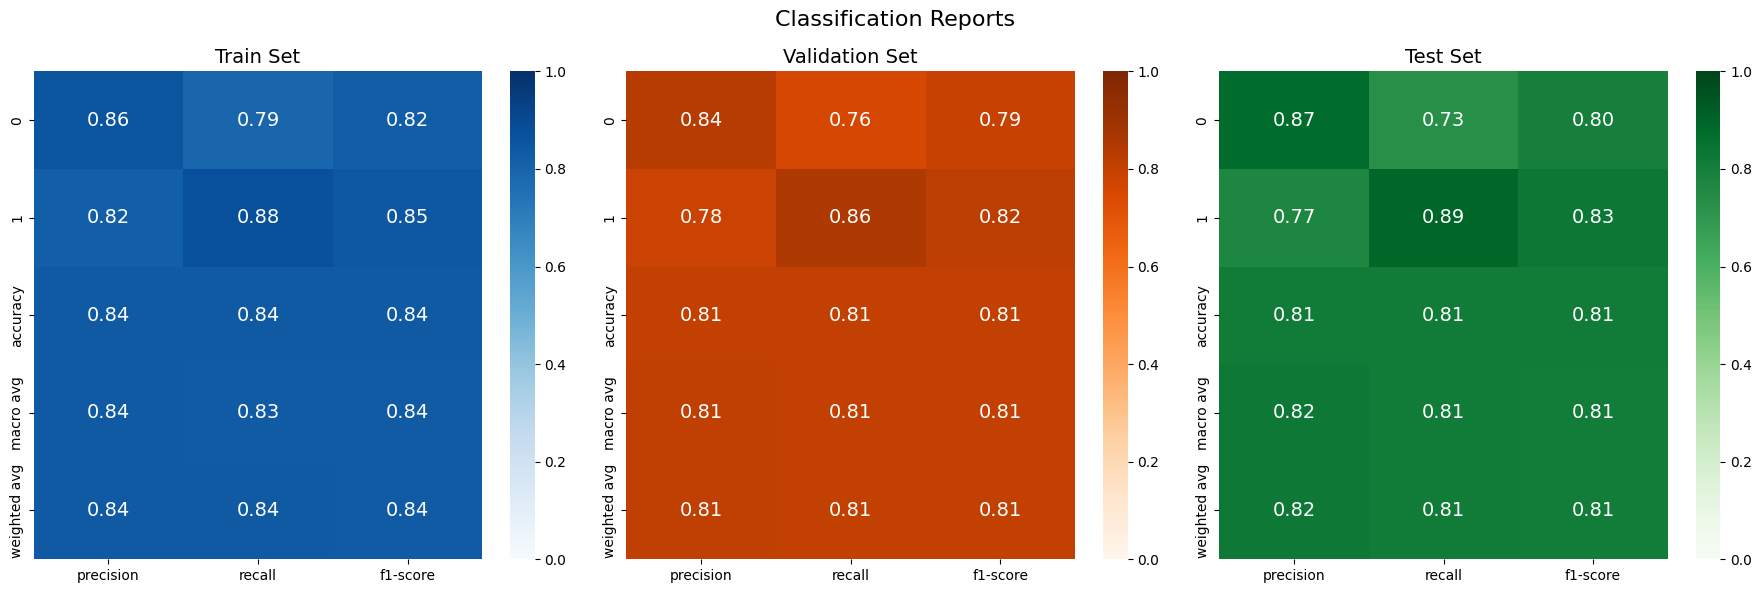

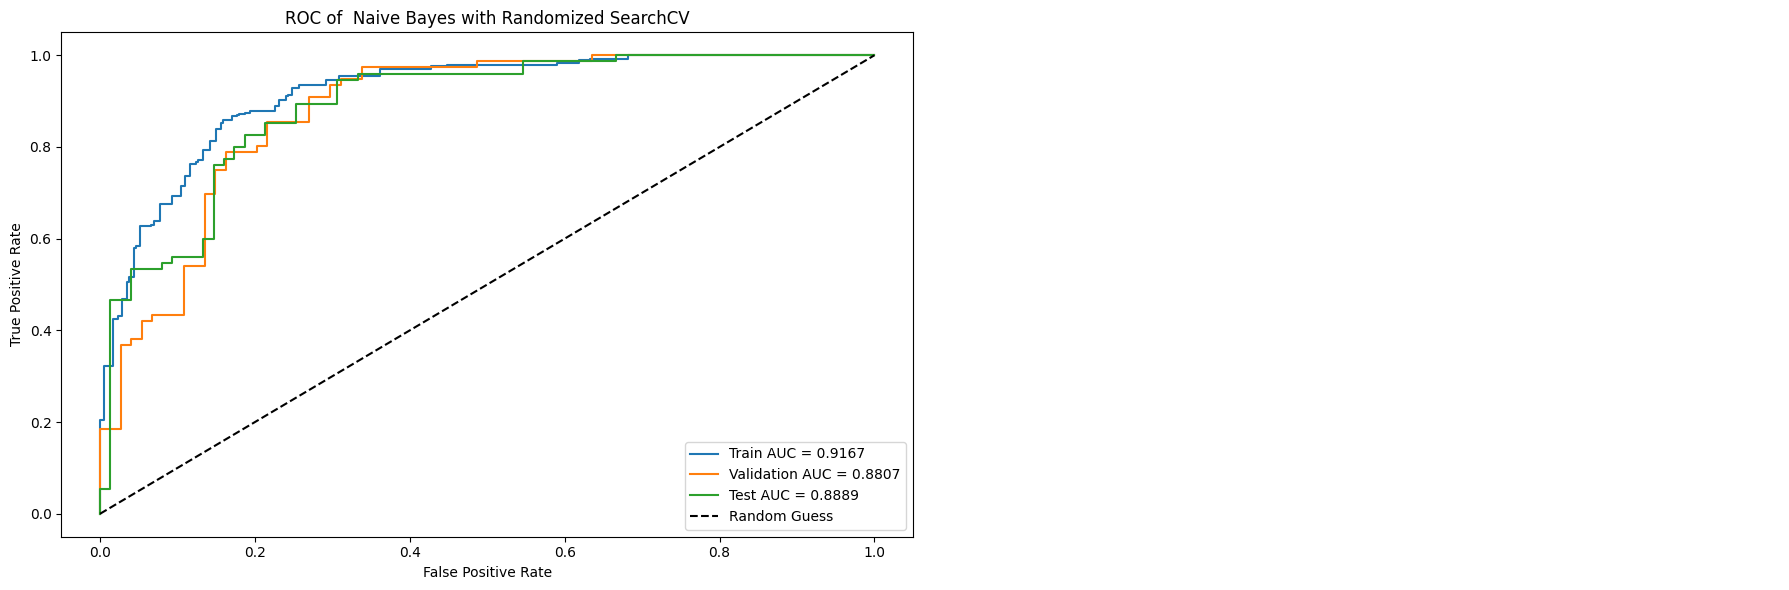

In [ ]:
# Predictions of Naive on test set with Randomized SearchCV
print("\nNaive Bayes Model with Randomized SearchCV")
rand_model_nb.fit(X_train, y_train)

# Best parameters and cross-validation score
print("\nBest parameters after tuning: ", rand_model_nb.best_params_)
print("Best cross-validation score: ", rand_model_nb.best_score_)

# Use the best estimator to make predictions
best_nb_model = rand_model_nb.best_estimator_

plot_confusion_matrices(best_nb_model, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(best_nb_model, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(best_nb_model, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of  Naive Bayes with Randomized SearchCV", ax=axes[0])
axes[1].axis('off')  # Naive does not have feature importances

plt.tight_layout()
plt.show()

## Neural Network

In [ ]:
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Define the parameter distribution for randomized search
param_rand_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (150, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],  # Fixed: wrapped in a list
    'alpha': uniform(0.0001, 0.01),
    'learning_rate': ['constant', 'adaptive'],
    'early_stopping': [True, False],
}

# Set up RandomizedSearchCV
rand_model_mlp = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_rand_mlp,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    verbose=2,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1  # Use all available cores
)

#### - Base Model -

Neural Network Model without Randomized SearchCV


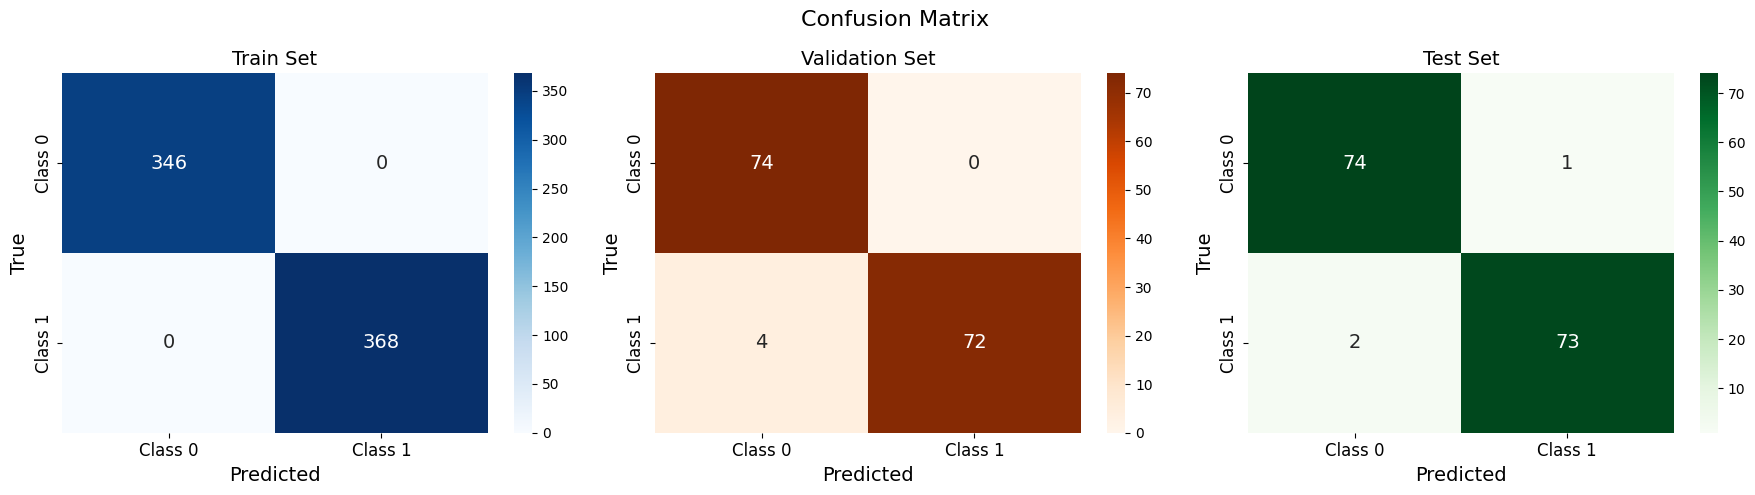

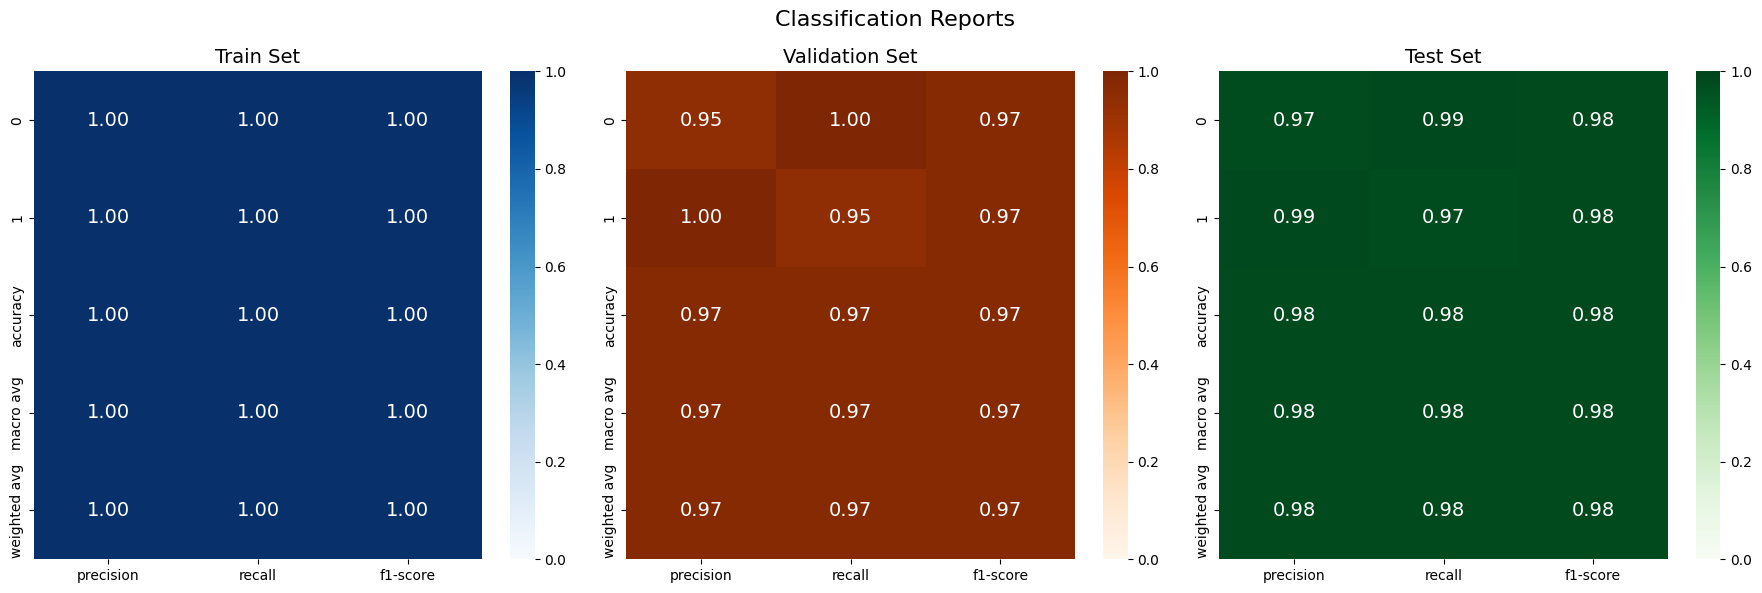

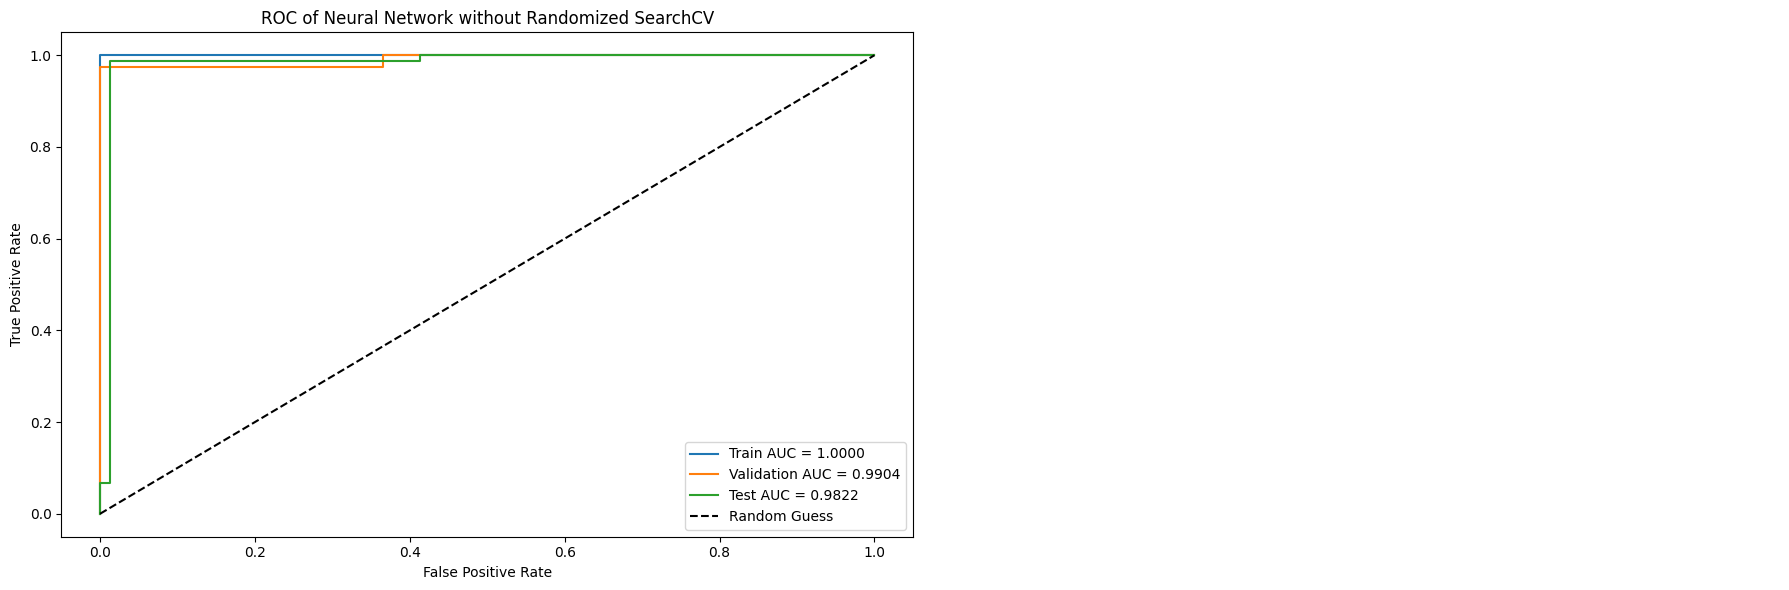

In [ ]:
# Fit the Neural Network model without Randomized SearchCV
print("Neural Network Model without Randomized SearchCV")
mlp.fit(X_train, y_train)

# Confusion Matrix for validation set
plot_confusion_matrices(mlp, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(mlp, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(mlp, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of Neural Network without Randomized SearchCV", ax=axes[0])
axes[1].axis('off')  # Neural Network does not have feature importances

plt.tight_layout()
plt.show()

#### - Hyperparameter Tuning with Randomized SearchCV -


Neural Network Model with Randomized SearchCV
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters after tuning:  {'activation': 'relu', 'alpha': np.float64(0.009363008785133489), 'early_stopping': False, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best cross-validation score:  0.9864869157424249


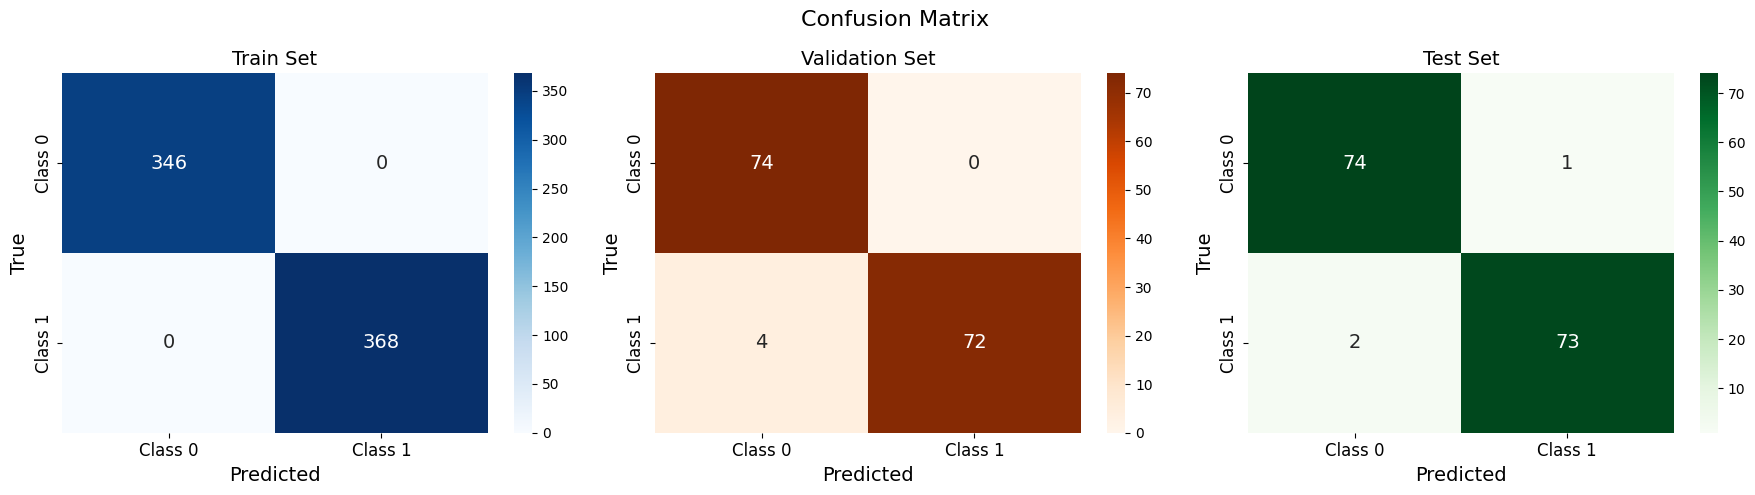

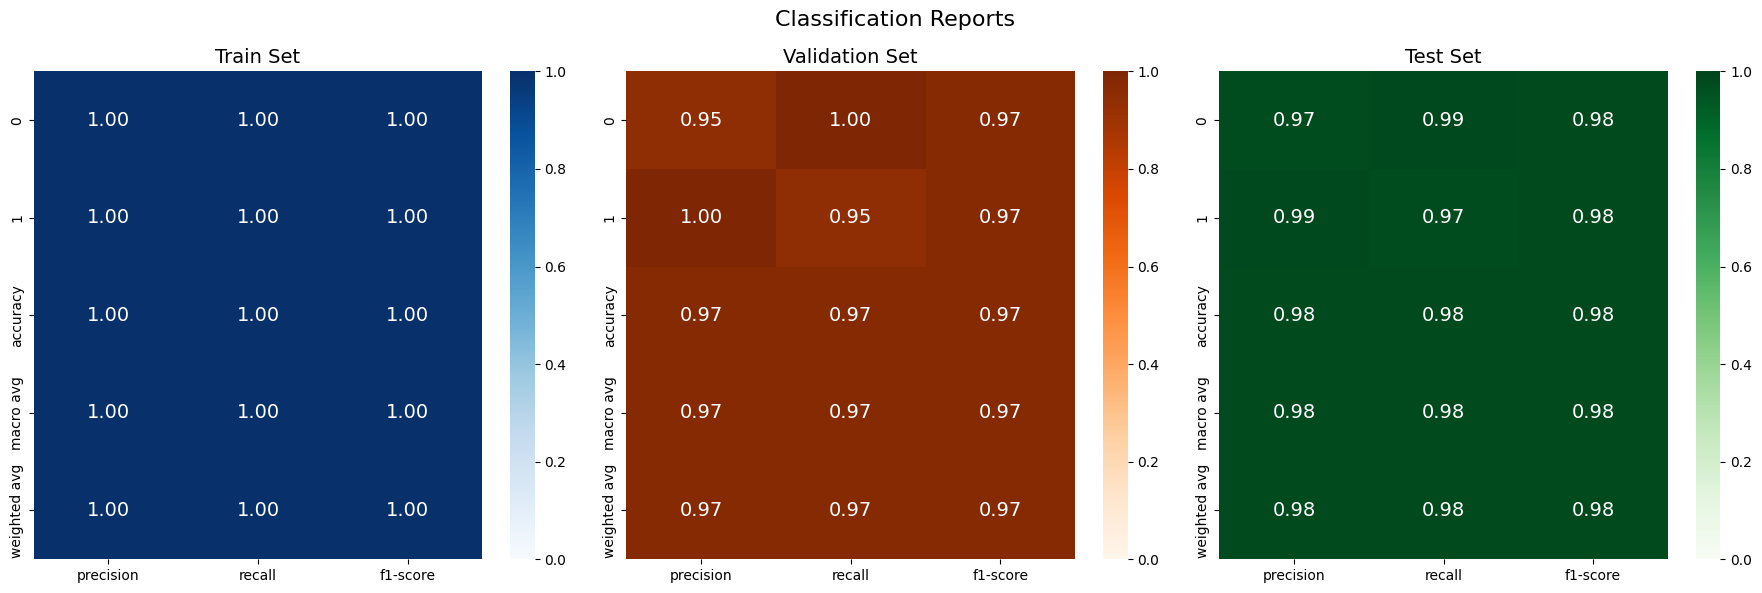

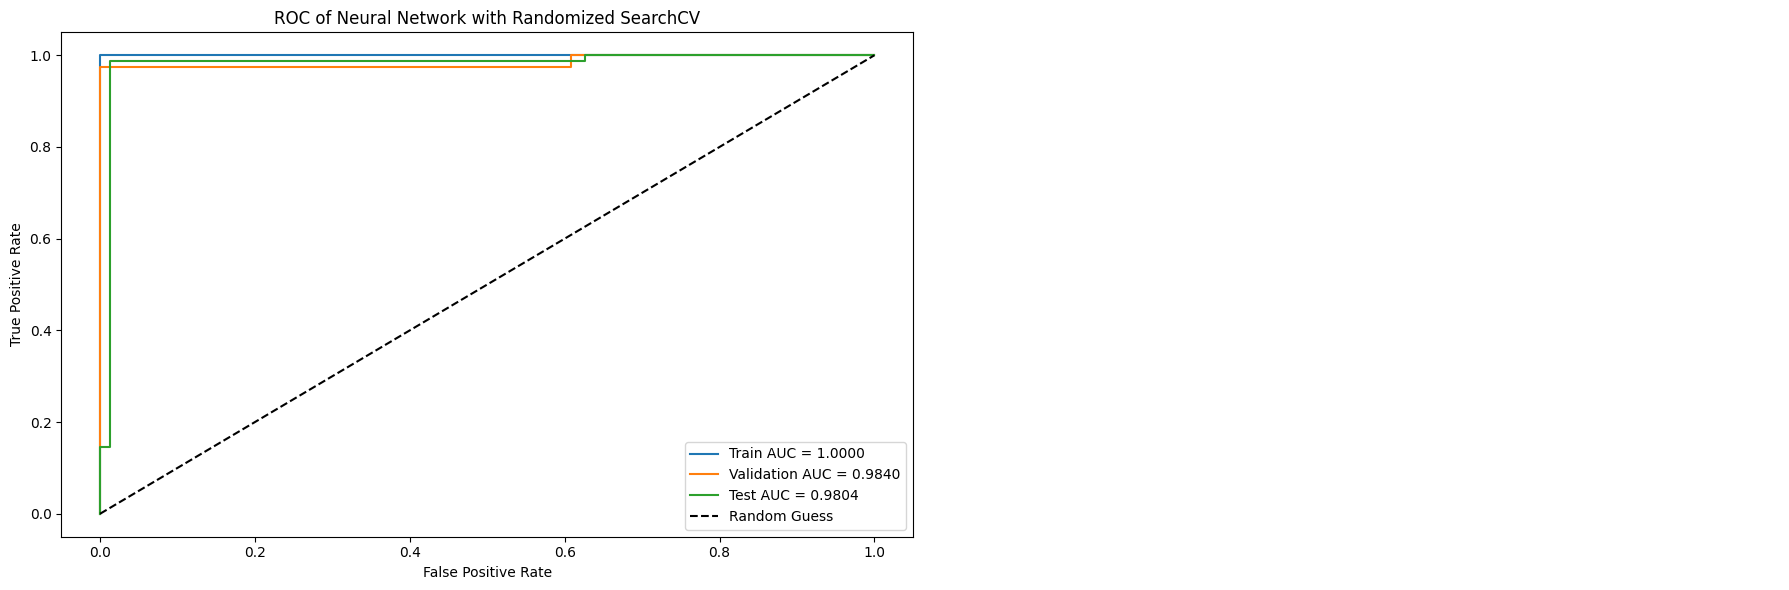

In [ ]:
# Predictions of Neural Network Model on test set with Randomized SearchCV
print("\nNeural Network Model with Randomized SearchCV")
rand_model_mlp.fit(X_train, y_train)

# Best parameters and cross-validation score
print("\nBest parameters after tuning: ", rand_model_mlp.best_params_)
print("Best cross-validation score: ", rand_model_mlp.best_score_)

# Use the best estimator to make predictions
best_mlp_model = rand_model_mlp.best_estimator_

plot_confusion_matrices(best_mlp_model, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(best_mlp_model, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(best_mlp_model, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of Neural Network with Randomized SearchCV", ax=axes[0])
axes[1].axis('off')  # Neural Network does not have feature importances

plt.tight_layout()
plt.show()

## Decision Tree

In [ ]:
# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Defining the parameter grid
param_rand_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Setting up the RandomizedSearchCV
rand_model_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_rand_dt,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    verbose=2,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

#### - Base Model -

Decision Tree Model without Randomized SearchCV


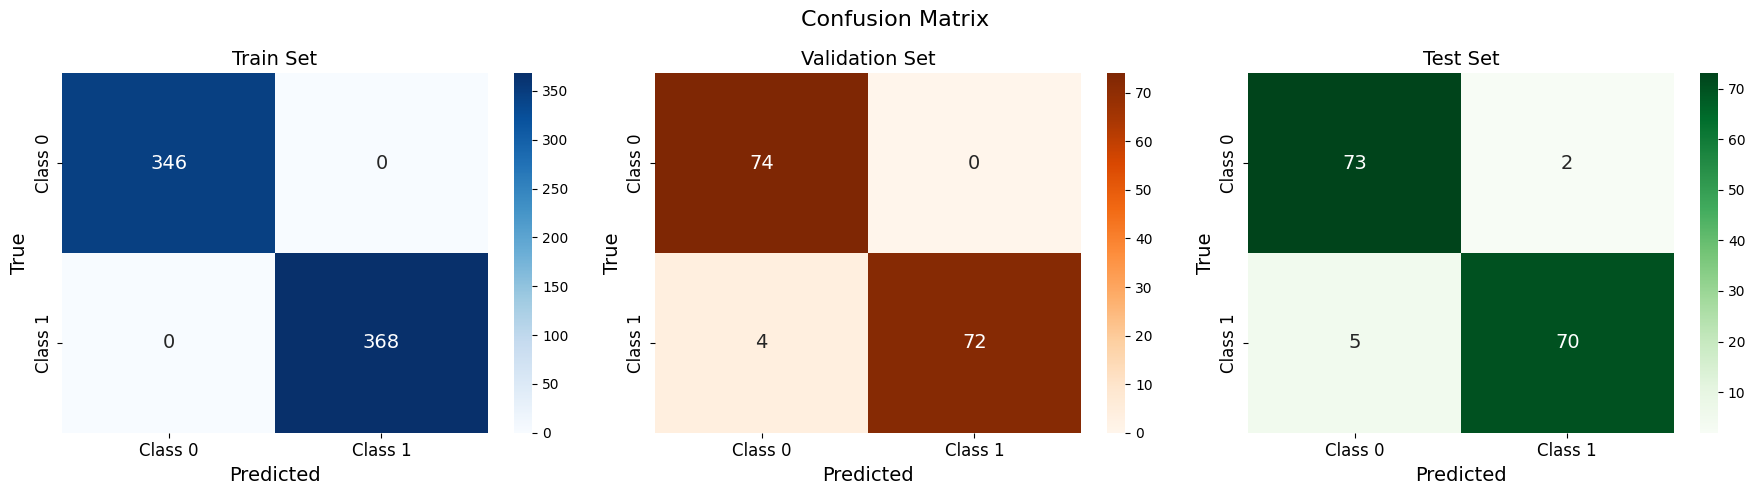

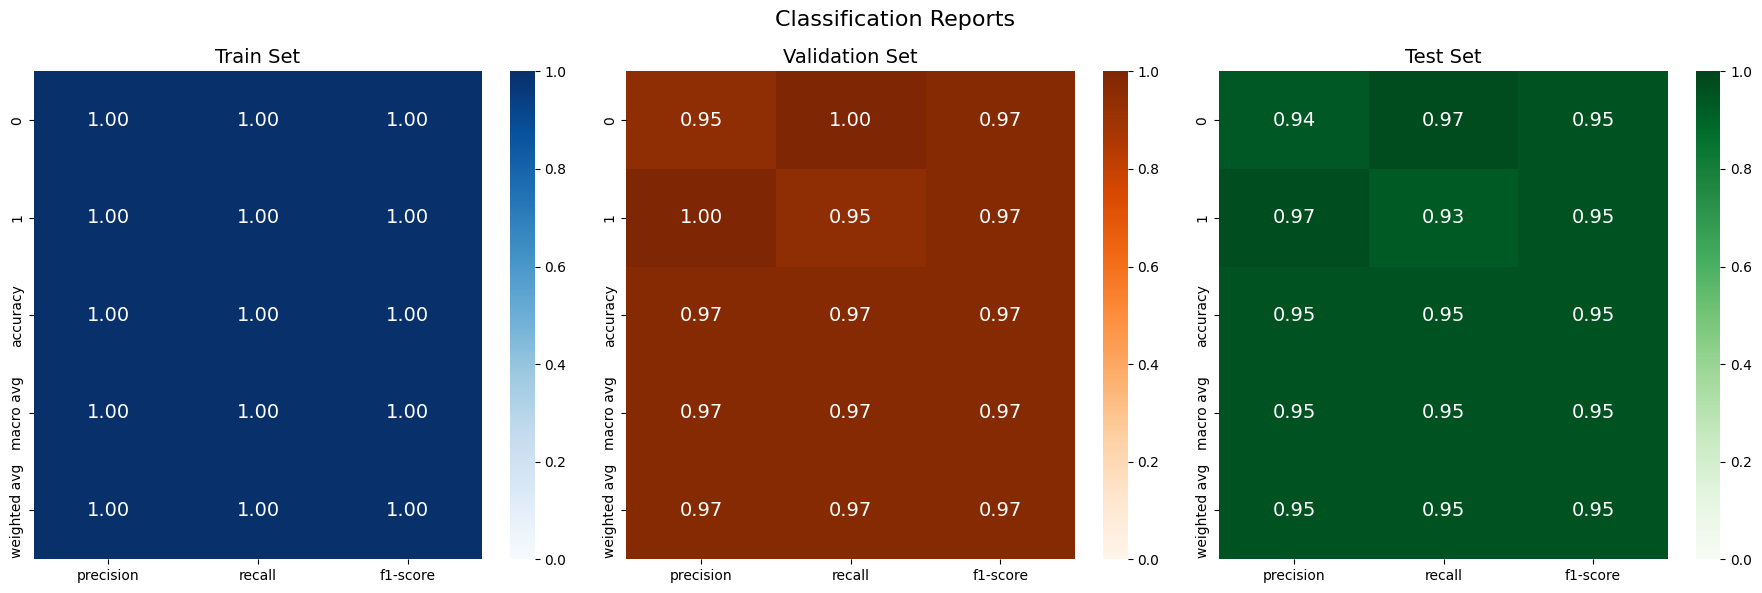

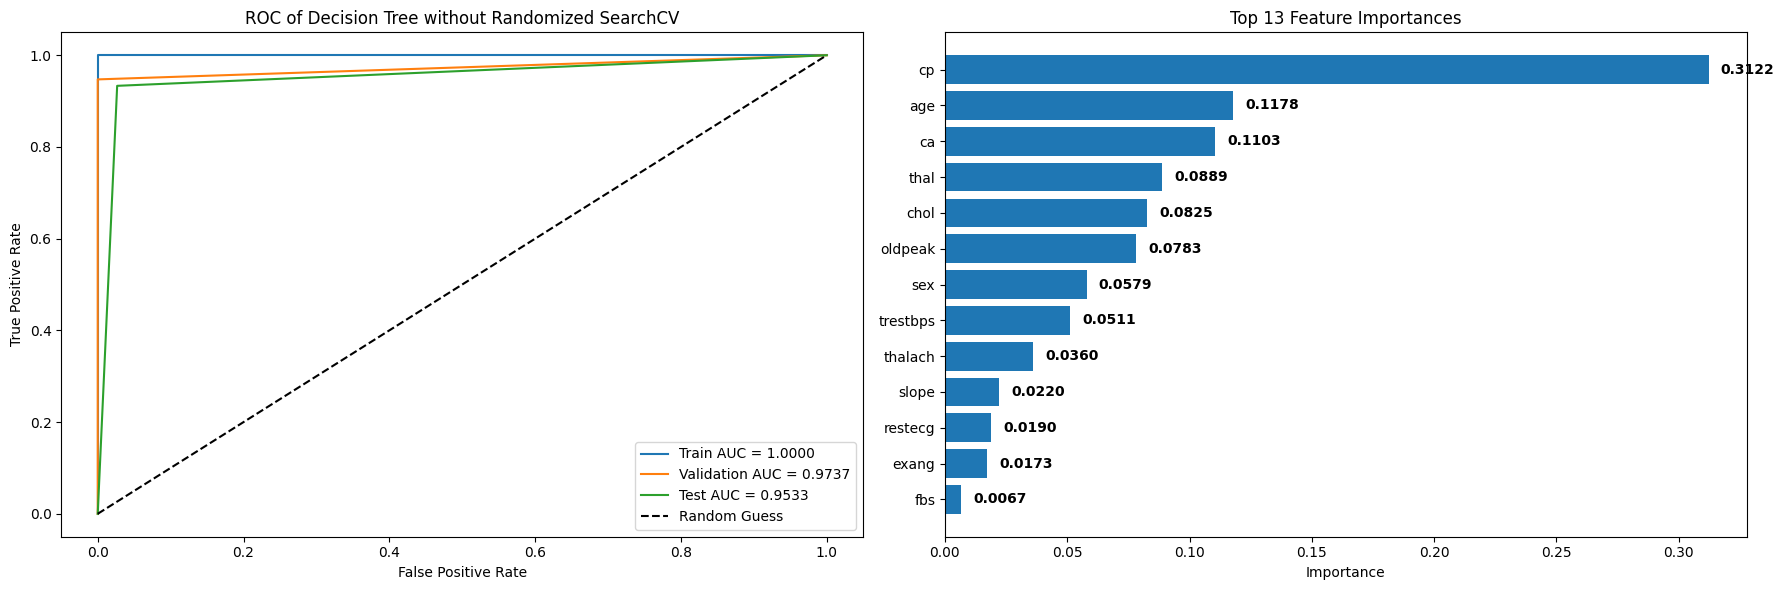

In [ ]:
# Fit the Decision Tree model without Randomized SearchCV
print("Decision Tree Model without Randomized SearchCV")
dt.fit(X_train, y_train)

# Confusion Matrix for validation set
plot_confusion_matrices(dt, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(dt, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(dt, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of Decision Tree without Randomized SearchCV", ax=axes[0])
plot_feature_importance(dt, X_train.columns, top_n=X_train.shape[1], ax=axes[1])

plt.tight_layout()
plt.show()

#### - Hyperparameter Tuning with Randomized SearchCV -


Decision Tree Model with Randomized SearchCV
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters after tuning:  {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}
Best cross-validation score:  0.9725826566803338


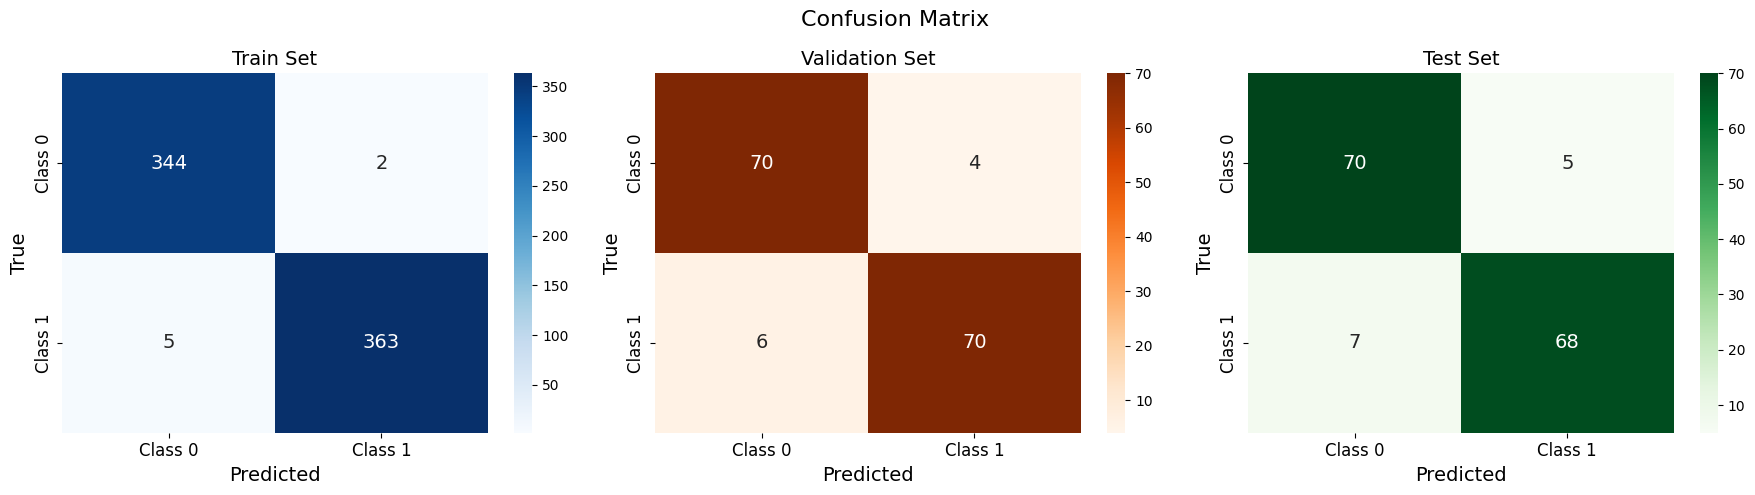

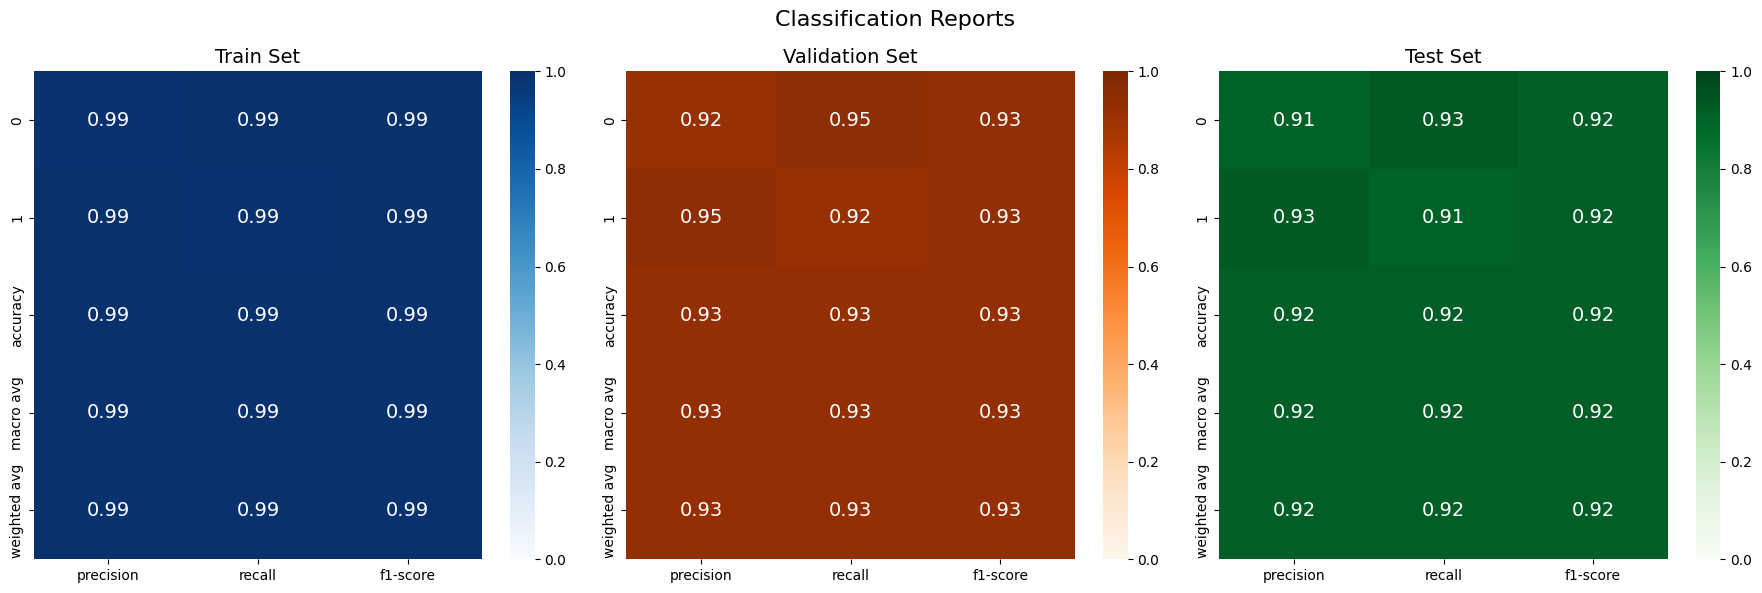

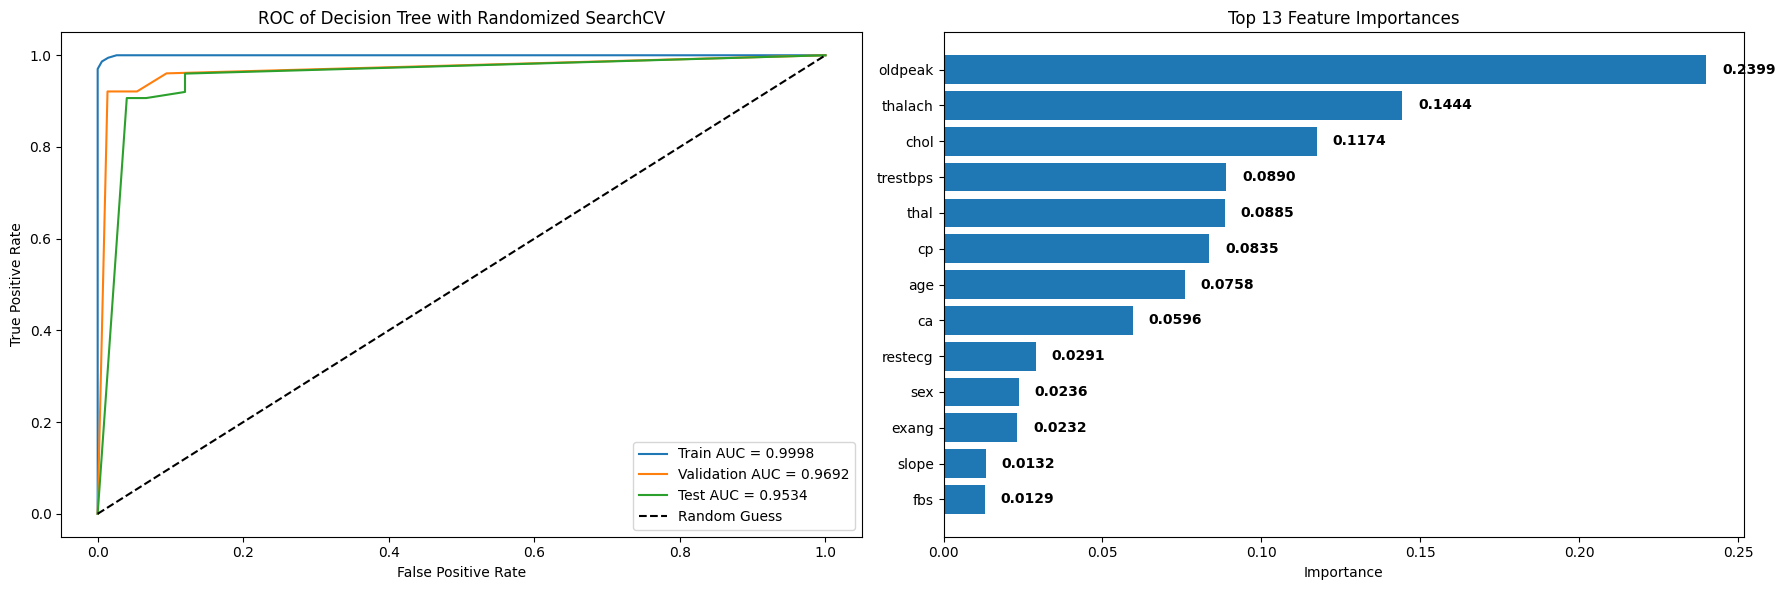

In [ ]:
# Predictions of Decision Tree on test set with Randomized SearchCV
print("\nDecision Tree Model with Randomized SearchCV")
rand_model_dt.fit(X_train, y_train)

# Best parameters and cross-validation score
print("\nBest parameters after tuning: ", rand_model_dt.best_params_)
print("Best cross-validation score: ", rand_model_dt.best_score_)

# Use the best estimator to make predictions
best_dt_model = rand_model_dt.best_estimator_

plot_confusion_matrices(best_dt_model, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(best_dt_model, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(best_dt_model, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of Decision Tree with Randomized SearchCV", ax=axes[0])
plot_feature_importance(best_dt_model, X_train.columns, top_n=X_train.shape[1], ax=axes[1])

plt.tight_layout()
plt.show()

## Random Forest

In [ ]:
#RandomizeSearchCV of Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=42)

# Defining the parameter grid
param_rand_rf = {
    'n_estimators': [100, 200, 300, 400, 500],  # Reduced range
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 8],  # Avoid excessive depth
    'max_features': ['sqrt', 'log2'],  # Removed unnecessary options
    'min_samples_split': [2, 5, 10],  # Removed extreme values
    'min_samples_leaf': [1, 2, 4],  # Avoid overly large leaf nodes
    'bootstrap': [True, False]  # Keep bootstrap options
}

# Setting up the RandomizedSearchCV
rand_model_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_rand_rf,
    n_iter=50,  # Reduce iterations for efficiency
    cv=5,  # Increase CV folds for better generalization
    verbose=2,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

#### - Base Model -

Random Forest Model without Randomized SearchCV


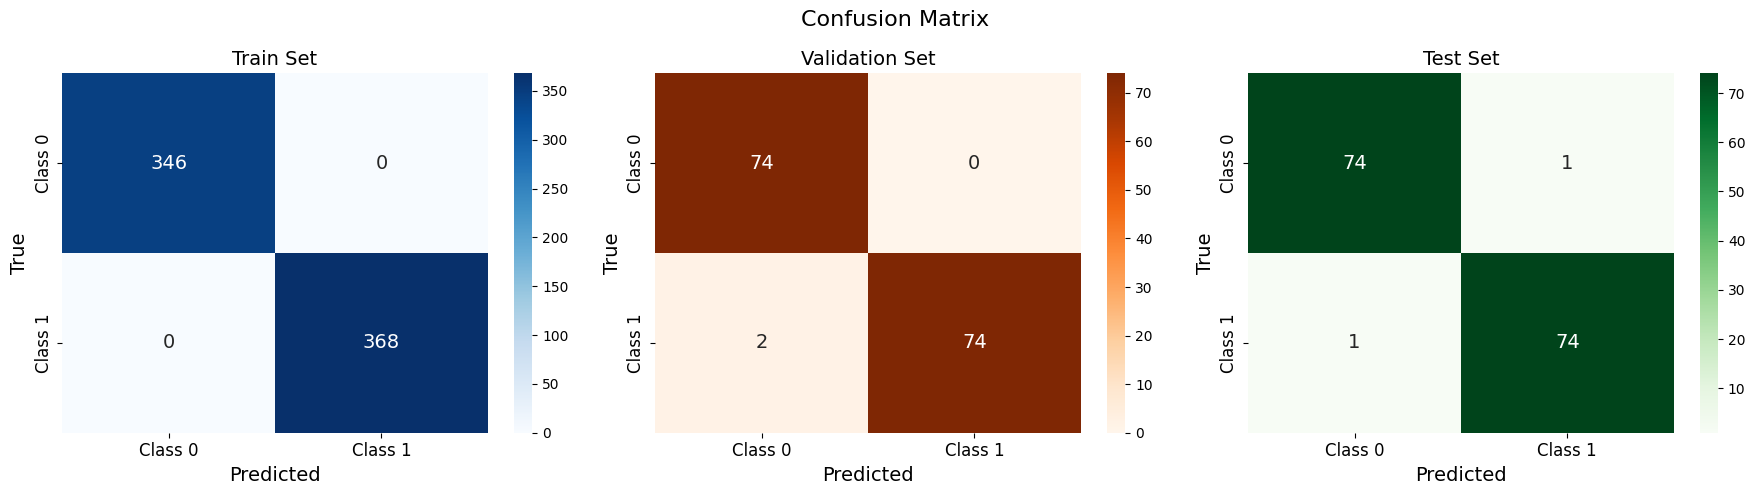

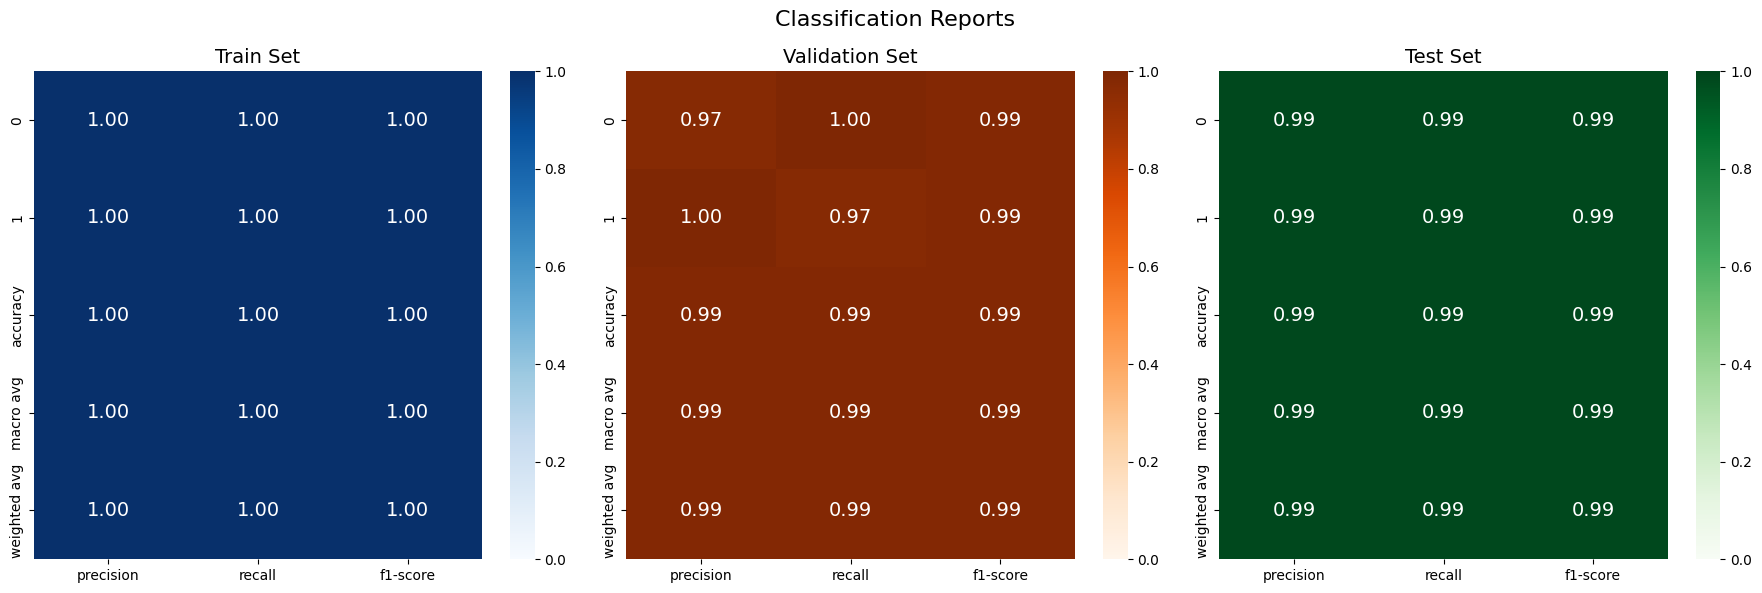

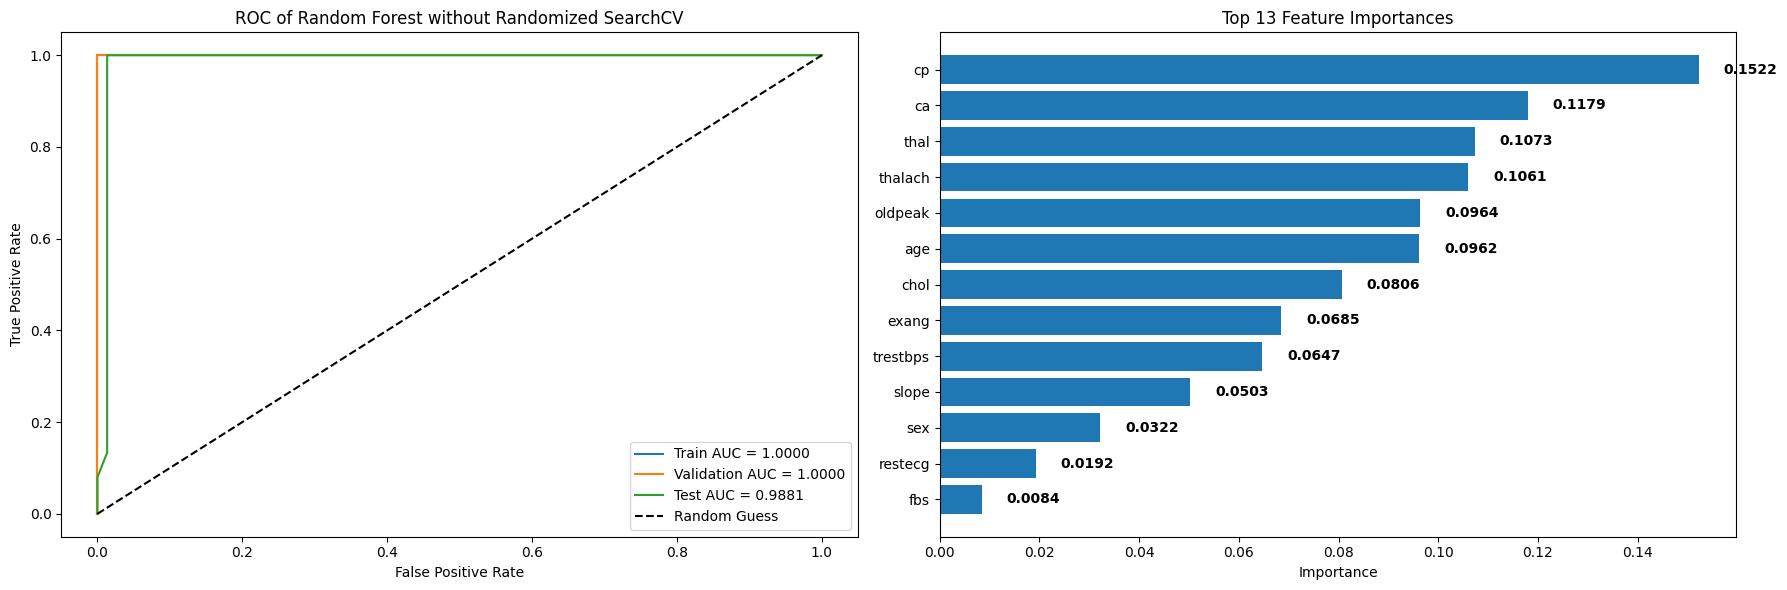

In [ ]:
# Fit the Random Forest model without Randomized SearchCV
print("Random Forest Model without Randomized SearchCV")
rf.fit(X_train, y_train)

# Confusion Matrix for validation set
plot_confusion_matrices(rf, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(rf, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(rf, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of Random Forest without Randomized SearchCV", ax=axes[0])
plot_feature_importance(rf, X_train.columns, top_n=X_train.shape[1], ax=axes[1])

plt.tight_layout()
plt.show()

#### - Hyperparameter Tuning with Randomized SearchCV -


Random Forest Model with Randomized SearchCV
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters after tuning:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'gini', 'bootstrap': True}
Best cross-validation score:  0.9947914237729604


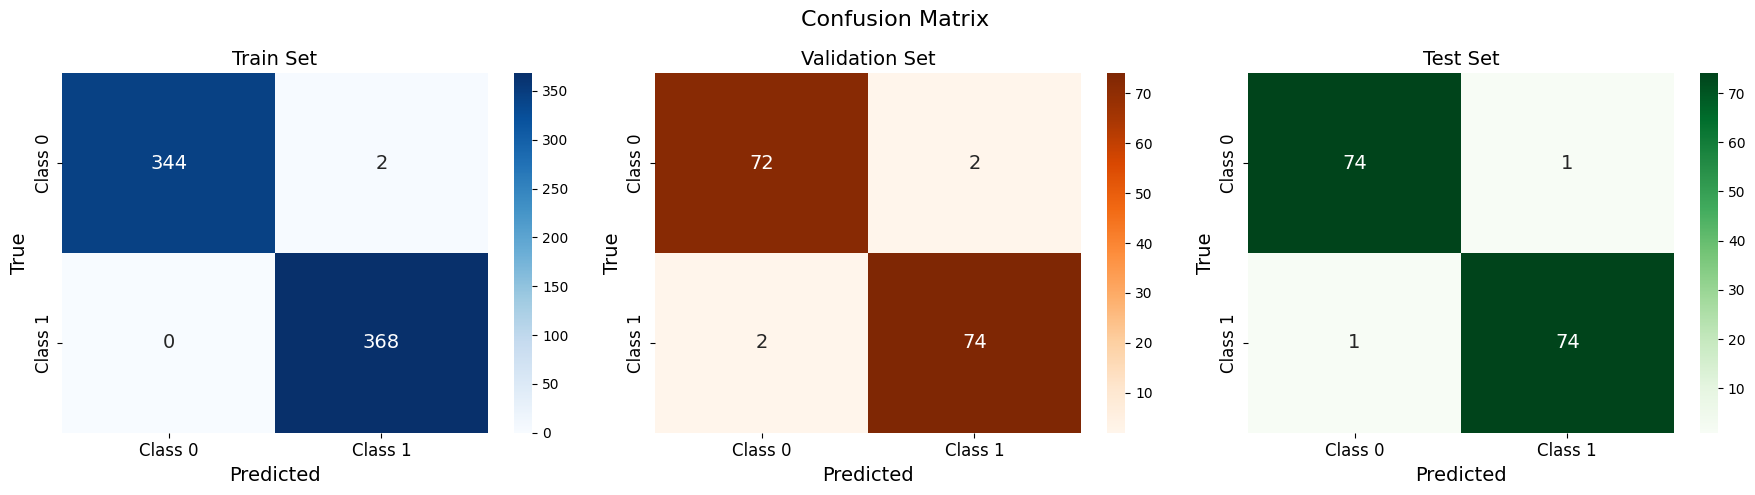

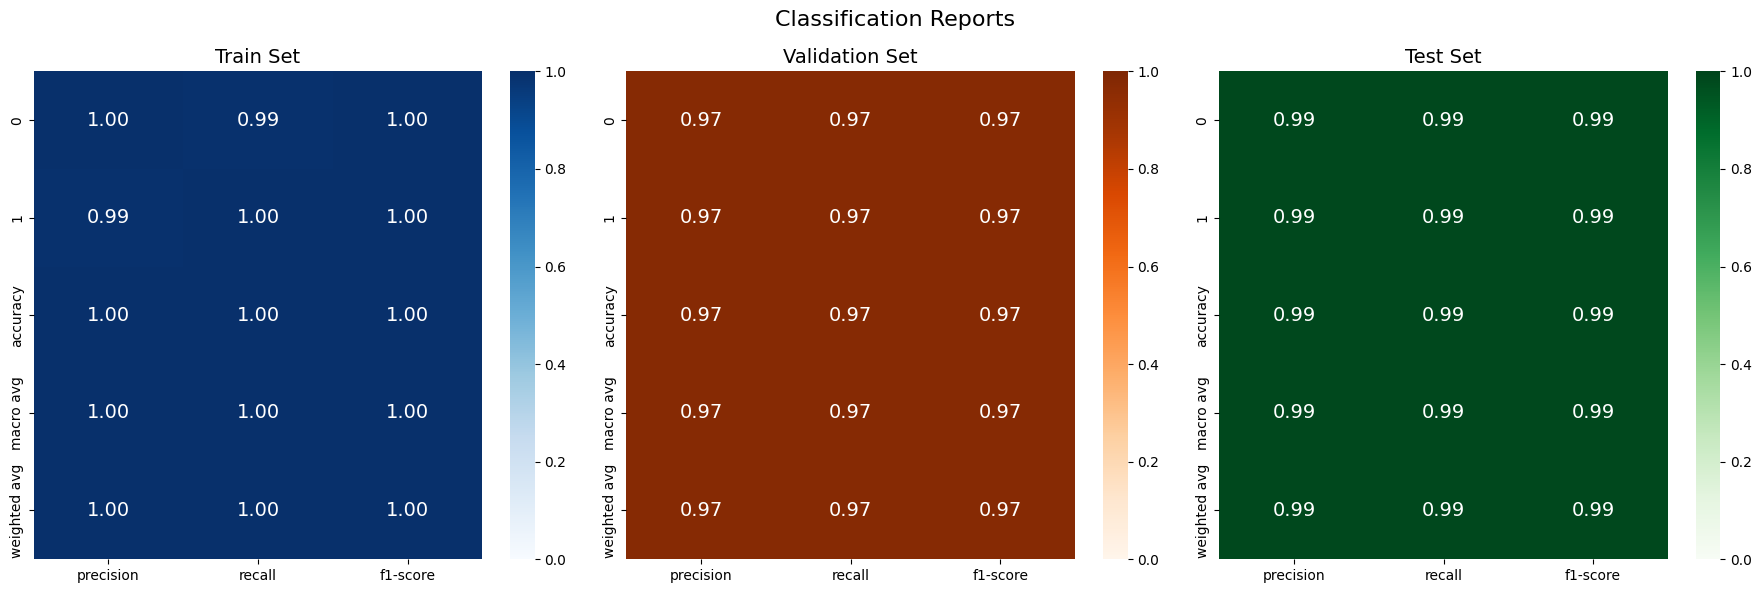

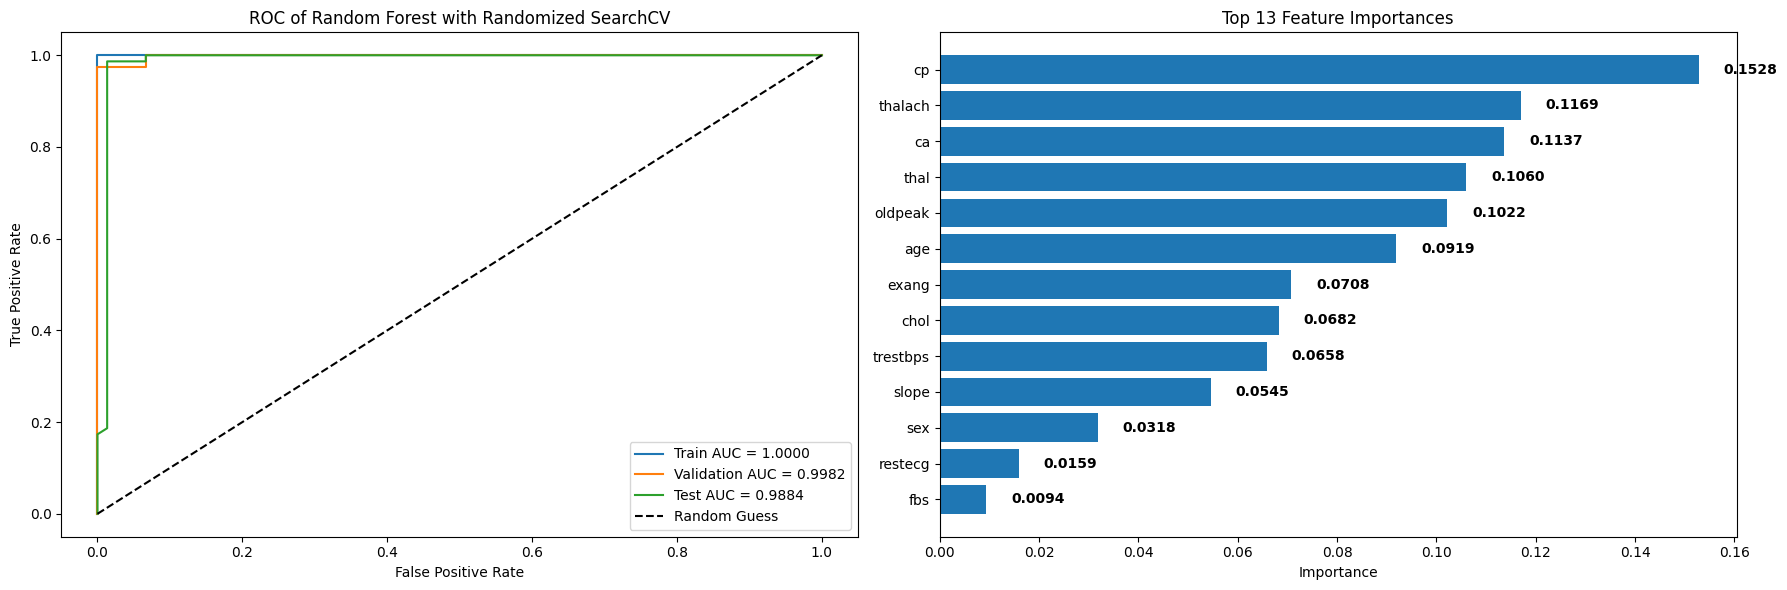

In [ ]:
# Predictions of Random Forest on test set with Randomized SearchCV
print("\nRandom Forest Model with Randomized SearchCV")
rand_model_rf.fit(X_train, y_train)

# Best parameters and cross-validation score
print("\nBest parameters after tuning: ", rand_model_rf.best_params_)
print("Best cross-validation score: ", rand_model_rf.best_score_)

# Use the best estimator to make predictions
best_rf_model = rand_model_rf.best_estimator_

plot_confusion_matrices(best_rf_model, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(best_rf_model, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(best_rf_model, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of Random Forest with Randomized SearchCV", ax=axes[0])
plot_feature_importance(best_rf_model, X_train.columns, top_n=X_train.shape[1], ax=axes[1])

plt.tight_layout()
plt.show()

## XGBoost

In [ ]:
# Initialize the XGBoost Classifier
xgb = XGBClassifier(random_state=42, n_estimators=500)

param_rand_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [5, 6, 7, 8],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 2, 3],
    'scale_pos_weight': [1, 2, 5]
}

# Set up RandomizedSearchCV
rand_model_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_rand_xgb,
    n_iter=50,  # Number of parameter settings sampled
    scoring='roc_auc',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

#### - Base Model -

XGBoost Model without Randomized SearchCV


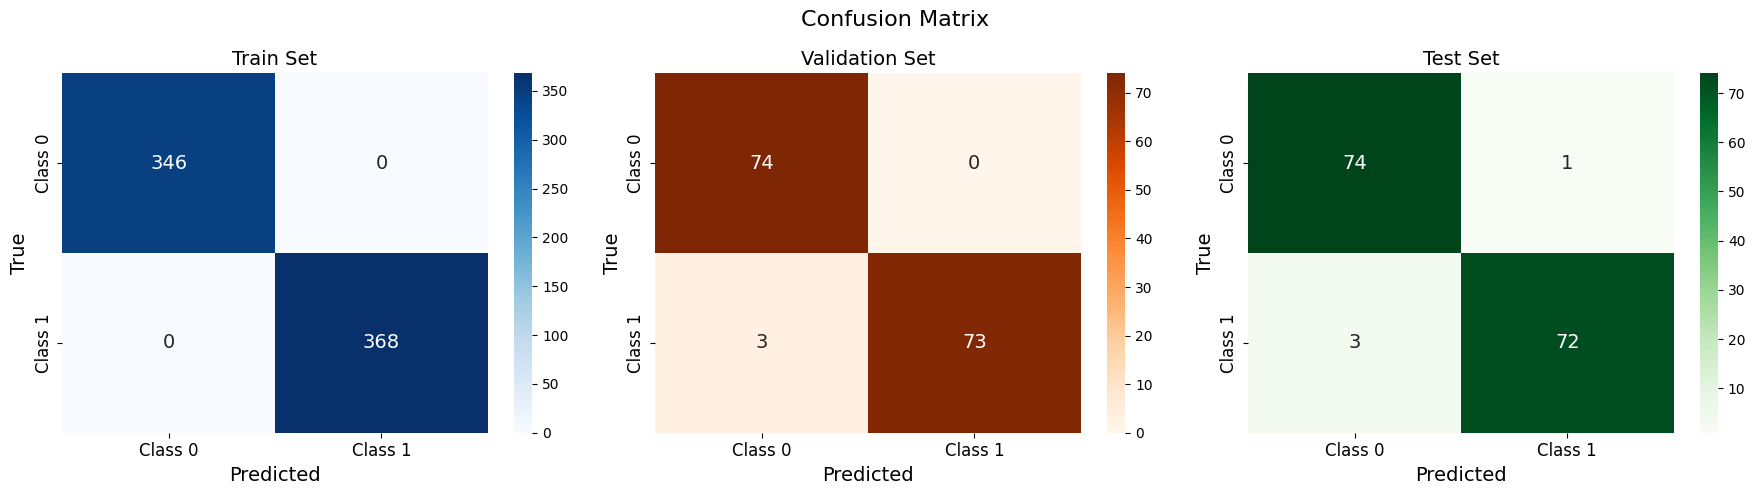

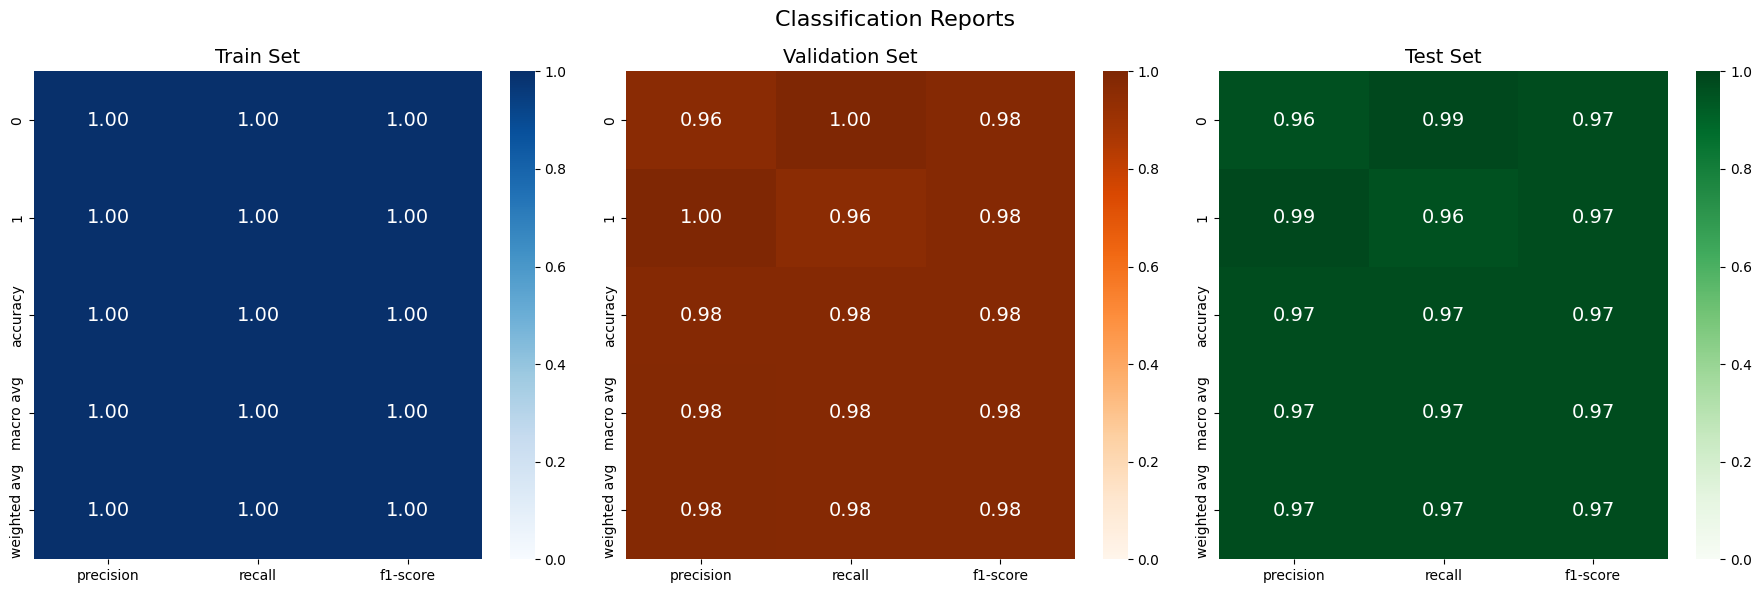

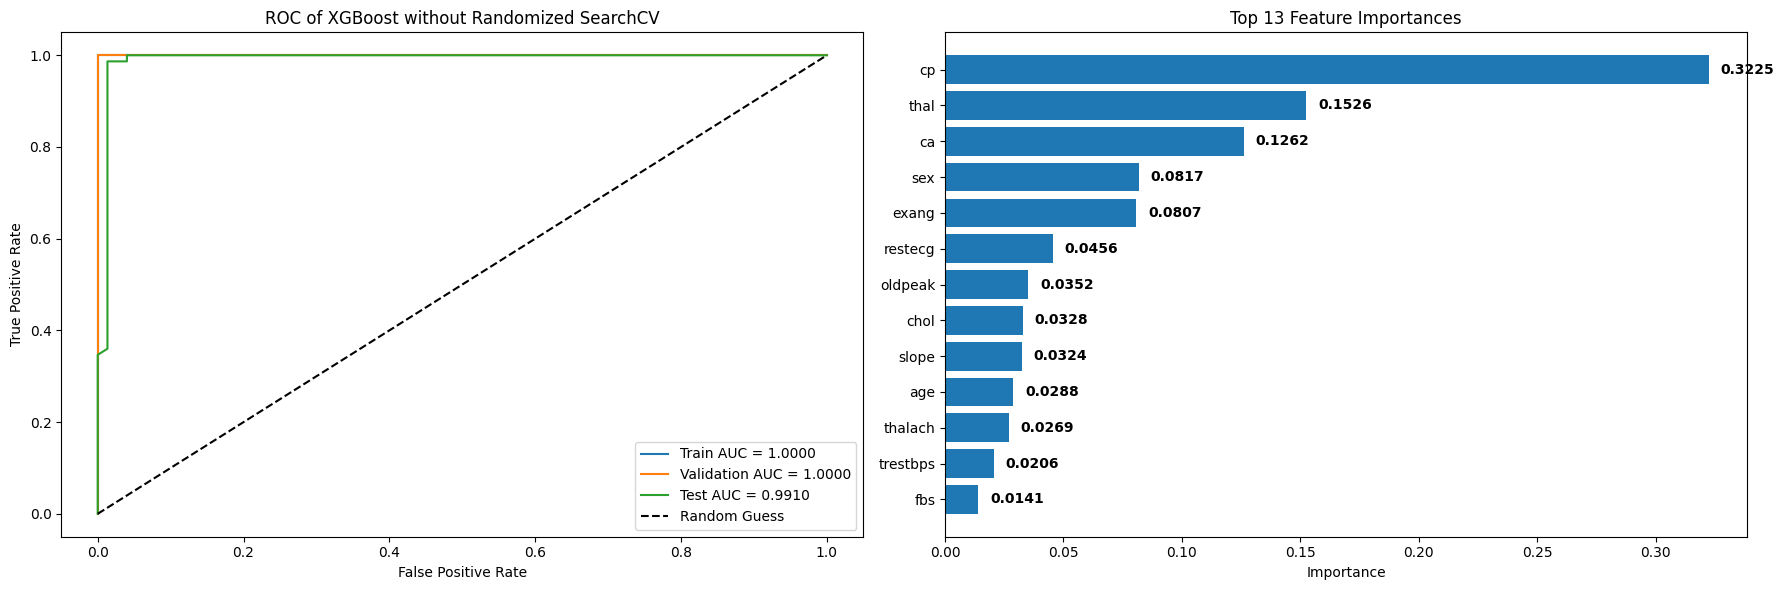

In [ ]:
# Fit the XGBoost model without Randomized SearchCV
print("XGBoost Model without Randomized SearchCV")
xgb.fit(X_train, y_train)

# Confusion Matrix for validation set
plot_confusion_matrices(xgb, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(xgb, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(xgb, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of XGBoost without Randomized SearchCV", ax=axes[0])
plot_feature_importance(xgb, X_train.columns, top_n=X_train.shape[1], ax=axes[1])

plt.tight_layout()
plt.show()

#### - Hyperparameter Tuning with Randomized SearchCV -


XGBoost Model with Randomized SearchCV
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters after tuning:  {'subsample': 1.0, 'scale_pos_weight': 1, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.7}
Best cross-validation score:  0.9924410328817714


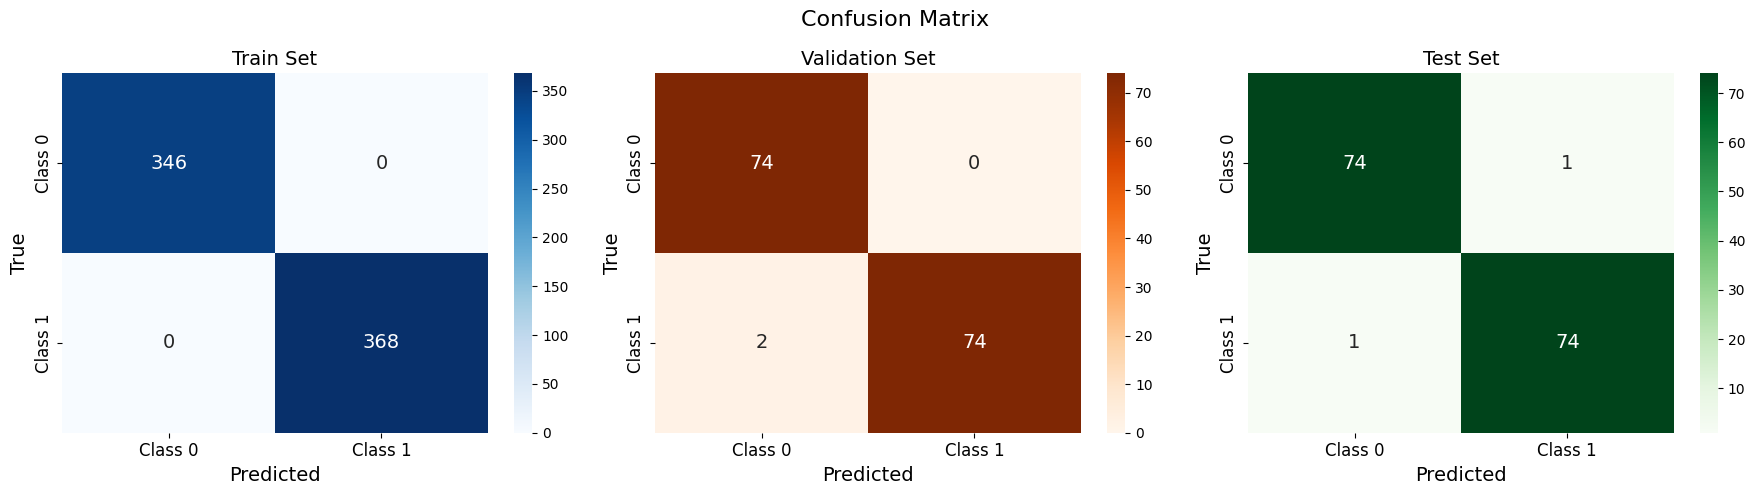

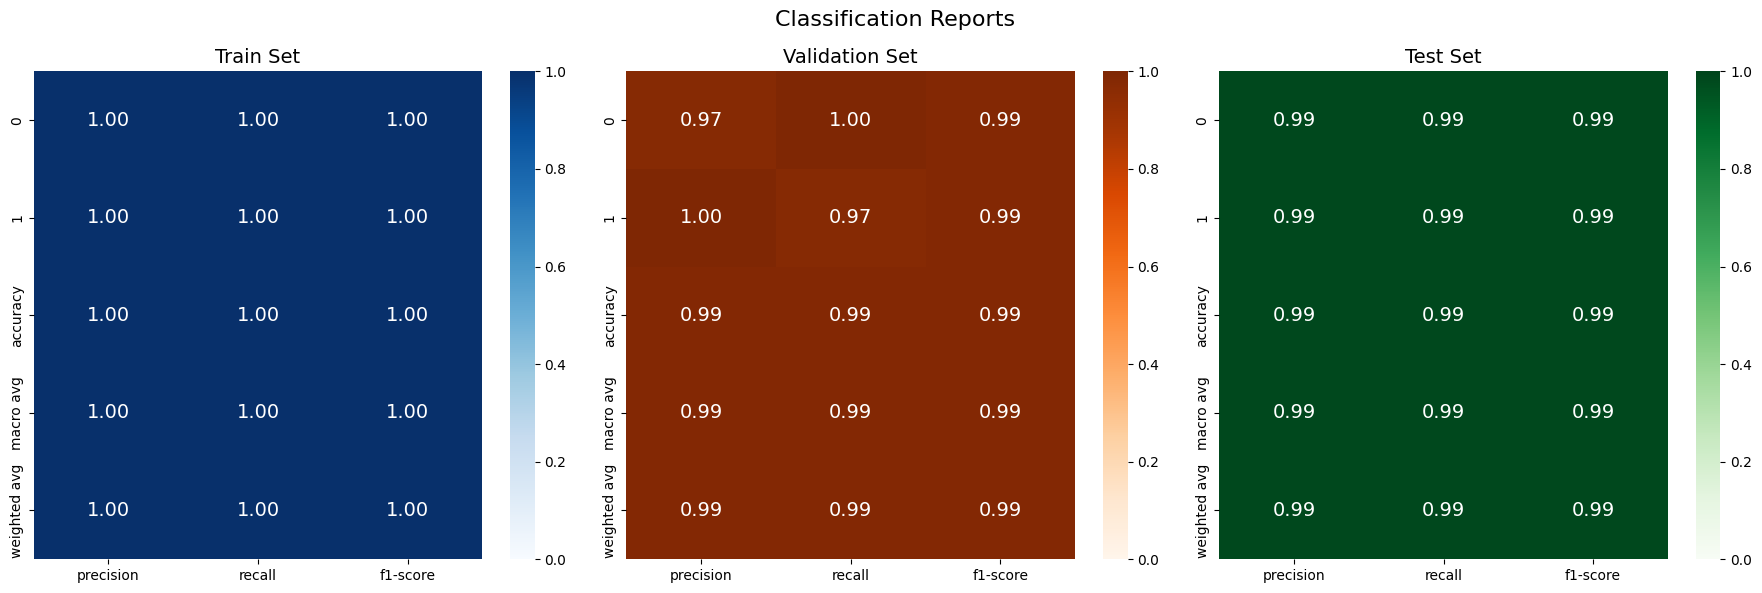

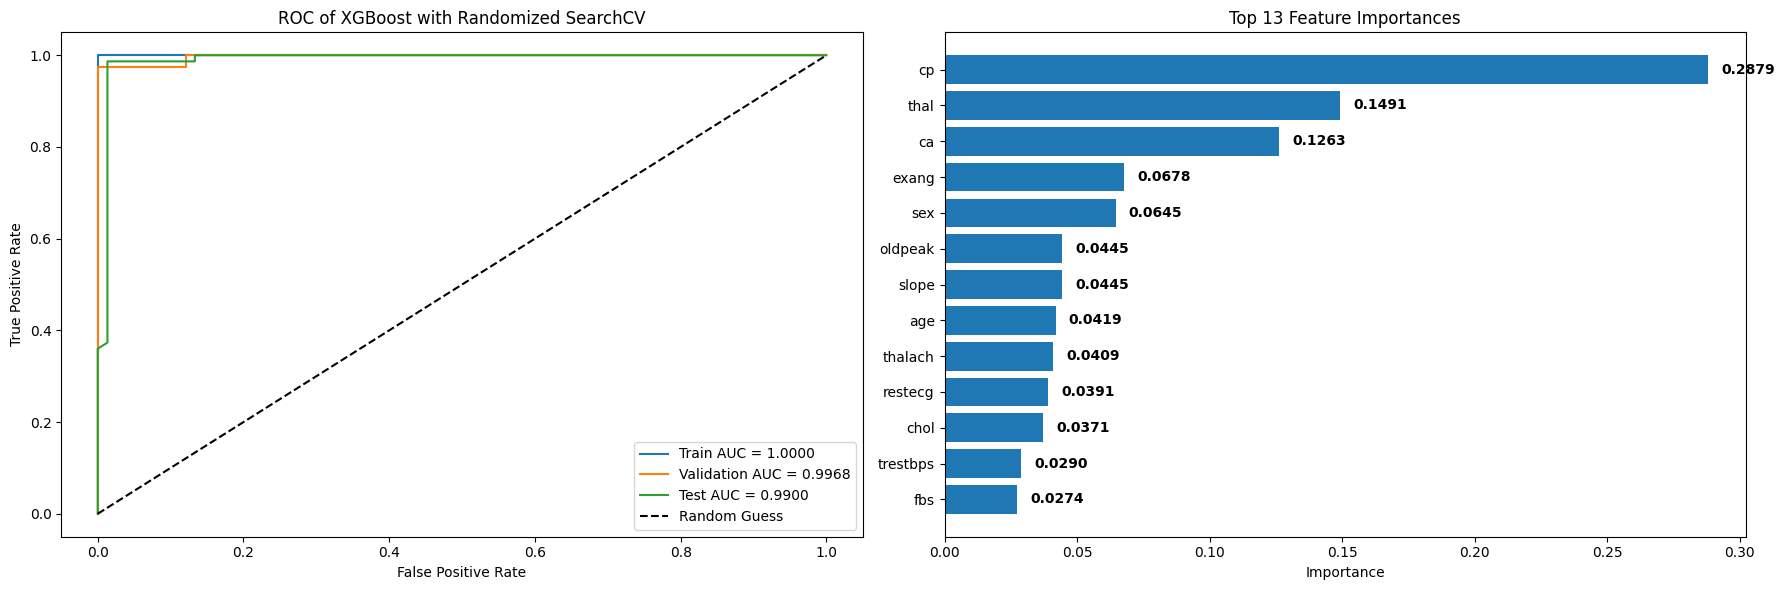

In [ ]:
# Predictions of XGBoost Model on test set with Randomized SearchCV
print("\nXGBoost Model with Randomized SearchCV")
rand_model_xgb.fit(X_train, y_train)

# Best parameters and cross-validation score
print("\nBest parameters after tuning: ", rand_model_xgb.best_params_)
print("Best cross-validation score: ", rand_model_xgb.best_score_)

# Use the best estimator to make predictions
best_xgb_model = rand_model_xgb.best_estimator_

plot_confusion_matrices(best_xgb_model, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(best_xgb_model, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(best_xgb_model, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of XGBoost with Randomized SearchCV", ax=axes[0])
plot_feature_importance(best_xgb_model, X_train.columns, top_n=X_train.shape[1], ax=axes[1])

plt.tight_layout()
plt.show()

## Ada Boost

In [ ]:
# Initialize the AdaBoost Classifier
ada = AdaBoostClassifier(random_state=42, n_estimators=500)

param_rand_ada = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],
}

# Set up RandomizedSearchCV
rand_model_ada = RandomizedSearchCV(
    estimator=ada,
    param_distributions=param_rand_ada,
    n_iter=20,  # Number of parameter settings sampled
    scoring='roc_auc',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

#### - Base Model -

AdaBoost Model without Randomized SearchCV


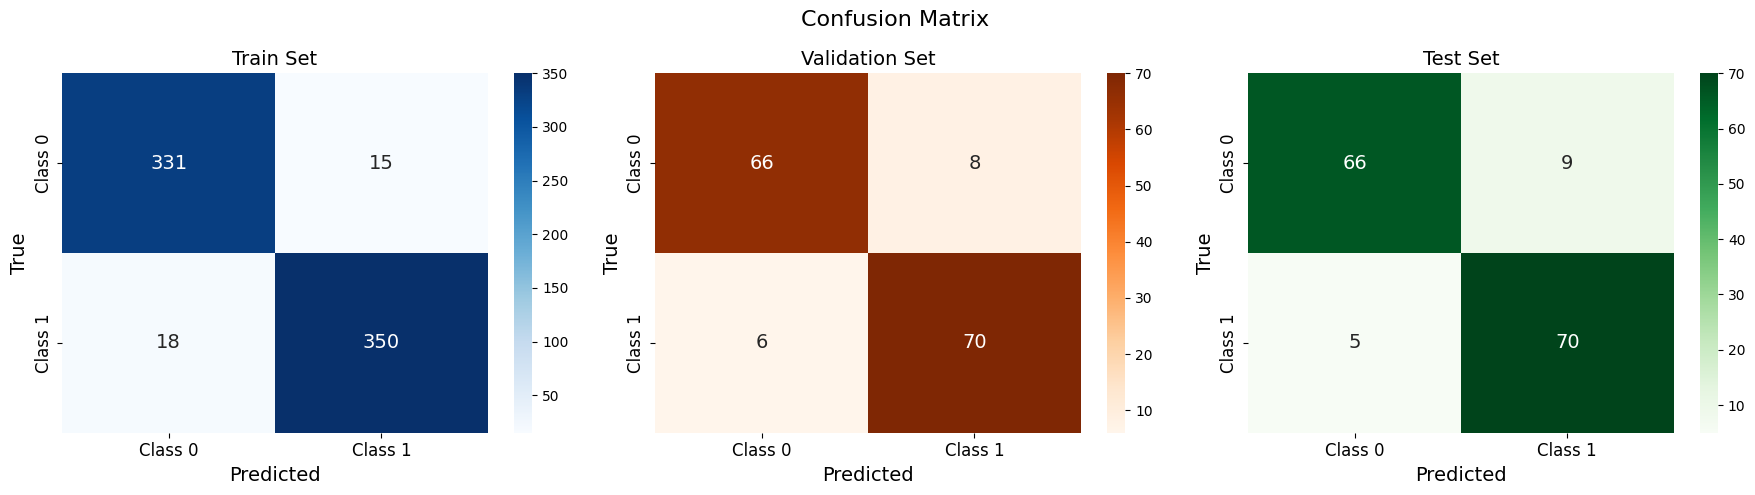

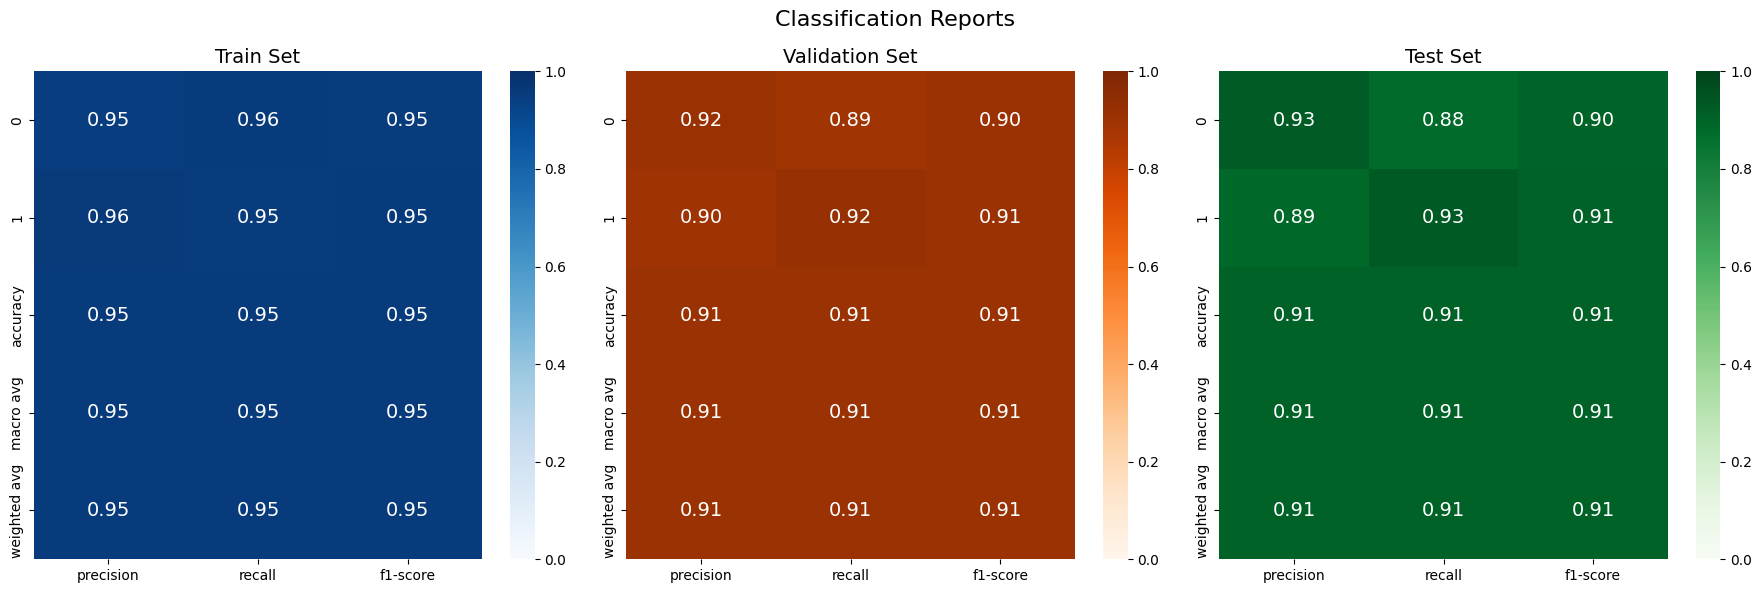

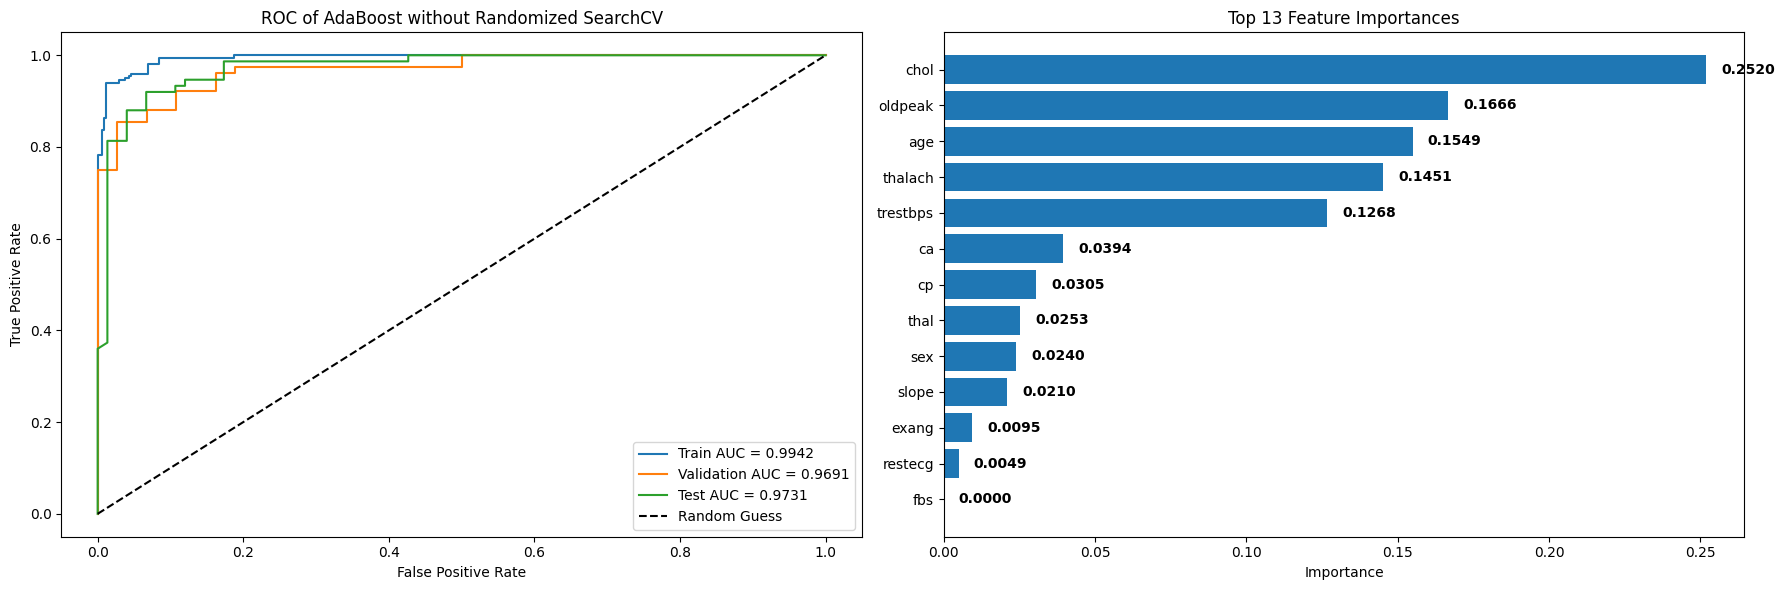

In [ ]:
# Fit the AdaBoost model without Randomized SearchCV
print("AdaBoost Model without Randomized SearchCV")
ada.fit(X_train, y_train)

# Confusion Matrix for validation set
plot_confusion_matrices(ada, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(ada, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(ada, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of AdaBoost without Randomized SearchCV", ax=axes[0])
plot_feature_importance(ada, X_train.columns, top_n=X_train.shape[1], ax=axes[1])

plt.tight_layout()
plt.show()

#### - Hyperparameter Tuning with Randomized SearchCV -


AdaBoost Model with Randomized SearchCV
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters after tuning:  {'n_estimators': 500, 'learning_rate': 1.5}
Best cross-validation score:  0.9783589698777311


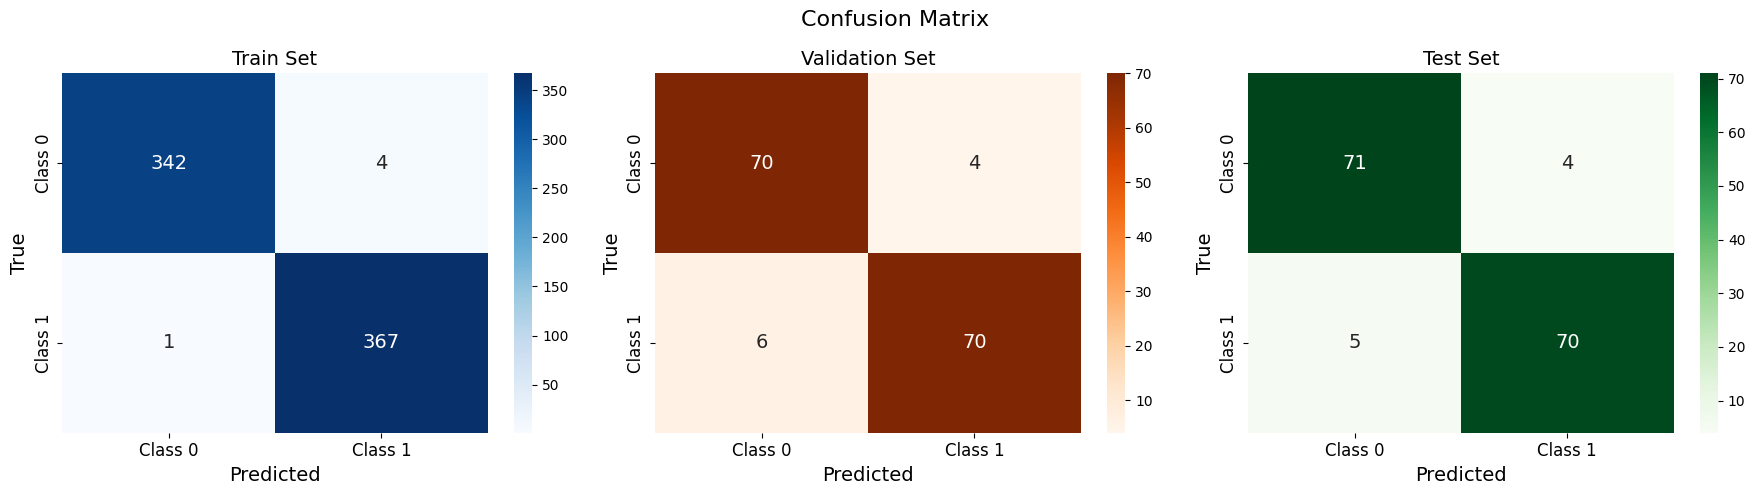

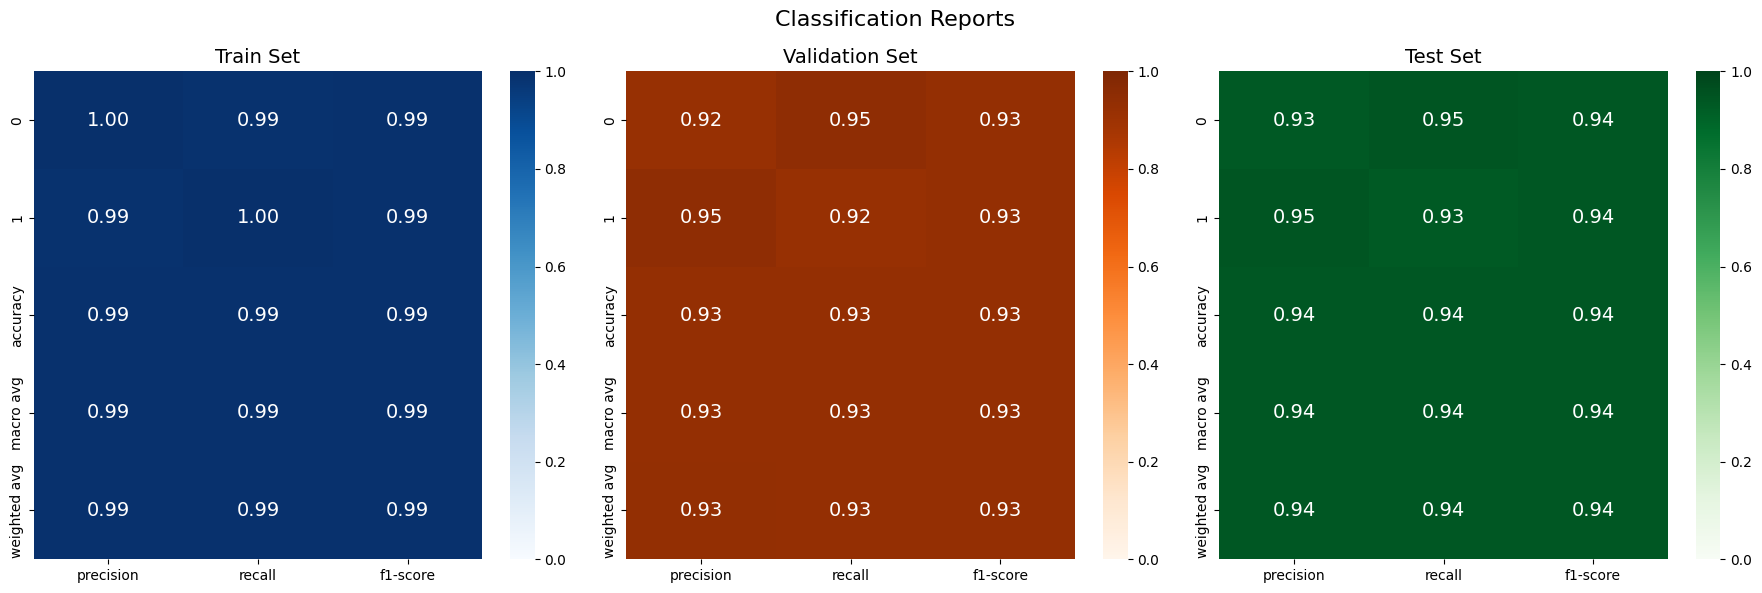

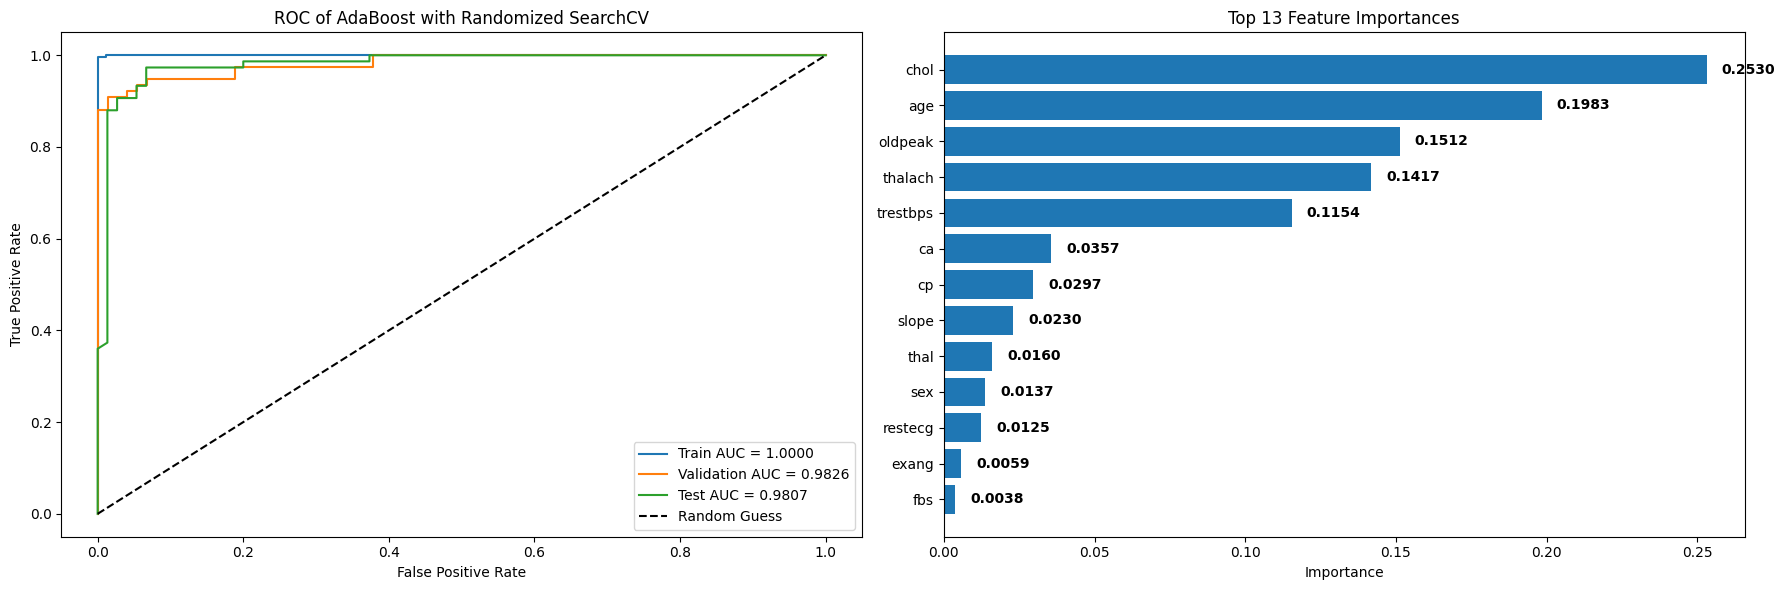

In [ ]:
# Predictions of AdaBoost Model on test set with Randomized SearchCV
print("\nAdaBoost Model with Randomized SearchCV")
rand_model_ada.fit(X_train, y_train)

# Best parameters and cross-validation score
print("\nBest parameters after tuning: ", rand_model_ada.best_params_)
print("Best cross-validation score: ", rand_model_ada.best_score_)

# Use the best estimator to make predictions
best_ada_model = rand_model_ada.best_estimator_

plot_confusion_matrices(best_ada_model, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(best_ada_model, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(best_ada_model, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of AdaBoost with Randomized SearchCV", ax=axes[0])
plot_feature_importance(best_ada_model, X_train.columns, top_n=X_train.shape[1], ax=axes[1])

plt.tight_layout()
plt.show()

## Gradient Boosting

In [ ]:
# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for Gradient Boosting
param_rand_gb = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

# Set up RandomizedSearchCV
rand_model_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_rand_gb,
    n_iter=50,  # Number of parameter settings sampled
    scoring='roc_auc',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

#### - Base Model -

Gradient Boosting Model without Randomized SearchCV


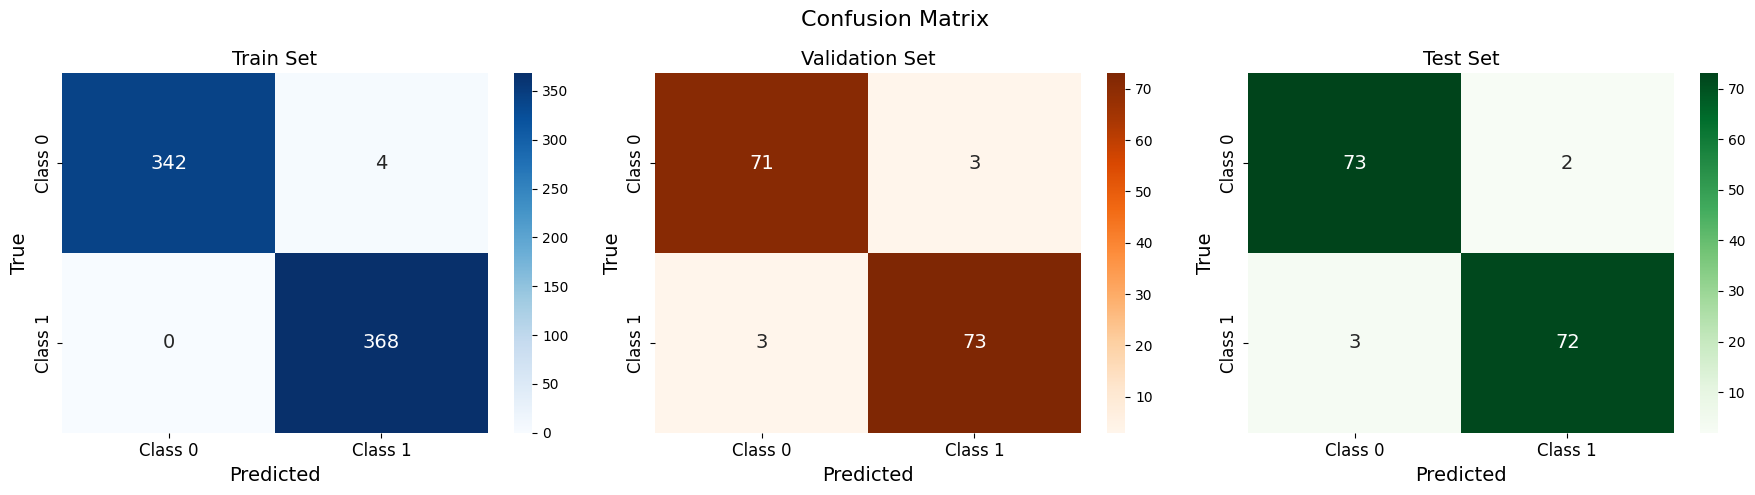

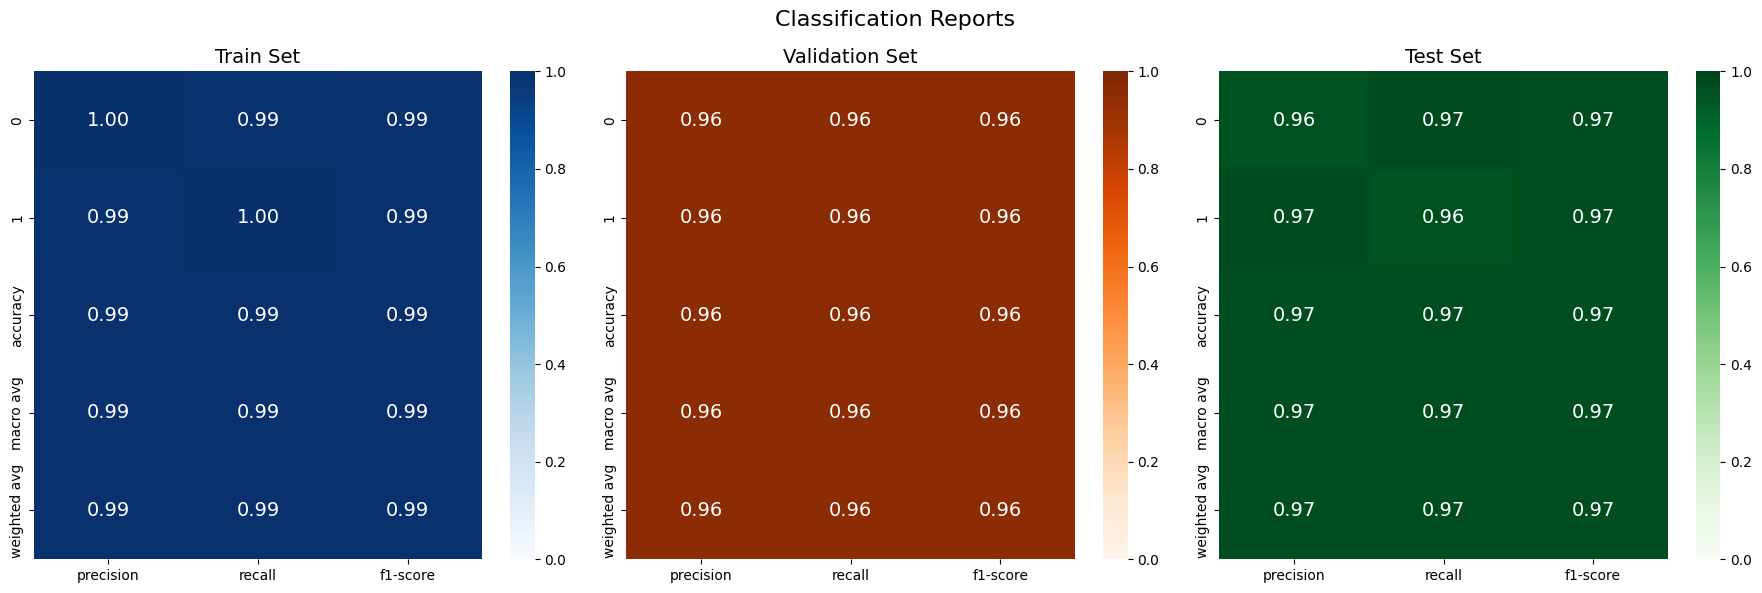

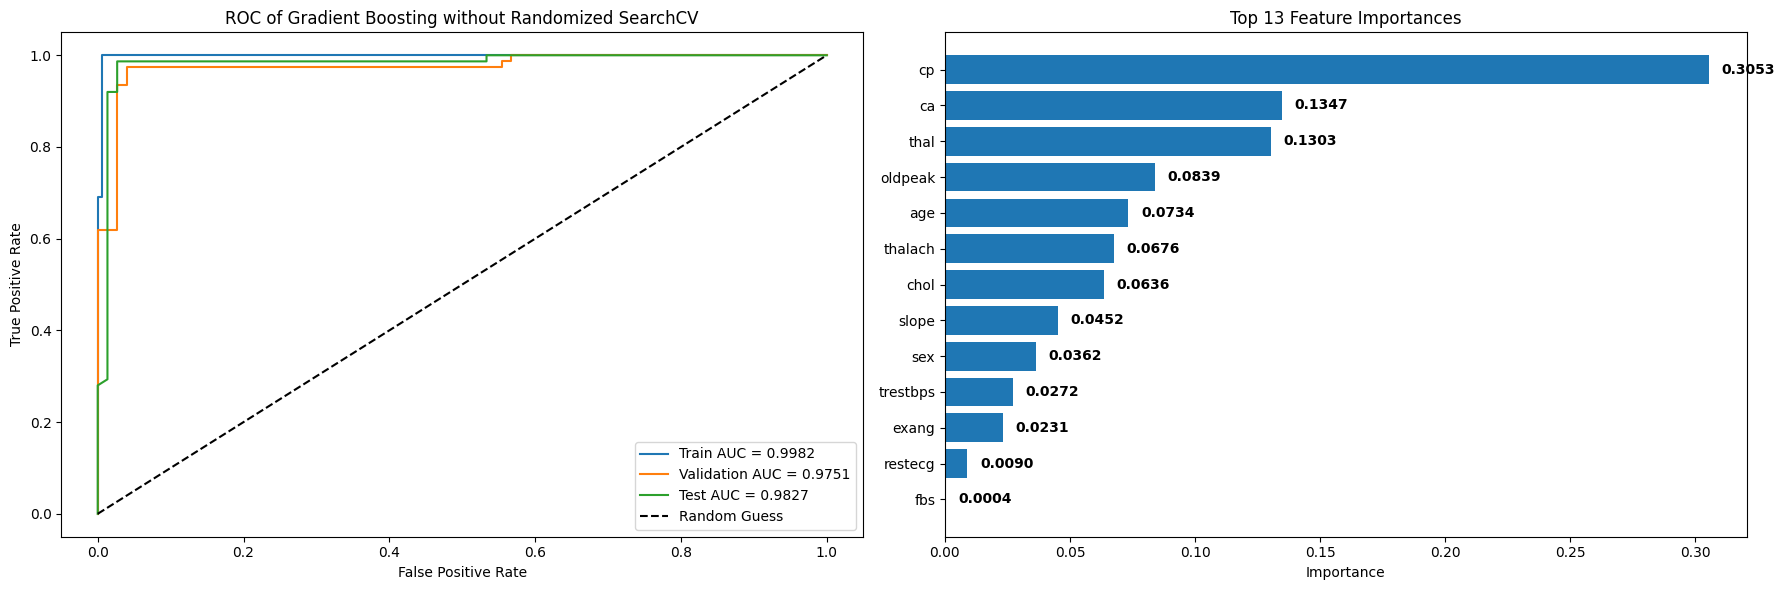

In [ ]:
# Fit the Gradient Boosting model without Randomized SearchCV
print("Gradient Boosting Model without Randomized SearchCV")
gb.fit(X_train, y_train)

# Confusion Matrix for validation set
plot_confusion_matrices(gb, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(gb, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(gb, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of Gradient Boosting without Randomized SearchCV", ax=axes[0])
plot_feature_importance(gb, X_train.columns, top_n=X_train.shape[1], ax=axes[1])

plt.tight_layout()
plt.show()

#### - Hyperparameter Tuning with Randomized SearchCV -


Gradient Boosting Model with Randomized SearchCV
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters after tuning:  {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 8, 'learning_rate': 0.1}
Best cross-validation score:  0.9973759737785943


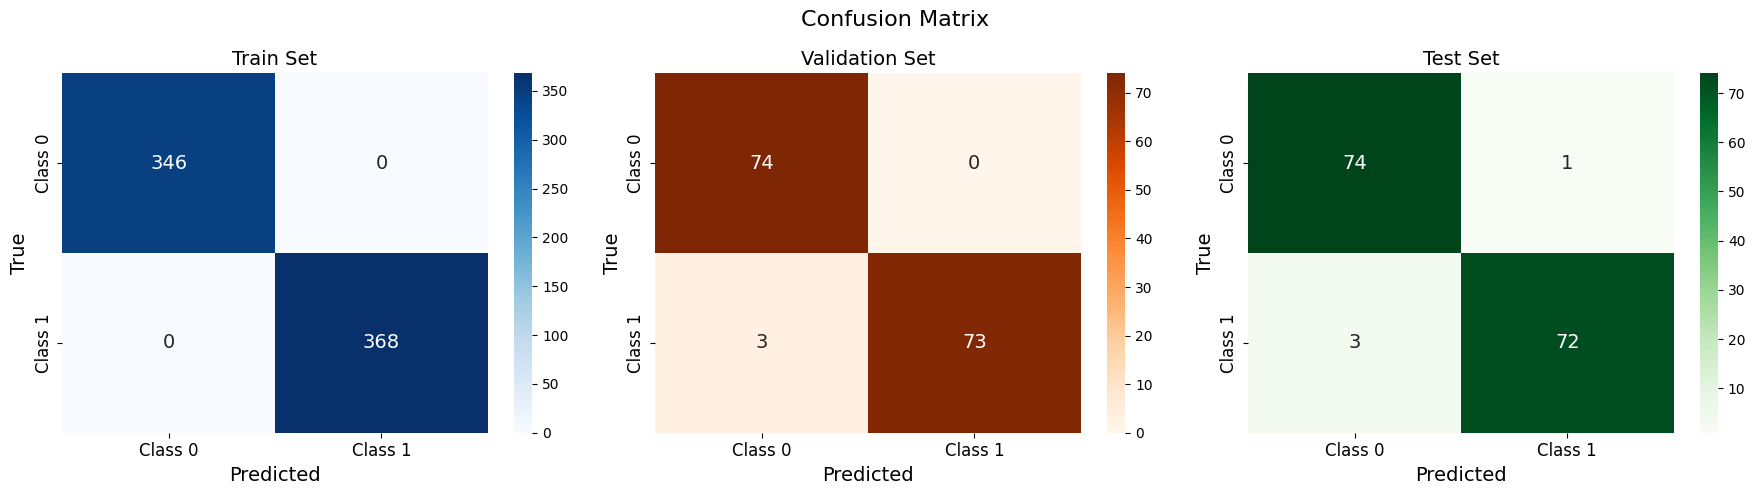

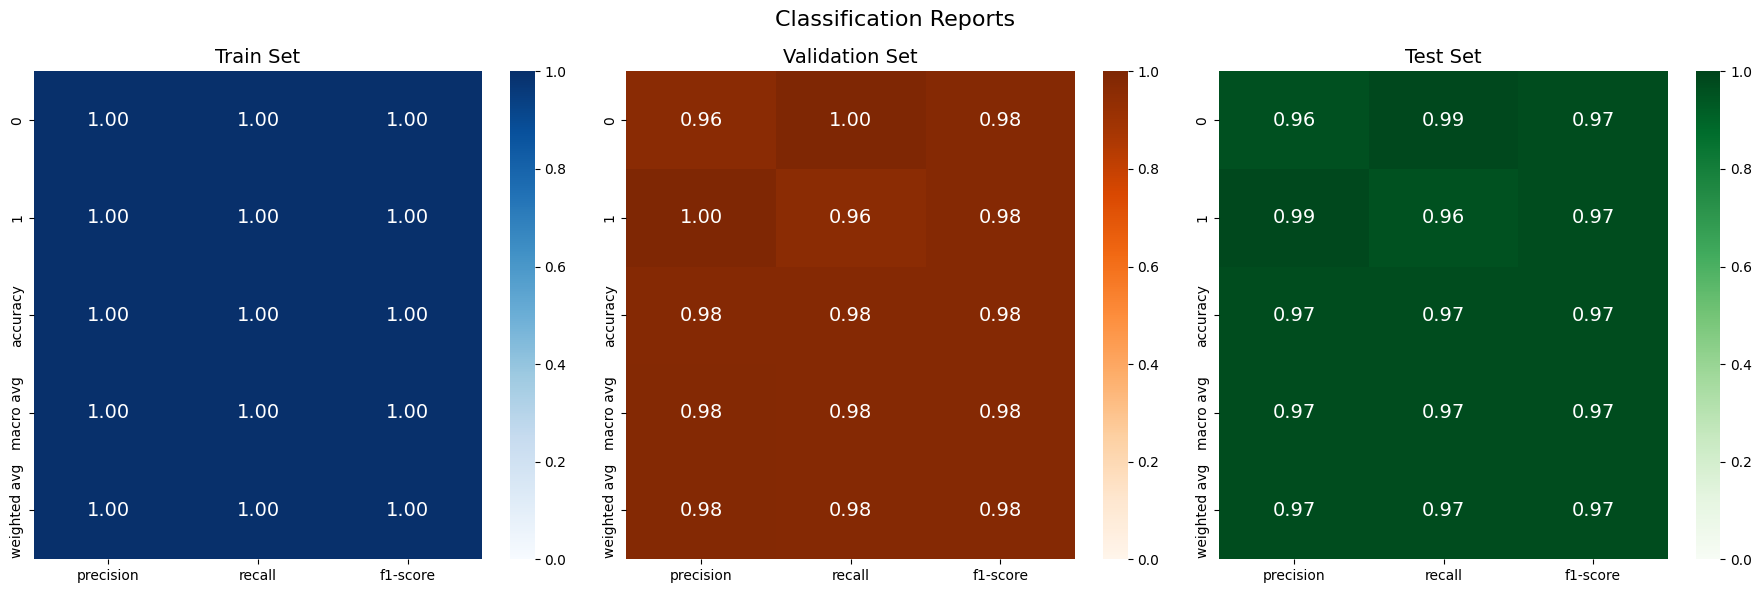

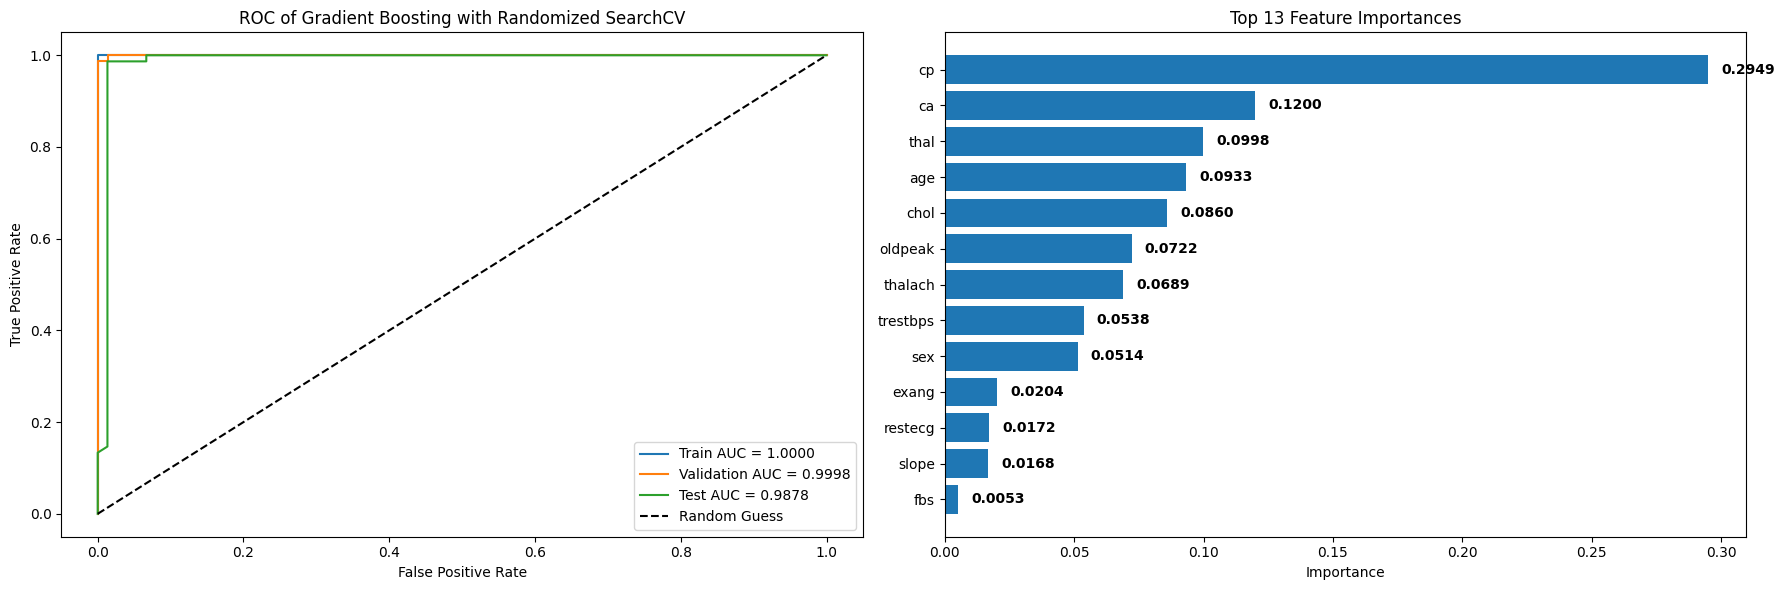

In [ ]:
# Predictions of Gradient Boosting Model on test set with Randomized SearchCV
print("\nGradient Boosting Model with Randomized SearchCV")
rand_model_gb.fit(X_train, y_train)

# Best parameters and cross-validation score
print("\nBest parameters after tuning: ", rand_model_gb.best_params_)
print("Best cross-validation score: ", rand_model_gb.best_score_)

# Use the best estimator to make predictions
best_gb_model = rand_model_gb.best_estimator_

plot_confusion_matrices(best_gb_model, X_train, y_train, X_val, y_val, X_test, y_test)
plot_classification_reports(best_gb_model, X_train, y_train, X_val, y_val, X_test, y_test)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Use axes directly
plot_roc_curves(best_gb_model, X_train, y_train, X_val, y_val, X_test, y_test, title="ROC of Gradient Boosting with Randomized SearchCV", ax=axes[0])
plot_feature_importance(best_gb_model, X_train.columns, top_n=X_train.shape[1], ax=axes[1])

plt.tight_layout()
plt.show()

## Summarization of Feature Importance for Tree Based Model

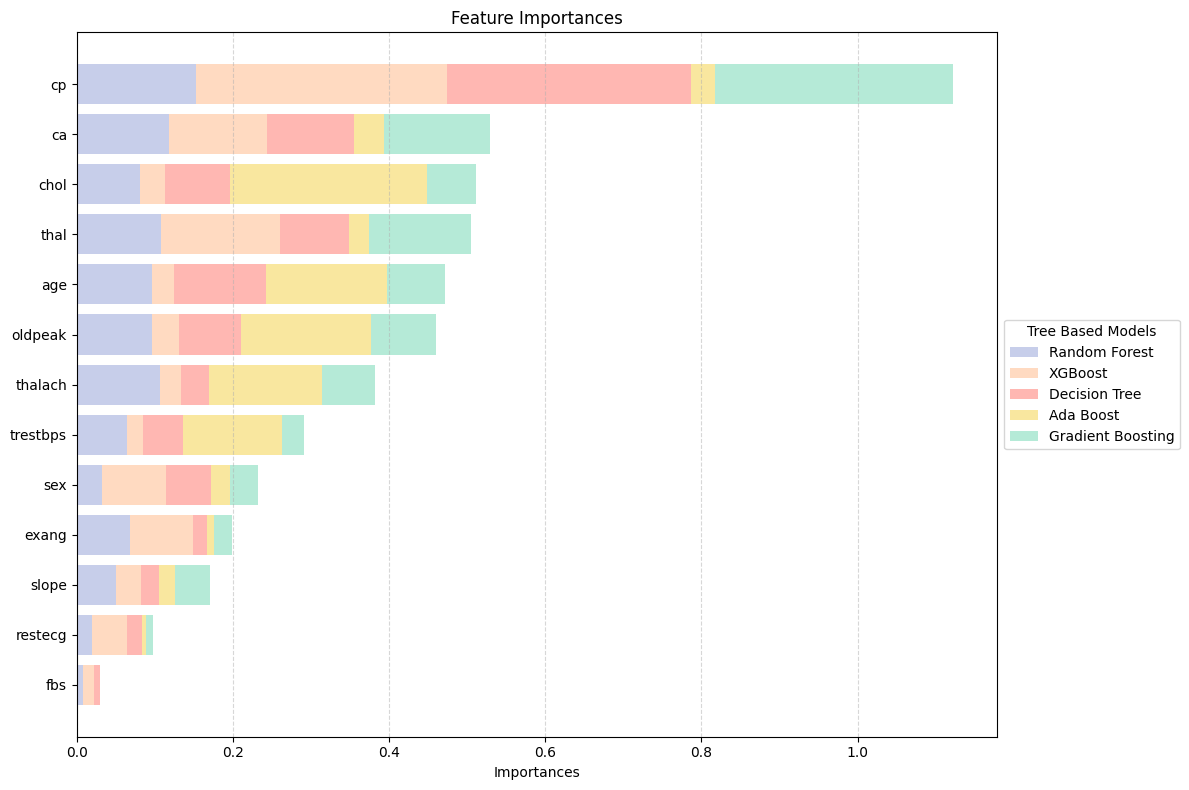

In [ ]:
# Train models and store importances
tree_models = {
    'Random Forest': rf,
    'XGBoost': xgb,
    'Decision Tree': dt,
    'Ada Boost': ada,
    'Gradient Boosting': gb
}

feature_importances = pd.DataFrame(index=X_train.columns)  # Replace `X_train.columns` with your features

for name, model in tree_models.items():
    feature_importances[name] = model.feature_importances_

# Compute total importance across models and sort
feature_importances["Total"] = feature_importances.sum(axis=1)
feature_importances = feature_importances.sort_values(by="Total", ascending=False)
feature_importances = feature_importances.drop(columns="Total")  # Optional: drop the helper column

# Plot settings
plt.figure(figsize=(12, 8))
ax = plt.subplot()

colors = {
    "Random Forest": "#C7CEEA",
    "XGBoost": "#FFDAC1",
    "Decision Tree": "#FFB7B2",
    "Ada Boost": "#F9E79F",
    "Gradient Boosting": "#B5EAD7"
}

# Plot stacked horizontal bars
y_pos = np.arange(len(feature_importances.index))
left = np.zeros(len(feature_importances.index))

for model in tree_models.keys():
    values = feature_importances[model]
    ax.barh(y_pos, values, left=left, color=colors[model], label=model)
    left += values

# Final styling
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_importances.index)
ax.invert_yaxis()
ax.set_xlabel("Importances")
ax.set_title("Feature Importances")
ax.legend(title="Tree Based Models", loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Model Comparison & Selection

In [ ]:
# Models before tuning
models = {
    'KNN': knn,
    'SVM': svc,
    'Logistic Regression': lg,
    'Random Forest': rf,
    'XGBoost': xgb,
    'Naive Bayes': nb,
    'Decision Tree': dt,
    'Neural Network': mlp,
    'Ada Boost': ada,
    'Gradient Boosting': gb
}

# Models after tuning
models_after_tuning = {
    'KNN': best_knn_model,
    'SVM': best_svc_model,
    'Logistic Regression': rand_model_lg,
    'Random Forest': rand_model_rf,
    'XGBoost': rand_model_xgb,
    'Naive Bayes': rand_model_nb,
    'Decision Tree': rand_model_dt,
    'Neural Network': rand_model_mlp,
    'Ada Boost': rand_model_ada,
    'Gradient Boosting': rand_model_gb,
}

### Confusion Matrix

In [ ]:
def get_confusion_table(models, X_test, y_test):
    results = {
        "Model": [],
        "True Positive (TP)": [],
        "True Negative (TN)": [],
        "False Positive (FP)": [],
        "False Negative (FN)": []
    }

    for name, model in models.items():
        y_pred = model.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        results["Model"].append(name)
        results["True Positive (TP)"].append(tp)
        results["True Negative (TN)"].append(tn)
        results["False Positive (FP)"].append(fp)
        results["False Negative (FN)"].append(fn)

    return pd.DataFrame(results)

In [ ]:
conf_table_df = get_confusion_table(models, X_test, y_test)
print("Confusion Matrix (Before Tuning)")
print(conf_table_df)
print()

conf_table_tuned_df = get_confusion_table(models_after_tuning, X_test, y_test)
print("Confusion Matrix (After Tuning)")
print(conf_table_tuned_df)


Confusion Matrix (Before Tuning)
                 Model  True Positive (TP)  True Negative (TN)  \
0                  KNN                  64                  67   
1                  SVM                  70                  57   
2  Logistic Regression                  70                  54   
3        Random Forest                  74                  74   
4              XGBoost                  72                  74   
5          Naive Bayes                  67                  55   
6        Decision Tree                  70                  73   
7       Neural Network                  73                  74   
8            Ada Boost                  70                  66   
9    Gradient Boosting                  72                  73   

   False Positive (FP)  False Negative (FN)  
0                    8                   11  
1                   18                    5  
2                   21                    5  
3                    1                    1  
4         

### Classification Report (Weighted)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def evaluate_classification_result(models, X_test, y_test):
    """
    Evaluate multiple trained models on the same test set and return metrics in a DataFrame.

    Parameters:
        models (dict): Dictionary of model name and trained model objects.
        X_test (array-like): Test feature data.
        y_test (array-like): True labels for test data.

    Returns:
        pd.DataFrame: DataFrame with Accuracy, Precision, Recall, F1-score, and ROC-AUC for each model.
    """
    results = {
        "Model": [],
        "Accuracy": [],
        "Precision": [],
        "Recall": [],
        "F1-score": [],
        "ROC-AUC": []
    }

    for name, model in models.items():
        y_pred = model.predict(X_test)
        # For ROC-AUC, we need the predicted probabilities for class 1 (positive class)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            # If model doesn't have predict_proba, we can't calculate ROC-AUC
            y_prob = y_pred

        results["Model"].append(name)
        results["Accuracy"].append(accuracy_score(y_test, y_pred))
        results["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
        results["Recall"].append(recall_score(y_test, y_pred, average='weighted'))
        results["F1-score"].append(f1_score(y_test, y_pred, average='weighted'))
        results["ROC-AUC"].append(roc_auc_score(y_test, y_prob))

    df_results = pd.DataFrame(results)
    return df_results.round(4)

In [ ]:
print("Weighted Classification Report (Before Tuning)")
results_df = evaluate_classification_result(models, X_test, y_test)
print(results_df)
print()

print("Weighted Classification Report (After Tuning)")
tuned_results_df = evaluate_classification_result(models_after_tuning, X_test, y_test)
print(tuned_results_df)


Weighted Classification Report (Before Tuning)
                 Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0                  KNN    0.8733     0.8739  0.8733    0.8733   0.9550
1                  SVM    0.8467     0.8574  0.8467    0.8455   0.9436
2  Logistic Regression    0.8267     0.8422  0.8267    0.8247   0.9184
3        Random Forest    0.9867     0.9867  0.9867    0.9867   0.9881
4              XGBoost    0.9733     0.9737  0.9733    0.9733   0.9910
5          Naive Bayes    0.8133     0.8216  0.8133    0.8121   0.8889
6        Decision Tree    0.9533     0.9541  0.9533    0.9533   0.9533
7       Neural Network    0.9800     0.9801  0.9800    0.9800   0.9822
8            Ada Boost    0.9067     0.9078  0.9067    0.9066   0.9731
9    Gradient Boosting    0.9667     0.9667  0.9667    0.9667   0.9827

Weighted Classification Report (After Tuning)
                 Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0                  KNN    0.9867     0.9867  0.9867   

### ROC Curve

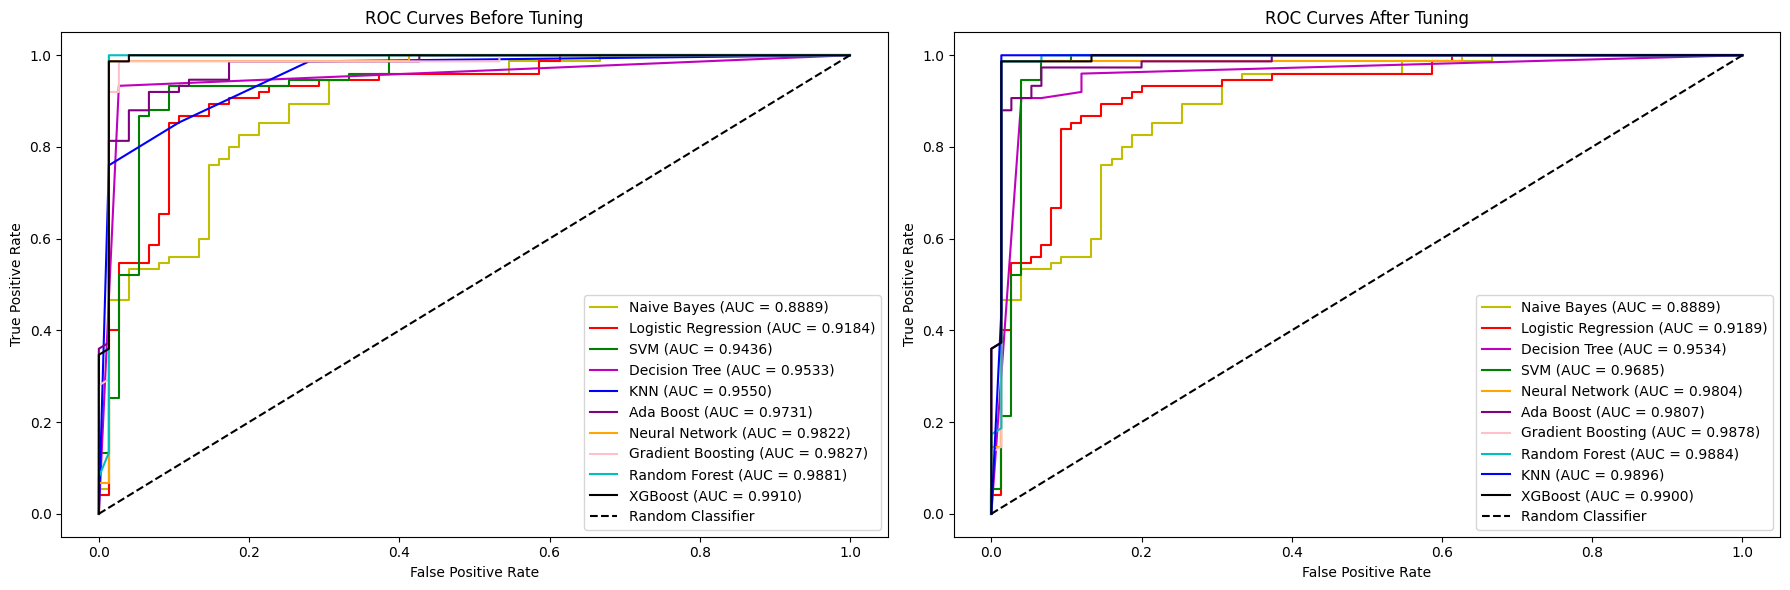

In [ ]:
from sklearn.metrics import roc_curve, auc
# Colors for plotting
colors = ['b', 'g', 'r', 'c', 'k', 'y', 'm', 'orange', 'purple', 'pink']

# Function to plot ROC curves ordered by AUC
def plot_all_roc(models_dict, ax, title):
    # Initialize list to hold (AUC, model_name) tuples
    auc_scores = []

    # Calculate AUC for each model and store the scores
    for (name, model), color in zip(models_dict.items(), colors):
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr)
        auc_scores.append((auc_score, name, fpr, tpr, color))

    # Sort models by AUC (ascending order)
    auc_scores.sort()

    # Plot the ROC curves in sorted order
    for auc_score, name, fpr, tpr, color in auc_scores:
        ax.plot(fpr, tpr, color=color, label=f'{name} (AUC = {auc_score:.4f})')

    # Plot the random classifier line
    ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc='lower right')

# Create a figure with 1x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot ROC curves for models before tuning, sorted by AUC
plot_all_roc(models, axes[0], title="ROC Curves Before Tuning")

# Plot ROC curves for models after tuning, sorted by AUC
plot_all_roc(models_after_tuning, axes[1], title="ROC Curves After Tuning")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Select and save the best model
We select the XGBoost model with hyperparameter tuning although it AUC drop (very small, about 0.0001)\
__Why?__
- imporove generalization
- improve model robustness

In [ ]:
joblib.dump(best_xgb_model, 'tuned_xgb.pkl')

['tuned_xgb.pkl']

# Model Interaction

In [ ]:
new_data = pd.read_csv("data/HeartNewPatients.csv")

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       10 non-null     int64  
 1   sex       10 non-null     int64  
 2   cp        10 non-null     int64  
 3   trestbps  10 non-null     int64  
 4   chol      10 non-null     int64  
 5   fbs       10 non-null     int64  
 6   restecg   10 non-null     int64  
 7   thalach   10 non-null     int64  
 8   exang     10 non-null     int64  
 9   oldpeak   10 non-null     float64
 10  slope     10 non-null     int64  
 11  ca        10 non-null     int64  
 12  thal      10 non-null     int64  
 13  target    10 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 1.2 KB


In [ ]:
new_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# data type conversion
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
new_data = convert_to_categorical(new_data, cat_cols)

In [ ]:
# Check for faulty data in the dataset
faulty_data = new_data[
    (~new_data['ca'].isin([0, 1, 2, 3])) |  # 'ca' should be 0, 1, 2, or 3
    (new_data['thalach'] <= 0) | (new_data['thalach'] > 220) |  # 'thalach' range (1, 220]
    (new_data['oldpeak'] < 0) | (new_data['oldpeak'] > 6.2) |  # 'oldpeak' range [0, 6.2]
    (new_data['trestbps'] < 94) | (new_data['trestbps'] > 200) |  # 'trestbps' range [94, 200]
    (~new_data['thal'].isin([1, 2, 3]))  # 'thal' should be 1, 2, or 3
]

# Display the faulty data
print("Faulty Data:")
if faulty_data.empty:
    print("No faulty data")
else:
    print(faulty_data)

Faulty Data:
No faulty data


In [ ]:
# Load the transformer and standard scaler
transformer = joblib.load("yeo_johnson_transformer.pkl")
scaler = joblib.load("standard_scaler.pkl")
label_encoders = joblib.load("label_encoders.pkl")

In [ ]:
# Apply the transformer to the specified columns
transformer_model, transformer_columns = transformer
new_data[transformer_columns] = transformer_model.transform(new_data[transformer_columns])

# Apply the scaler to the specified columns
scaler_model, scaler_columns = scaler
new_data[scaler_columns] = scaler_model.transform(new_data[scaler_columns])

# Apply label encoding using the appropriate encoder for each column
for col in cat_cols:
    if col in label_encoders:  # Check if the encoder exists for this column
        new_data[col] = label_encoders[col].transform(new_data[col])  # Apply the transform, not fit_transform

# Display the transformed and standardized dataset
new_data

age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.618706    1   2 -0.711207 -1.231405    0        1 -0.455968      0   
1 -0.059703    1   2 -0.711207  0.342675    0        0 -0.109578      0   
2  0.275698    1   0  1.870466  0.880357    1        0 -1.105449      0   
3  0.275698    1   0 -1.284912  1.560048    0        1 -0.282773      1   
4 -0.618706    0   1  0.091980  0.577306    0        1  0.539902      0   
5  1.617305    1   2  0.436203  0.267555    0        0 -0.152877      0   
6 -1.065909    0   1 -0.137502 -0.131074    0        0  1.102785      0   
7 -1.177709    1   2 -0.711207 -0.302375    0        1  0.842993      0   
8 -2.183914    0   0  0.321462 -1.370664    0        1  1.405876      0   
9  1.170103    1   0 -0.711207 -1.544043    0        1 -0.412669      0   

    oldpeak  slope  ca  thal  target  
0  1.003431      1   3     2       0  
1 -0.378689      1   0     2       1  
2  0.330532      1   3     2       0  
3  1.408038      1   1     2       0  
4 -1.167446      1   0     1       1  
5  1.003431      1   3     2       0  
6 -0.098999      1   0     1       1  
7 -1.167446      2   0     1       1  
8  0.649194      2   0     1       1  
9 -0.378689      2   0     2       1

In [ ]:
new_data.dtypes

age         float64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Data Prediction

In [ ]:
# Import the trained model
data_to_predict = new_data.copy()
data_to_predict['target'] = None
print(data_to_predict['target'])

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: target, dtype: object


In [ ]:
def predict_with_model(data_to_predict, trained_model):
    """
    Predicts the target column using the trained model and updates the dataset.

    Parameters:
    - data_to_predict (pd.DataFrame): The dataset to predict on, with a 'target' column set to None.
    - trained_model: The trained model used for prediction.

    Returns:
    - pd.DataFrame: The dataset with the 'target' column updated with predictions.
    """
    # Drop the target column and predict
    features = data_to_predict.drop(columns=['target'])
    predictions = trained_model.predict(features)

    # Add the predictions back to the dataset
    data_to_predict['target'] = predictions

    # Return the dataset with predictions
    return data_to_predict

In [ ]:
# Load the model
xgb_model = joblib.load('tuned_xgb.pkl')

# Drop target column before prediction
X_input = data_to_predict.drop(columns=['target'])

# Make predictions and get probabilities
preds = xgb_model.predict(X_input)
probs = xgb_model.predict_proba(X_input)[:, 1]

# Actual values
actual = new_data['target'].to_numpy()

# Display results
result_df = pd.DataFrame({
    'Actual': actual,
    'Predicted': preds,
    'Probability Having Heart Disease': probs
})

result_df

Actual  Predicted  Probability Having Heart Disease
0       0          0                          0.018899
1       1          1                          0.959381
2       0          0                          0.001761
3       0          0                          0.006918
4       1          1                          0.993009
5       0          0                          0.069292
6       1          1                          0.998589
7       1          1                          0.997738
8       1          1                          0.994877
9       1          1                          0.927521

### Model Interaction
- the section below allow user to input their personal information
- the model will predict based on the input provided

In [ ]:
def get_user_input():
    # Initialize an empty dictionary to store the inputs
    user_input = {}

    # Function to validate input
    def get_valid_input(prompt, valid_values=None, value_type=int, min_value=None, max_value=None):
        while True:
            try:
                # Get user input and convert to the correct type
                user_value = value_type(input(prompt))

                # Check if the value is within the valid range
                if valid_values:
                    if user_value not in valid_values:
                        raise ValueError(f"Input must be one of {valid_values}.")
                if min_value is not None and user_value < min_value:
                    raise ValueError(f"Input must be greater than or equal to {min_value}.")
                if max_value is not None and user_value > max_value:
                    raise ValueError(f"Input must be less than or equal to {max_value}.")

                return user_value
            except ValueError as e:
                print(f"Invalid input: {e}. Please try again.")

    # Asking for input for each feature
    user_input['age'] = get_valid_input("Enter age: ", value_type=float, min_value=1)  # Age is float
    user_input['sex'] = get_valid_input("Enter sex (1 = male, 0 = female): ", valid_values=[0, 1])
    user_input['cp'] = get_valid_input("Enter chest pain type (0, 1, 2, or 3): ", valid_values=[0, 1, 2, 3])
    user_input['trestbps'] = get_valid_input("Enter resting blood pressure (trestbps): ", value_type=float, min_value=94, max_value=200)
    user_input['chol'] = get_valid_input("Enter cholesterol (chol): ", value_type=float, min_value=124, max_value=564)
    user_input['fbs'] = get_valid_input("Enter fasting blood sugar (1 = > 120 mg/dl, 0 = < 120 mg/dl): ", valid_values=[0, 1])
    user_input['restecg'] = get_valid_input("Enter resting electrocardiographic results (0, 1, or 2): ", valid_values=[0, 1, 2])
    user_input['thalach'] = get_valid_input("Enter maximum heart rate achieved (thalach): ", value_type=float, min_value=1, max_value=220)
    user_input['exang'] = get_valid_input("Enter exercise induced angina (1 = yes, 0 = no): ", valid_values=[0, 1])
    user_input['oldpeak'] = get_valid_input("Enter depression induced by exercise relative to rest (oldpeak): ", value_type=float, min_value=0, max_value=6.2)
    user_input['slope'] = get_valid_input("Enter the slope of the peak exercise ST segment (0, 1, or 2): ", valid_values=[0, 1, 2])
    user_input['ca'] = get_valid_input("Enter number of major vessels colored by fluoroscopy (0, 1, 2 or 3): ", valid_values=[0, 1, 2, 3])
    user_input['thal'] = get_valid_input("Enter thalassemia (1 = normal, 2 = fixed defect, 3 = reversable defect): ", valid_values=[1, 2, 3])
    return pd.DataFrame([user_input])

In [ ]:
# Get user input
user_data = get_user_input()

# Output the collected data for review
print("\nCollected Input:")
print(user_data)

cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
user_data = convert_to_categorical(user_data, cat_cols)

# Apply the transformer to the specified columns
transformer_model, transformer_columns = transformer
user_data[transformer_columns] = transformer_model.transform(user_data[transformer_columns])

# Apply the scaler to the specified columns
scaler_model, scaler_columns = scaler
user_data[scaler_columns] = scaler_model.transform(user_data[scaler_columns])

# Convert categorical features to categorical first then apply the label encoding
for col in cat_cols:
    if col in label_encoders:  # Check if the encoder exists for this column
        user_data[col] = label_encoders[col].transform(user_data[col])  # Apply the transform, not fit_transform

prediction = xgb_model.predict(user_data)
probabilities = xgb_model.predict_proba(user_data)

# Since our the categorical field is correct data type (int), so we no need to apply label encoding

if prediction[0] == 1:
    print(f"\nPrediction: Heart disease is present. The probability of having is {probabilities[0][1]:.4f}")
else:
    print(f"\nPrediction: No heart disease. The probability of not having is {probabilities[0][0]:.4f}")

Enter age: 38
Enter sex (1 = male, 0 = female): 0
Enter chest pain type (0, 1, 2, or 3): 1
Enter resting blood pressure (trestbps): 150
Enter cholesterol (chol): 245
Enter fasting blood sugar (1 = > 120 mg/dl, 0 = < 120 mg/dl): 0
Enter resting electrocardiographic results (0, 1, or 2): 1
Enter maximum heart rate achieved (thalach): 160
Enter exercise induced angina (1 = yes, 0 = no): 1
Enter depression induced by exercise relative to rest (oldpeak): 1.2
Enter the slope of the peak exercise ST segment (0, 1, or 2): 1
Enter number of major vessels colored by fluoroscopy (0, 1, 2 or 3): 2
Enter thalassemia (1 = normal, 2 = fixed defect, 3 = reversable defect): 3

Collected Input:
    age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  38.0    0   1     150.0  245.0    0        1    160.0      1      1.2   

   slope  ca  thal  
0      1   2     3  

Prediction: No heart disease. The probability of not having is 0.7423
